Problem statement 2: From the 'Round 2 - DA' excel file which contains two sheets, sensor data and tag description, perform an extensive data preprocessing and exploratory data analysis on the sensor data. You may use the tag description to understand the data columns. Write a python notebook explaining your approach and findings supported by the necessary visualizations

### Import Library

In [1465]:
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.preprocessing import PowerTransformer
import geopy
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [707]:
file_path=r"D:\scorpio Assignment\Round 2 - DA.xlsx"
df=pd.read_excel(file_path,sheet_name="Sensor Data")               #Sensor dataframe
df

,sample_time,ME_FO_IN_TEMP_°C,ME_FO_IN_FLOW_kg/h,ME_FO_VISCOSITY_cSt,SEA_WATER_TEMP_°C,DG_1_POWER,DG_2_POWER,DG_3_POWER,DG_4_POWER,GE_FO_VISCOSITY_cSt,...,WindSpeedAt50MetersInKnots,WindDirectionAt50MetersInDegrees,RiskWindSpeedInKnots,WindGustInKnots,WindGustAt50MetersInKnots,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,RiskWaveHeightInMeters,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees
0,2022-01-01 13:00:00,120.12931,1315.40857,12.89500,27.65644,1.063422e+06,4.683372e+05,5.170440e+05,1.046958e+06,12.82982,...,21,150,22,25,27,1.8,157,2.22,0.27,20
1,2022-01-01 13:05:00,120.11794,1314.99536,12.92052,27.65626,1.063422e+06,4.683612e+05,5.170433e+05,1.046990e+06,12.99468,...,21,150,22,25,27,1.8,156,2.22,0.25,20
2,2022-01-01 13:10:00,120.08767,1325.07103,12.89342,27.64197,1.063421e+06,4.683850e+05,5.170430e+05,1.047023e+06,12.81114,...,21,150,22,25,27,1.8,156,2.22,0.25,20
3,2022-01-01 13:15:00,120.06493,1325.93678,12.91568,27.61560,1.063419e+06,4.684321e+05,5.170420e+05,1.047087e+06,12.97803,...,21,150,22,25,27,1.8,156,2.22,0.25,20
4,2022-01-01 13:20:00,120.00000,1314.96950,12.92037,27.65493,1.063419e+06,4.684561e+05,5.170410e+05,1.047120e+06,12.98981,...,21,150,22,25,27,1.8,155,2.22,0.25,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43442,2022-12-31 23:35:00,124.65623,1301.99963,12.95229,19.20000,3.414721e+06,1.253305e+06,1.534106e+06,3.939402e+06,12.85600,...,16,219,18,17,18,3.4,230,3.95,0.05,180
43443,2022-12-31 23:40:00,124.71971,1291.55445,12.93251,19.16502,3.414773e+06,1.253305e+06,1.534106e+06,3.939401e+06,12.62553,...,16,219,18,17,18,3.4,230,3.95,0.05,180
43444,2022-12-31 23:45:00,124.49571,1286.92965,13.00653,19.08863,3.414827e+06,1.253304e+06,1.534105e+06,3.939401e+06,13.72080,...,16,220,18,17,18,3.4,230,3.96,0.04,180
43445,2022-12-31 23:50:00,124.43229,1297.31212,13.06549,19.04889,3.414881e+06,1.253304e+06,1.534105e+06,3.939400e+06,12.52497,...,16,220,18,16,18,3.4,230,3.96,0.04,180


In [8]:
tag_df=pd.read_excel(file_path,sheet_name="Tag Description")       # tag DataFrame
tag_df

,Unit,Tag Name,Tag Description
0,m,AFT DRAFT,AFT DRAFT RAW LEVEL
1,mm,AUX BL DRUM LEVEL,AUX. BOILER DRUM LEVEL
2,°C,AUX BL EXH GAS OUT TEMP,AUX. BOILER EXH GAS OUT TEMP HI
3,l/h,AUX BL FO FLOW,AUX BLR F.O CONSUMPTION FLOW IND
4,bar,AUX BL FO IN PRESS,AUX. BOILER F.O INLET PRESS
...,...,...,...
180,g/kWh,ME SFOC CORR,ME FUEL EFFICIENCY CORR (126)
181,g/kWh,AE SFOC,AE FUEL EFF (127)
182,kg/nm,HULL EFFICIENCY,HULL EFFICIENCY (128)
183,kg/nm,HULL EFFICIENCY CORR,HULL EFFICIENCY CORR (129)


## Preprocessing

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43447 entries, 0 to 43446
Columns: 199 entries, sample_time to SeaCurrentDirectionInDegrees
dtypes: datetime64[ns](2), float64(168), int64(18), object(11)
memory usage: 66.0+ MB


In [709]:
# Acces Columns with Object Data Type
object_dtype_col=[]
for col_name in df.columns:
    if df[col_name].dtype=="object":
        object_dtype_col.append(col_name)
print(object_dtype_col)

['AUX_BL_STOP', 'AUX_BL_MDO/MGO_POSITION', 'AUX_BL_HFO_POSITION', 'COMP_BL_MDO/MGO_POSITION', 'COMP_BL_HFO_POSITION', 'GE1_RUNNING', 'GE2_RUNNING', 'GE3_RUNNING', 'GE4_RUNNING', 'Latitude', 'Longitude']


In [710]:
df[['COMP_BL_MDO/MGO_POSITION', 'COMP_BL_HFO_POSITION', 'GE1_RUNNING', 'GE2_RUNNING', 'GE3_RUNNING', 'GE4_RUNNING', 'Latitude', 'Longitude']]

,COMP_BL_MDO/MGO_POSITION,COMP_BL_HFO_POSITION,GE1_RUNNING,GE2_RUNNING,GE3_RUNNING,GE4_RUNNING,Latitude,Longitude
0,DO/MGO,------,STOP,RUN,STOP,RUN,"16°18'34""N","40°55'22""E"
1,DO/MGO,------,STOP,RUN,STOP,RUN,"16°16'03""N","40°58'43""E"
2,DO/MGO,------,STOP,RUN,STOP,RUN,"16°16'03""N","40°58'43""E"
3,DO/MGO,------,STOP,RUN,STOP,RUN,"16°16'03""N","40°58'43""E"
4,DO/MGO,------,STOP,RUN,STOP,RUN,"16°15'12""N","40°59'51""E"
...,...,...,...,...,...,...,...,...
43442,DO/MGO,------,RUN,STOP,STOP,STOP,"36°48'53""S","123°54'09""E"
43443,DO/MGO,------,RUN,STOP,STOP,STOP,"36°49'01""S","123°55'12""E"
43444,DO/MGO,------,RUN,STOP,STOP,STOP,"36°49'10""S","123°56'17""E"
43445,DO/MGO,------,RUN,STOP,STOP,STOP,"36°49'27""S","123°58'28""E"


## Encoding

### 1.AUX_BL_STOP

In [711]:
df["AUX_BL_STOP"].value_counts().to_dict()

{'STOP': 43253, 'RUN': 194}

In [712]:
# we can try for label encoding
df["AUX_BL_STOP"].replace({"STOP":0,"RUN":1},inplace=True)

### 2.AUX_BL_MDO/MGO_POSITION

In [713]:
df["AUX_BL_MDO/MGO_POSITION"].value_counts()
# this Feature contains only one value
# with variance threshould Method of feature selection This feature is will not contribute
# for any prediction so we can prefer to drop this feature


AUX_BL_MDO/MGO_POSITION
DO/MGO    43447
Name: count, dtype: int64

In [714]:
 df.drop(["AUX_BL_MDO/MGO_POSITION"],axis=1,inplace=True)

In [715]:
df["COMP_BL_MDO/MGO_POSITION"].value_counts()

COMP_BL_MDO/MGO_POSITION
DO/MGO    43447
Name: count, dtype: int64

In [716]:
 df.drop(["COMP_BL_MDO/MGO_POSITION"],axis=1,inplace=True)

### 3.AUX_BL_HFO_POSITION

In [717]:
df['AUX_BL_HFO_POSITION'].value_counts()   # no data, can delete by missing value criterian

AUX_BL_HFO_POSITION
------    43447
Name: count, dtype: int64

In [718]:
df.drop(["AUX_BL_HFO_POSITION","COMP_BL_HFO_POSITION"],axis=1,inplace=True)

### 4.COMP_BL_HFO_POSITION

In [720]:
df["COMP_BL_HFO_POSITION"].value_counts()

In [722]:
df.drop("COMP_BL_HFO_POSITION",axis=1,inplace=True)

### 5.GE1_RUNNING

In [723]:
df["GE1_RUNNING"].value_counts().to_dict()

{'STOP': 23486, 'RUN': 19961}

In [724]:
df["GE1_RUNNING"].replace({"STOP":0,"RUN":1},inplace=True)

### 6.GE2_RUNNING

In [725]:
df["GE2_RUNNING"].value_counts().to_dict()

{'STOP': 34211, 'RUN': 9236}

In [726]:
df["GE2_RUNNING"].replace({"STOP":0,"RUN":1},inplace=True)

### 7.GE3_RUNNING

In [727]:
df["GE3_RUNNING"].value_counts().to_dict()

{'STOP': 35255, 'RUN': 8192}

In [728]:
df["GE3_RUNNING"].replace({"STOP":0,"RUN":1},inplace=True)

### 8.GE4_RUNNING

In [729]:
df["GE4_RUNNING"].value_counts()

GE4_RUNNING
RUN     23269
STOP    20178
Name: count, dtype: int64

In [730]:
df["GE4_RUNNING"].replace({"STOP":0,"RUN":1},inplace=True)

### 9.Latitude & Longitude

In [ ]:
Combining this two feature gives geographical location 
we can find location by geopy library will result location in text format
and which will not contribute for any prediction

In [ ]:

we can use two methods
1.use non-parametric algorithm
2.use geopy library and find location and create clustures

In [731]:
#drop latitude and longitude
df.drop(["Latitude","Longitude"],axis=1,inplace=True)

In [1484]:
#check columns with object data type
object_dtype_col=[]
for col_name in df.columns:
    if df[col_name].dtype=="object":
        object_dtype_col.append(col_name)
print(object_dtype_col)

[]


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43447 entries, 0 to 43446
Columns: 193 entries, sample_time to SeaCurrentDirectionInDegrees
dtypes: datetime64[ns](2), float64(168), int64(23)
memory usage: 64.0 MB


## Missing Value

In [1490]:
df.isna().sum().any()   #check if any column with missing value

False

# Outliers Detection

In [734]:
# Find Column Names with Outliers
def outliers_detector(data):
    outliers_column=[]                                                      # define empty list
    for col_name in data.columns:
        z_score=(data[col_name]-data[col_name].mean())/data[col_name].std() # find z_score for each data point
        outliers_index=np.where(abs(z_score)>3)[0]                          #check outliers
        if outliers_index.any():                                            # check if any outlier in given column
            outliers_column.append(col_name)                                # if present append this column in defined list
    return outliers_column
columns_with_outliers=outliers_detector(df)
len(columns_with_outliers)

110

In [1483]:
# Access all column with outliers
for index,col_name in enumerate(columns_with_outliers):
    print(index,col_name)

0 ME_FO_IN_TEMP_°C
1 ME_FO_IN_FLOW_kg/h
2 ME_FO_VISCOSITY_cSt
3 SEA_WATER_TEMP_°C
4 GE_FO_VISCOSITY_cSt
5 GE_FO_IN_FLOW_kg/h
6 MAIN_LO_IN_PRESS_bar
7 MAIN_LO_IN_TEMP_°C
8 ME_TC_LO_IN_PRESS_bar
9 ME_TC_LO_OUT_TEMP_°C
10 ME_CYL_LUBRICATION_TEMP_°C
11 FUEL_INDEX_%
12 GE1_CYL_1_EXH_GAS_TEMP_°C
13 GE1_CYL_2_EXH_GAS_TEMP_°C
14 GE1_CYL_3_EXH_GAS_TEMP_°C
15 GE1_CYL_4_EXH_GAS_TEMP_°C
16 GE1_CYL_5_EXH_GAS_TEMP_°C
17 GE1_CYL_6_EXH_GAS_TEMP_°C
18 GE1_TC_EXH_GAS_IN(A)_TEMP_°C
19 GE2_CHARGE_AIR_PRESS_bar
20 GE3_CHARGE_AIR_PRESS_bar
21 GE4_CYL_2_EXH_GAS_TEMP_°C
22 GE4_TC_A_EXH_GAS_IN_TEMP_°C
23 LAT_SIGN
24 LONG_DEC_MIN
25 LONG_SIGN
26 ME_SHAFT_POWER_kW
27 ME_RPM_RPM
28 ME_SHAFT_TORQUE_kNm
29 ME_CYL1_JCFW_OUT_TEMP_°C
30 ME_CYL2_JCFW_OUT_TEMP_°C
31 ME_CYL3_JCFW_OUT_TEMP_°C
32 ME_CYL4_JCFW_OUT_TEMP_°C
33 ME_CYL5_JCFW_OUT_TEMP_°C
34 ME_CYL6_JCFW_OUT_TEMP_°C
35 GE2_FO_IN_PRESS_bar
36 GE3_FO_IN_PRESS_bar
37 GE4_FO_IN_PRESS_bar
38 GE1_TC_LO_PRESS_bar
39 GE2_TC_LO_PRESS_bar
40 GE3_TC_LO_PRESS_bar
41 GE4_TC_L

## 1.Sample Time

In [736]:
df["sample_time"]

0       2022-01-01 13:00:00
1       2022-01-01 13:05:00
2       2022-01-01 13:10:00
3       2022-01-01 13:15:00
4       2022-01-01 13:20:00
                ...        
43442   2022-12-31 23:35:00
43443   2022-12-31 23:40:00
43444   2022-12-31 23:45:00
43445   2022-12-31 23:50:00
43446   2022-12-31 23:55:00
Name: sample_time, Length: 43447, dtype: datetime64[ns]

In [ ]:
#lets consider last parameter date as current date
current_date=datetime.datetime(2022,12,31)
# date=df["sample_time"].to_timestamp
# age=current_date-df["sample_time"]
current_date=current_date.strftime("%Y-%m-%d %H:%M:%S")
# current_date-df["sample_time"]

In [738]:
df["sample_time"]

0       2022-01-01 13:00:00
1       2022-01-01 13:05:00
2       2022-01-01 13:10:00
3       2022-01-01 13:15:00
4       2022-01-01 13:20:00
                ...        
43442   2022-12-31 23:35:00
43443   2022-12-31 23:40:00
43444   2022-12-31 23:45:00
43445   2022-12-31 23:50:00
43446   2022-12-31 23:55:00
Name: sample_time, Length: 43447, dtype: datetime64[ns]

In [ ]:
1.This Feature is showing a time at which reading taken.
2.directly this feature will not help for any prediction.
3.We can find "Age" in Days of Vessel from this feature,which may help to predict failure condition of Vessel
4.depend upon problem statement, we can decide its importance, or we can drop this column because


In [1346]:
current_date=datetime.datetime.now()
date_time=pd.to_datetime(df["sample_time"])
age=(current_date-date_time)
age

0       568 days 02:07:03.866899
1       568 days 02:02:03.866899
2       568 days 01:57:03.866899
3       568 days 01:52:03.866899
4       568 days 01:47:03.866899
                  ...           
43442   203 days 15:32:03.866899
43443   203 days 15:27:03.866899
43444   203 days 15:22:03.866899
43445   203 days 15:17:03.866899
43446   203 days 15:12:03.866899
Name: sample_time, Length: 43447, dtype: timedelta64[ns]

## 2.ME_FO_IN_TEMP_

In [739]:
# check Missing Values
df["ME_FO_IN_TEMP_°C"].isna().sum()

0

In [740]:
df["ME_FO_IN_TEMP_°C"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43447 entries, 0 to 43446
Series name: ME_FO_IN_TEMP_°C
Non-Null Count  Dtype  
--------------  -----  
43447 non-null  float64
dtypes: float64(1)
memory usage: 339.6 KB


<AxesSubplot: xlabel='ME_FO_IN_TEMP_°C'>

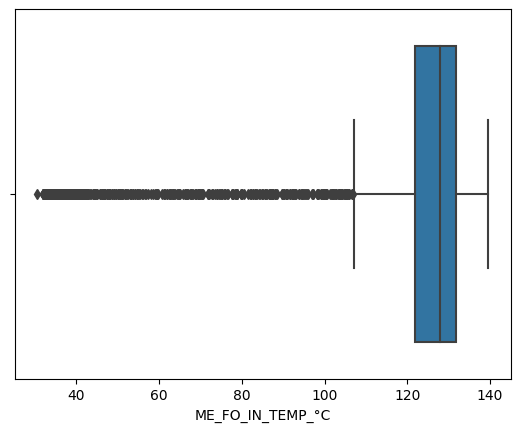

In [741]:
#check outliers
sns.boxplot(x=df["ME_FO_IN_TEMP_°C"]) 

<AxesSubplot: xlabel='ME_FO_IN_TEMP_°C'>

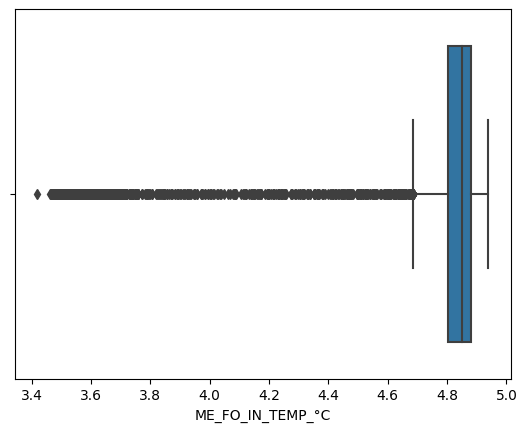

In [742]:
#1.Logerithmic Transformation
k=np.log(df["ME_FO_IN_TEMP_°C"])
sns.boxplot(x=k)

<AxesSubplot: xlabel='ME_FO_IN_TEMP_°C'>

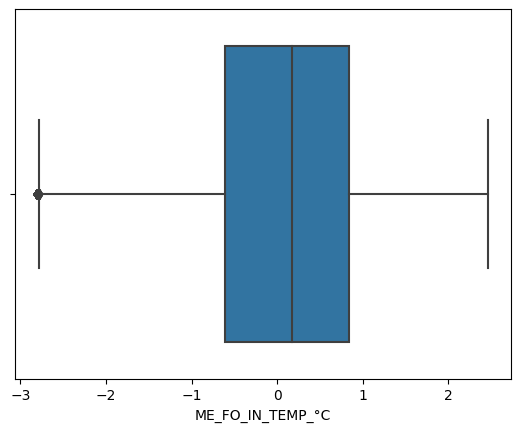

In [743]:
#2.boxcox transformation
transformer=PowerTransformer(method="box-cox")
df["ME_FO_IN_TEMP_°C"]=transformer.fit_transform(df[["ME_FO_IN_TEMP_°C"]])
sns.boxplot(x=df["ME_FO_IN_TEMP_°C"])                                          # This Method Handles outliers properly

## 3.ME_FO_IN_FLOW_kg/h

In [746]:
# check Missing Value
df["ME_FO_IN_FLOW_kg/h"].describe()

count    43447.000000
mean      1243.987139
std        175.640127
min        544.258270
25%       1122.051050
50%       1278.055330
75%       1366.555845
max       1749.031510
Name: ME_FO_IN_FLOW_kg/h, dtype: float64

In [747]:
df["ME_FO_IN_FLOW_kg/h"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43447 entries, 0 to 43446
Series name: ME_FO_IN_FLOW_kg/h
Non-Null Count  Dtype  
--------------  -----  
43447 non-null  float64
dtypes: float64(1)
memory usage: 339.6 KB


<AxesSubplot: xlabel='ME_FO_IN_FLOW_kg/h'>

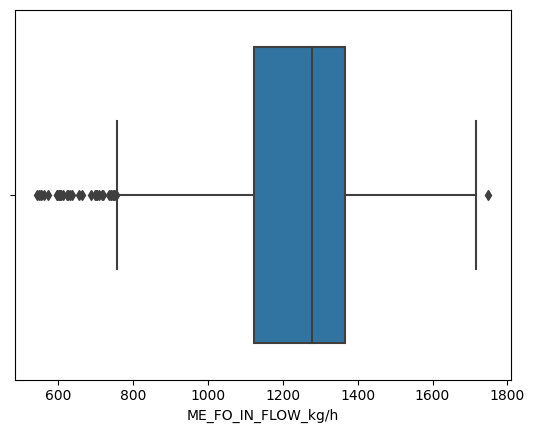

In [748]:
# check outliers
sns.boxplot(x=df["ME_FO_IN_FLOW_kg/h"])

<AxesSubplot: xlabel='ME_FO_IN_FLOW_kg/h'>

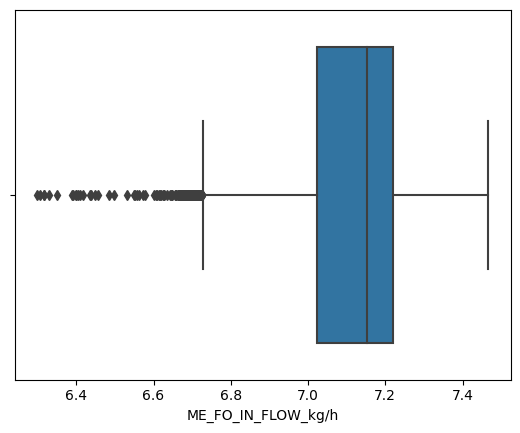

In [749]:
## 1.Logerithmic Transformation
sns.boxplot(x=np.log(df["ME_FO_IN_FLOW_kg/h"]))

<AxesSubplot: >

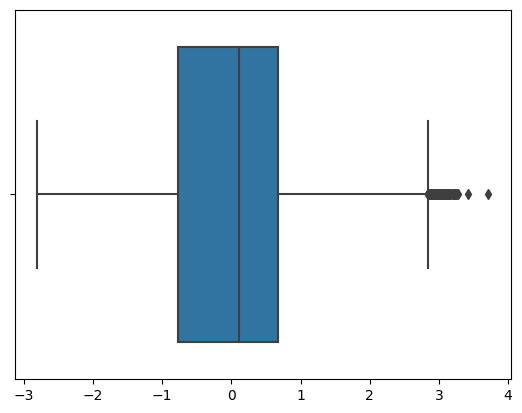

In [750]:
# 2.boxcox transformation
transformer=PowerTransformer(method="box-cox")
k=transformer.fit_transform(df[["ME_FO_IN_FLOW_kg/h"]])
sns.boxplot(x=k)

<AxesSubplot: >

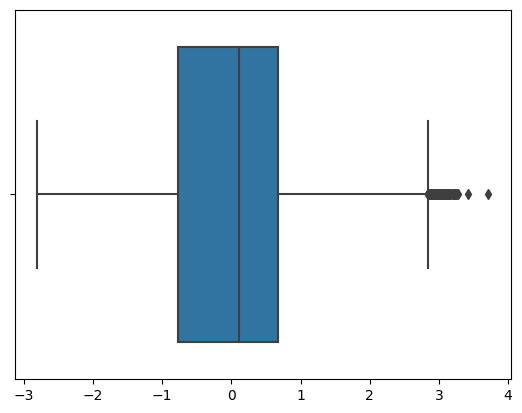

In [751]:
#3.Yeo Johnson transformation
transformer=PowerTransformer(method="yeo-johnson")
k=transformer.fit_transform(df[["ME_FO_IN_FLOW_kg/h"]])
sns.boxplot(x=k)

In [752]:
## 4.iqr Method
q1=np.quantile(df["ME_FO_IN_FLOW_kg/h"],0.25)
q3=np.quantile(df["ME_FO_IN_FLOW_kg/h"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["ME_FO_IN_FLOW_kg/h"]< lower_tale)|(df["ME_FO_IN_FLOW_kg/h"]>upper_tale))   # to check No. outliers points
index

(array([ 4085,  5351, 15095, 18245, 18258, 18259, 18262, 18268, 25504,
        34728, 34799, 34827, 34828, 34829, 34830, 34831, 34832, 34833,
        34838, 34839, 34840, 34841, 34842, 34843, 34858, 34873, 34874,
        34875, 34876, 34877, 34888, 34935, 35790, 35791, 37401],
       dtype=int64),)

In [753]:
df["ME_FO_IN_FLOW_kg/h"]=np.where(df["ME_FO_IN_FLOW_kg/h"]<lower_tale,lower_tale,df["ME_FO_IN_FLOW_kg/h"])
df["ME_FO_IN_FLOW_kg/h"]=np.where(df["ME_FO_IN_FLOW_kg/h"]>upper_tale,upper_tale,df["ME_FO_IN_FLOW_kg/h"])

<AxesSubplot: xlabel='ME_FO_IN_FLOW_kg/h'>

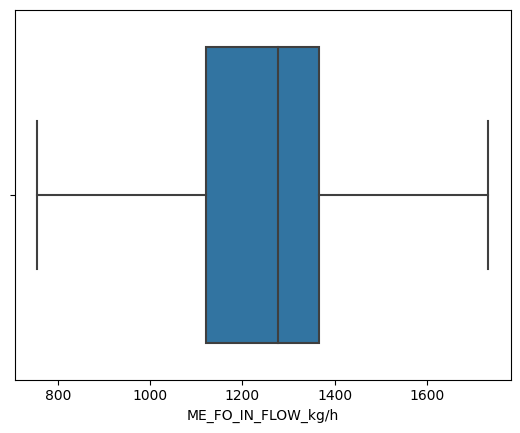

In [754]:
# check outliers
sns.boxplot(x=df["ME_FO_IN_FLOW_kg/h"])      # All Outliers handled

## 4.ME_FO_VISCOSITY_cSt

In [756]:
# check Missing Value
df["ME_FO_VISCOSITY_cSt"].describe()

count    43447.000000
mean        12.483984
std          2.129536
min          1.638090
25%         12.882365
50%         12.950890
75%         12.996660
max         25.000000
Name: ME_FO_VISCOSITY_cSt, dtype: float64

In [1350]:
#zscore method
z_score=(df["ME_FO_VISCOSITY_cSt"]-df["ME_FO_VISCOSITY_cSt"].mean())/df["ME_FO_VISCOSITY_cSt"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

2220


<AxesSubplot: xlabel='ME_FO_VISCOSITY_cSt'>

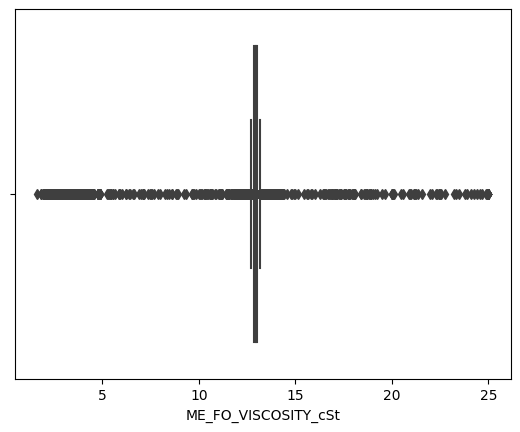

In [757]:
# check outliers
sns.boxplot(x=df['ME_FO_VISCOSITY_cSt'])

<AxesSubplot: xlabel='ME_FO_VISCOSITY_cSt'>

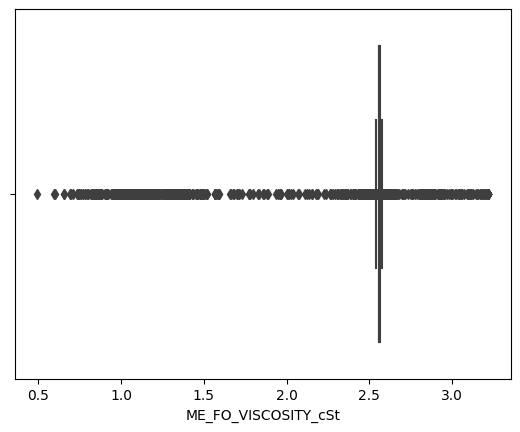

In [759]:
## 1.Logerithmic transformation
sns.boxplot(x=np.log(df["ME_FO_VISCOSITY_cSt"]))

In [760]:
### 2.iqr Method
q1=np.quantile(df["ME_FO_VISCOSITY_cSt"],0.25)
q3=np.quantile(df["ME_FO_VISCOSITY_cSt"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["ME_FO_VISCOSITY_cSt"]< lower_tale)|(df["ME_FO_VISCOSITY_cSt"]>upper_tale))   # to check No. outliers points
len(index[0])

4369

<AxesSubplot: >

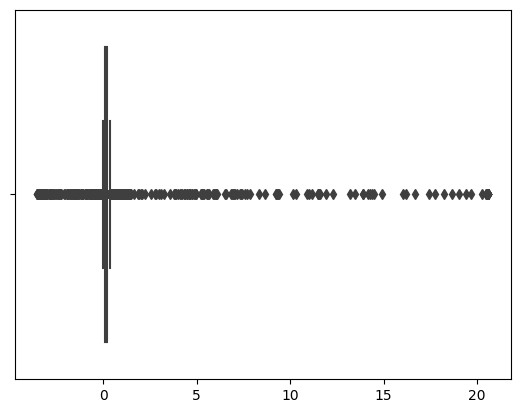

In [761]:
#2.boxcox transformation
transformer=PowerTransformer(method="box-cox")
k=transformer.fit_transform(df[["ME_FO_VISCOSITY_cSt"]])
sns.boxplot(x=k)

<AxesSubplot: >

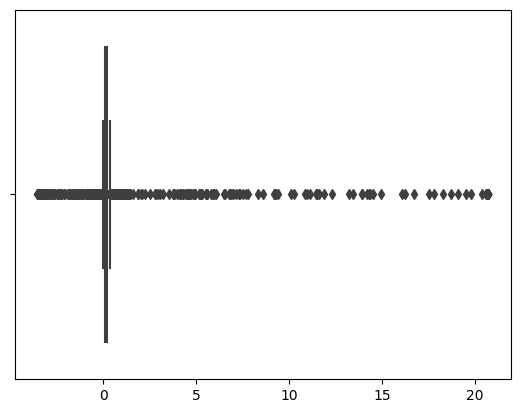

In [762]:
#3.Yeo Johnson transformation
transformer=PowerTransformer(method="yeo-johnson")
k=transformer.fit_transform(df[["ME_FO_VISCOSITY_cSt"]])
sns.boxplot(x=k)

## 5.SEA_WATER_TEMP_°C

In [765]:
df["SEA_WATER_TEMP_°C"].describe()

count    43447.000000
mean        28.651781
std          2.623544
min         15.616190
25%         27.958505
50%         29.458110
75%         30.181635
max         34.688770
Name: SEA_WATER_TEMP_°C, dtype: float64

In [1351]:
#zscore method
z_score=(df["SEA_WATER_TEMP_°C"]-df["SEA_WATER_TEMP_°C"].mean())/df["SEA_WATER_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1225


<AxesSubplot: xlabel='SEA_WATER_TEMP_°C'>

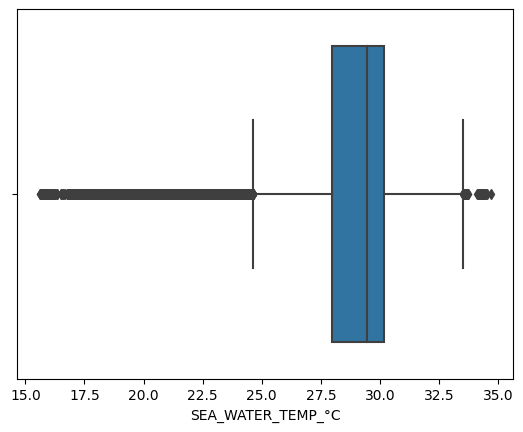

In [764]:
sns.boxplot(x=df["SEA_WATER_TEMP_°C"])

<AxesSubplot: xlabel='SEA_WATER_TEMP_°C'>

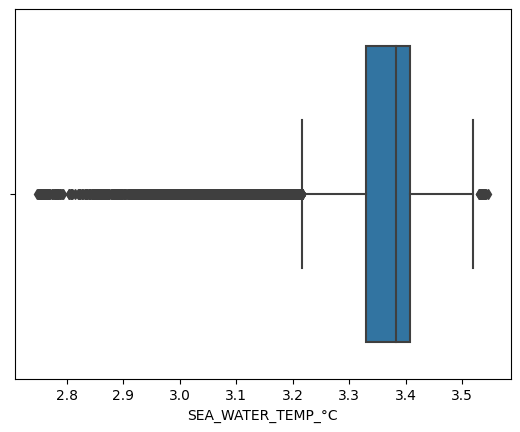

In [766]:
## 1.Logerithmic transformation
sns.boxplot(x=np.log(df["SEA_WATER_TEMP_°C"]))

<AxesSubplot: >

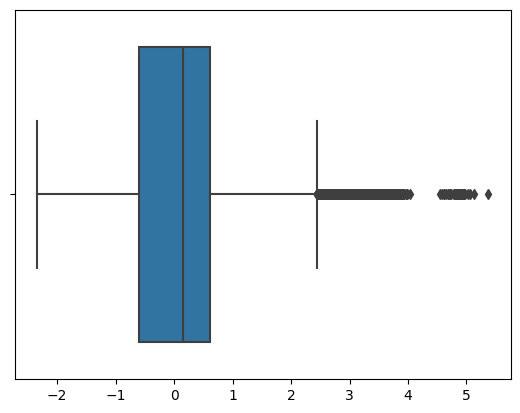

In [767]:
#2.boxcox transformation
transformer=PowerTransformer(method="box-cox")
k=transformer.fit_transform(df[["SEA_WATER_TEMP_°C"]])
sns.boxplot(x=k)

In [768]:
## 4.iqr Method
q1=np.quantile(df["SEA_WATER_TEMP_°C"],0.25)
q3=np.quantile(df["SEA_WATER_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["SEA_WATER_TEMP_°C"]< lower_tale)|(df["SEA_WATER_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])

3528

## 7.GE_FO_IN_FLOW_kg/h

In [769]:
df["GE_FO_IN_FLOW_kg/h"].describe()

count    43447.000000
mean       195.200283
std         23.021663
min          0.000000
25%        186.834840
50%        196.998770
75%        207.875605
max        375.259930
Name: GE_FO_IN_FLOW_kg/h, dtype: float64

In [770]:
df["GE_FO_IN_FLOW_kg/h"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43447 entries, 0 to 43446
Series name: GE_FO_IN_FLOW_kg/h
Non-Null Count  Dtype  
--------------  -----  
43447 non-null  float64
dtypes: float64(1)
memory usage: 339.6 KB


<AxesSubplot: xlabel='GE_FO_IN_FLOW_kg/h'>

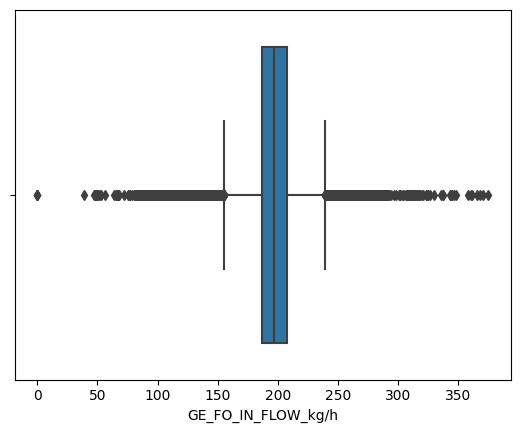

In [771]:
sns.boxplot(x=df["GE_FO_IN_FLOW_kg/h"])

<AxesSubplot: xlabel='GE_FO_IN_FLOW_kg/h'>

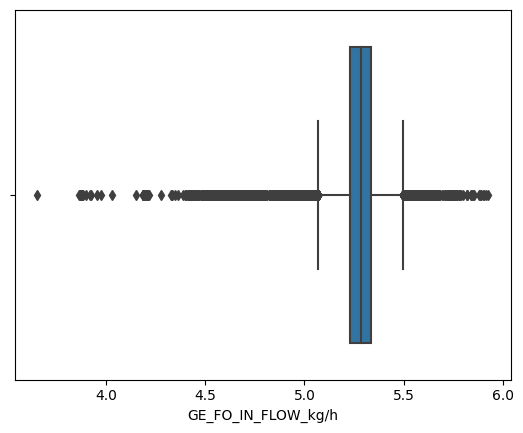

In [772]:
## 1.Logerithmic Transformation
sns.boxplot(x=np.log(df["GE_FO_IN_FLOW_kg/h"]))

<AxesSubplot: xlabel='GE_FO_IN_FLOW_kg/h'>

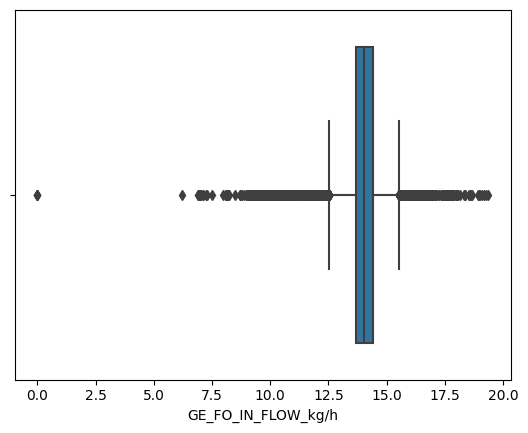

In [773]:
sns.boxplot(x=np.sqrt(df["GE_FO_IN_FLOW_kg/h"]))

<AxesSubplot: >

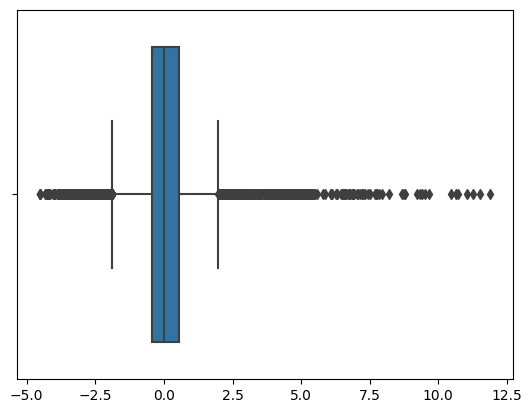

In [774]:
#2.yeo johnson transformation
transformer=PowerTransformer(method="yeo-johnson")        #cant apply box-cox method
k=transformer.fit_transform(df[["GE_FO_IN_FLOW_kg/h"]])
sns.boxplot(x=k)

In [775]:
## 4.iqr Method
q1=np.quantile(df["GE_FO_IN_FLOW_kg/h"],0.25)
q3=np.quantile(df["GE_FO_IN_FLOW_kg/h"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE_FO_IN_FLOW_kg/h"]< lower_tale)|(df["GE_FO_IN_FLOW_kg/h"]>upper_tale))   # to check No. outliers points
len(index[0])

2331

## 8.GE_FO_VISCOSITY_cSt

In [776]:
df["GE_FO_VISCOSITY_cSt"].describe()

count    43447.000000
mean        12.413471
std          2.339761
min          1.500000
25%         12.892010
50%         12.984250
75%         13.039140
max         25.100000
Name: GE_FO_VISCOSITY_cSt, dtype: float64

<AxesSubplot: xlabel='GE_FO_VISCOSITY_cSt'>

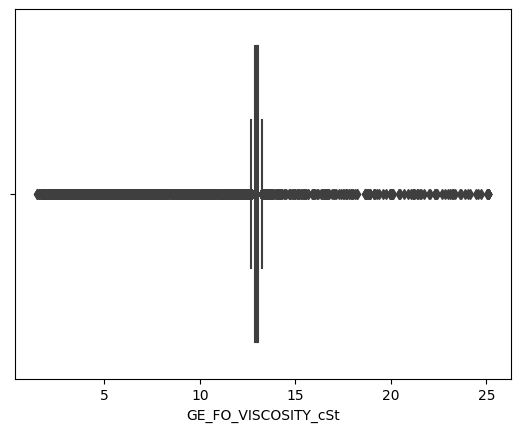

In [777]:
sns.boxplot(x=df["GE_FO_VISCOSITY_cSt"])

<AxesSubplot: xlabel='GE_FO_VISCOSITY_cSt'>

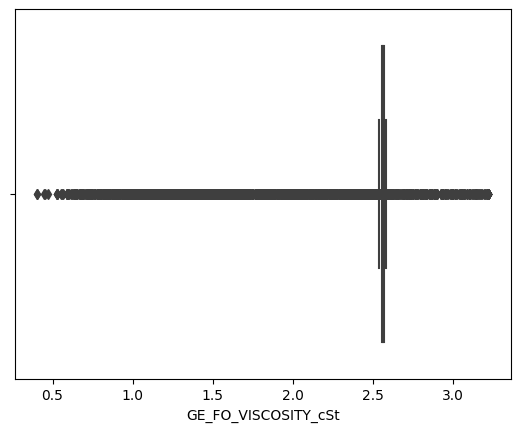

In [778]:
# 2.Logerithmic Transformation
sns.boxplot(x=np.log(df["GE_FO_VISCOSITY_cSt"]))

<AxesSubplot: >

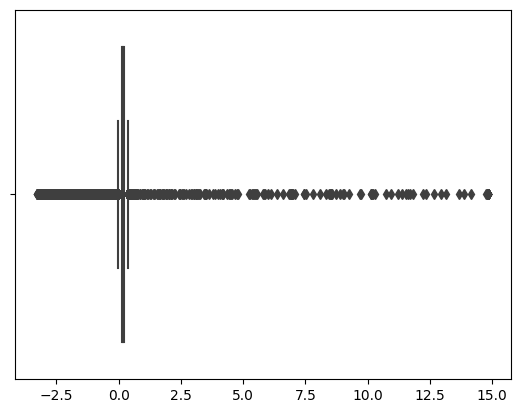

In [779]:
#2.yeo johnson transformation
transformer=PowerTransformer(method="yeo-johnson")        #cant apply box-cox method
k=transformer.fit_transform(df[["GE_FO_VISCOSITY_cSt"]])
sns.boxplot(x=k)

In [780]:
## 3.iqr Method
q1=np.quantile(df["GE_FO_VISCOSITY_cSt"],0.25)
q3=np.quantile(df["GE_FO_VISCOSITY_cSt"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE_FO_VISCOSITY_cSt"]< lower_tale)|(df["GE_FO_VISCOSITY_cSt"]>upper_tale))   # to check No. outliers points
len(index[0])

4907

## 9 .MAIN_LO_IN_PRESS_bar

In [781]:
df["MAIN_LO_IN_PRESS_bar"].describe()

count    43447.000000
mean         2.434872
std          0.071373
min          2.151510
25%          2.372750
50%          2.440000
75%          2.499785
max          2.680250
Name: MAIN_LO_IN_PRESS_bar, dtype: float64

<AxesSubplot: xlabel='MAIN_LO_IN_PRESS_bar'>

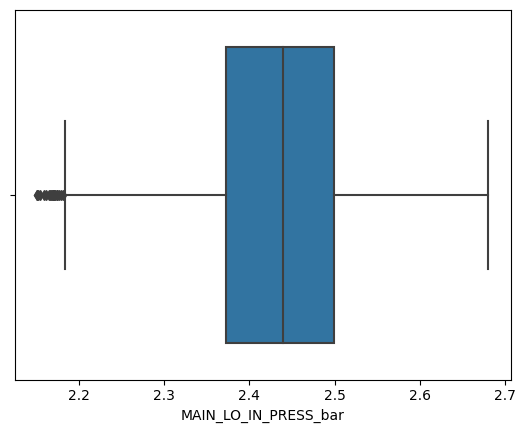

In [782]:
sns.boxplot(x=df["MAIN_LO_IN_PRESS_bar"])

In [783]:
## 3.iqr Method
q1=np.quantile(df["MAIN_LO_IN_PRESS_bar"],0.25)
q3=np.quantile(df["MAIN_LO_IN_PRESS_bar"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
df["MAIN_LO_IN_PRESS_bar"]=np.where(df["MAIN_LO_IN_PRESS_bar"]< lower_tale,lower_tale,df["MAIN_LO_IN_PRESS_bar"])   # to check No. outliers points


<AxesSubplot: xlabel='MAIN_LO_IN_PRESS_bar'>

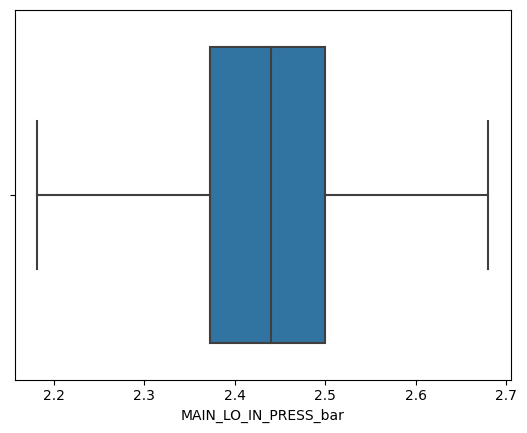

In [784]:
sns.boxplot(x=df["MAIN_LO_IN_PRESS_bar"])

## 10.MAIN_LO_IN_TEMP_°C

In [785]:
df["MAIN_LO_IN_TEMP_°C"].describe()

count    43447.000000
mean        47.037441
std          1.444781
min         36.347130
25%         46.684030
50%         46.900000
75%         47.000000
max         51.819640
Name: MAIN_LO_IN_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='MAIN_LO_IN_TEMP_°C'>

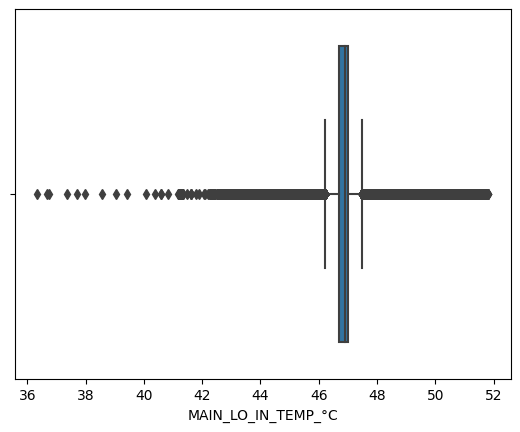

In [786]:
# check outliers
sns.boxplot(x=df["MAIN_LO_IN_TEMP_°C"])

<AxesSubplot: xlabel='MAIN_LO_IN_TEMP_°C'>

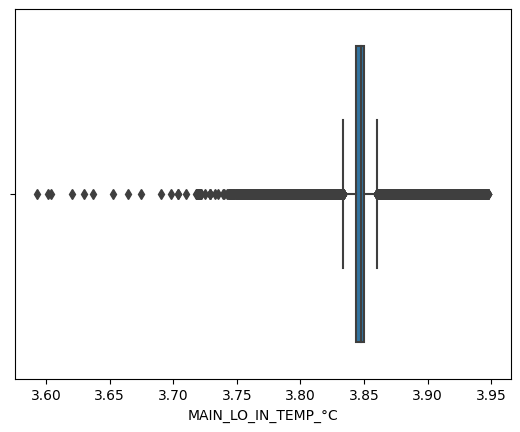

In [787]:
##1.logerithmic transformation
sns.boxplot(x=np.log(df["MAIN_LO_IN_TEMP_°C"]))

<AxesSubplot: >

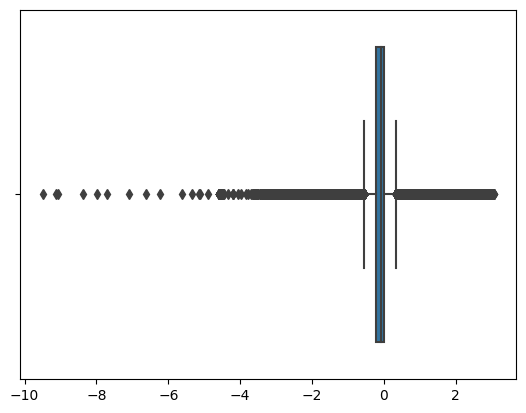

In [788]:
#2.yeo johnson transformation
transformer=PowerTransformer(method="yeo-johnson")        #cant apply box-cox method
k=transformer.fit_transform(df[["MAIN_LO_IN_TEMP_°C"]])
sns.boxplot(x=k)

In [789]:
## 4.iqr Method
q1=np.quantile(df["MAIN_LO_IN_TEMP_°C"],0.25)
q3=np.quantile(df["MAIN_LO_IN_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["MAIN_LO_IN_TEMP_°C"]< lower_tale)|(df["MAIN_LO_IN_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])

12166

## 11.ME_TC_LO_IN_PRESS_bar

In [791]:
df["ME_TC_LO_IN_PRESS_bar"].describe()

count    43447.000000
mean         1.174565
std          0.046999
min          0.950670
25%          1.143530
50%          1.164100
75%          1.203430
max          1.338750
Name: ME_TC_LO_IN_PRESS_bar, dtype: float64

<AxesSubplot: xlabel='ME_TC_LO_IN_PRESS_bar'>

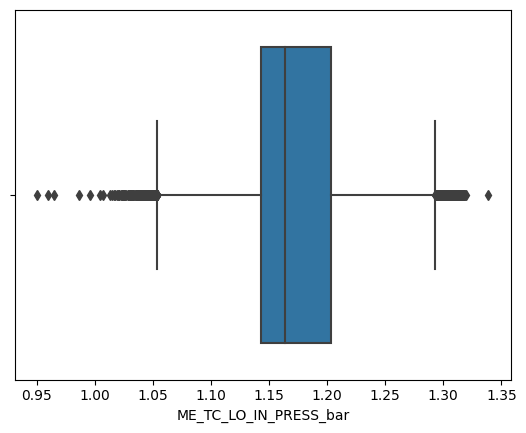

In [792]:
sns.boxplot(x=df["ME_TC_LO_IN_PRESS_bar"])

<AxesSubplot: xlabel='ME_TC_LO_IN_PRESS_bar'>

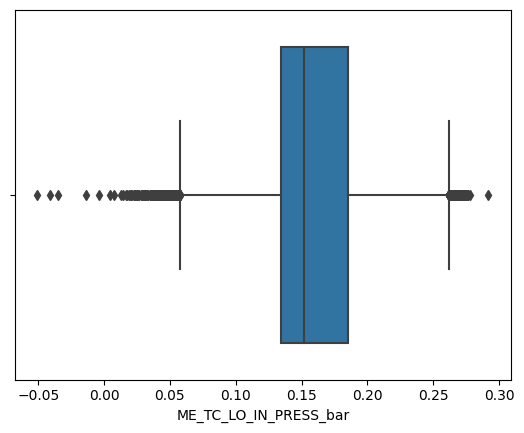

In [151]:
#logeerithmic
sns.boxplot(x=np.log(df["ME_TC_LO_IN_PRESS_bar"]))

In [793]:
## 4.iqr Method
q1=np.quantile(df["ME_TC_LO_IN_PRESS_bar"],0.25)
q3=np.quantile(df["ME_TC_LO_IN_PRESS_bar"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["ME_TC_LO_IN_PRESS_bar"]< lower_tale)|(df["ME_TC_LO_IN_PRESS_bar"]>upper_tale))   # to check No. outliers points
len(index[0])
df["ME_TC_LO_IN_PRESS_bar"]=np.where(df["ME_TC_LO_IN_PRESS_bar"]>upper_tale,upper_tale,df["ME_TC_LO_IN_PRESS_bar"])
df["ME_TC_LO_IN_PRESS_bar"]=np.where(df["ME_TC_LO_IN_PRESS_bar"]<lower_tale,lower_tale,df["ME_TC_LO_IN_PRESS_bar"])

<AxesSubplot: xlabel='ME_TC_LO_IN_PRESS_bar'>

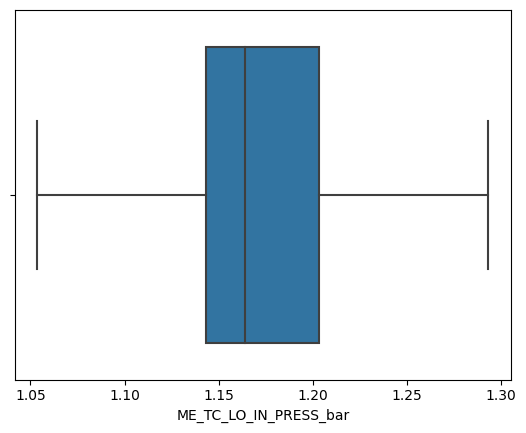

In [794]:
sns.boxplot(x=df["ME_TC_LO_IN_PRESS_bar"])

## 12.ME_TC_LO_OUT_TEMP_°C

In [795]:
df["ME_TC_LO_OUT_TEMP_°C"].describe()

count    43447.000000
mean        64.087395
std          3.638100
min         50.213960
25%         60.992160
50%         64.326080
75%         66.942715
max         72.827890
Name: ME_TC_LO_OUT_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='ME_TC_LO_OUT_TEMP_°C'>

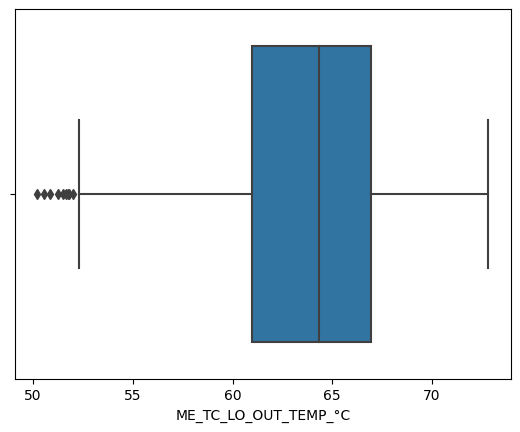

In [796]:
sns.boxplot(x=df["ME_TC_LO_OUT_TEMP_°C"])

In [797]:
#iqr method
q1=np.quantile(df["ME_TC_LO_OUT_TEMP_°C"],0.25)
q3=np.quantile(df["ME_TC_LO_OUT_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["ME_TC_LO_OUT_TEMP_°C"]< lower_tale)|(df["ME_TC_LO_OUT_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["ME_TC_LO_OUT_TEMP_°C"]=np.where(df["ME_TC_LO_OUT_TEMP_°C"]<lower_tale,lower_tale,df["ME_TC_LO_OUT_TEMP_°C"])
df["ME_TC_LO_OUT_TEMP_°C"]=np.where(df["ME_TC_LO_OUT_TEMP_°C"]>upper_tale,upper_tale,df["ME_TC_LO_OUT_TEMP_°C"])

<AxesSubplot: xlabel='ME_TC_LO_OUT_TEMP_°C'>

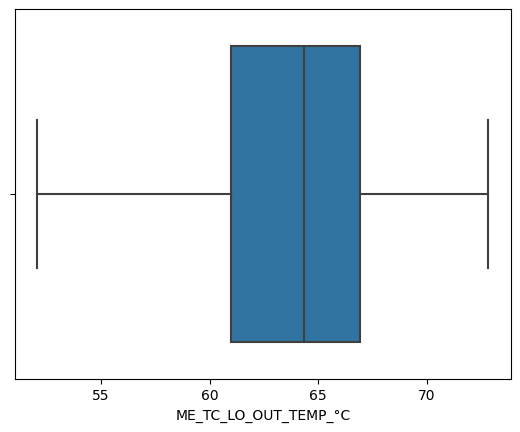

In [798]:
sns.boxplot(x=df["ME_TC_LO_OUT_TEMP_°C"])

## 13.FUEL_INDEX_%

In [800]:
df["FUEL_INDEX_%"].describe()

count    43447.000000
mean        73.675732
std          7.387457
min         42.483100
25%         69.788600
50%         74.939700
75%         78.329015
max         92.509550
Name: FUEL_INDEX_%, dtype: float64

<AxesSubplot: xlabel='FUEL_INDEX_%'>

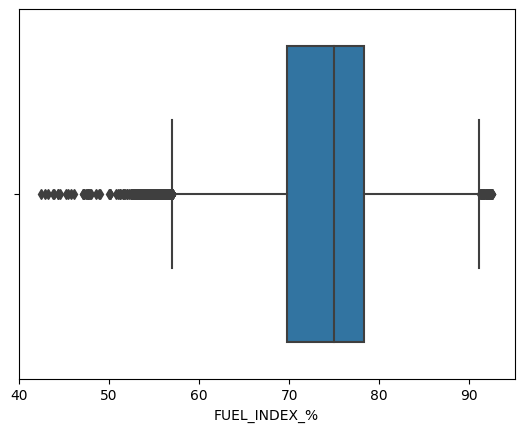

In [801]:
sns.boxplot(x=df["FUEL_INDEX_%"])

<AxesSubplot: xlabel='FUEL_INDEX_%'>

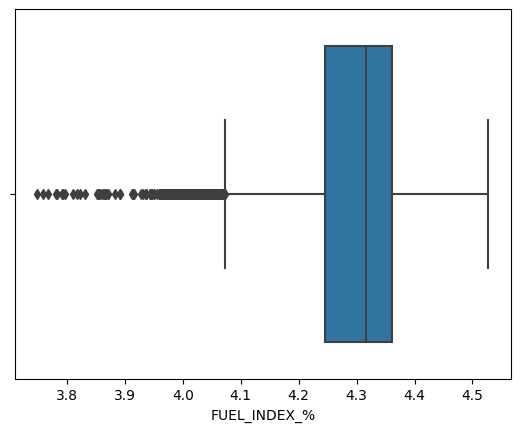

In [802]:
## logerithmic Transformation
sns.boxplot(x=np.log(df["FUEL_INDEX_%"]))

<AxesSubplot: >

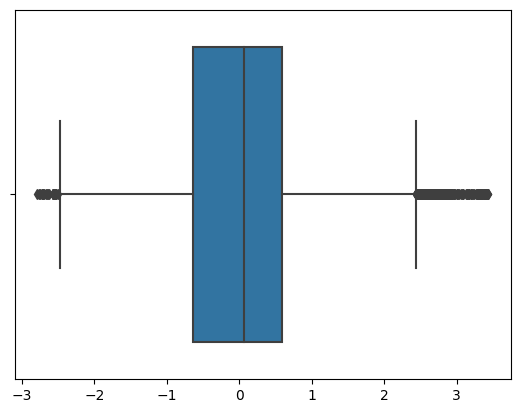

In [803]:
## box-cox transformation
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["FUEL_INDEX_%"]])
sns.boxplot(x=data)

In [805]:
##iqr method
q1=np.quantile(df["FUEL_INDEX_%"],0.25)
q3=np.quantile(df["FUEL_INDEX_%"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["FUEL_INDEX_%"]< lower_tale)|(df["FUEL_INDEX_%"]>upper_tale))   # to check No. outliers points
len(index[0])
df["FUEL_INDEX_%"]=np.where(df["FUEL_INDEX_%"]<lower_tale,lower_tale,df["FUEL_INDEX_%"])
df["FUEL_INDEX_%"]=np.where(df["FUEL_INDEX_%"]>upper_tale,upper_tale,df["FUEL_INDEX_%"])

<AxesSubplot: xlabel='FUEL_INDEX_%'>

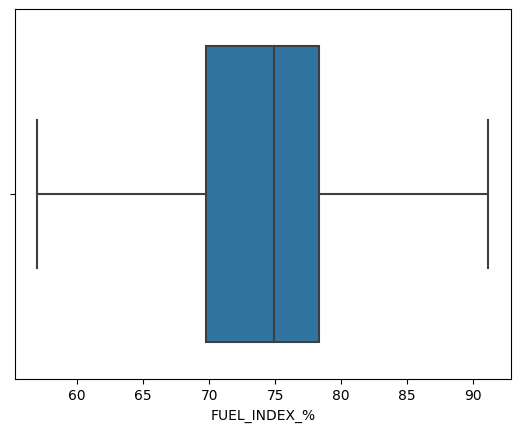

In [806]:
sns.boxplot(x=df["FUEL_INDEX_%"])

## 14.GE1_CYL_1_EXH_GAS_TEMP_°C

In [807]:
df["GE1_CYL_1_EXH_GAS_TEMP_°C"].describe()

count    43447.000000
mean       265.955236
std        245.912504
min         43.000000
25%         71.900000
50%         98.954250
75%        443.009490
max       1600.200000
Name: GE1_CYL_1_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_1_EXH_GAS_TEMP_°C'>

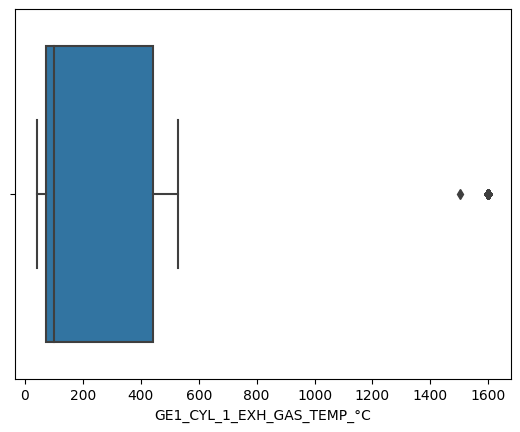

In [808]:
sns.boxplot(x=df["GE1_CYL_1_EXH_GAS_TEMP_°C"])

In [809]:
q1=np.quantile(df["GE1_CYL_1_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_1_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_1_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_1_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_1_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_1_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_1_EXH_GAS_TEMP_°C"])
df["GE1_CYL_1_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_1_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_1_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_1_EXH_GAS_TEMP_°C'>

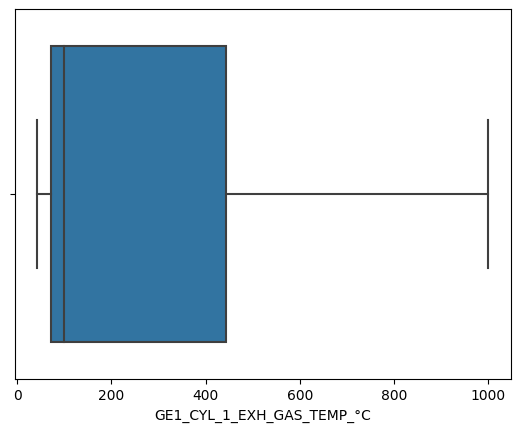

In [810]:
sns.boxplot(x=df["GE1_CYL_1_EXH_GAS_TEMP_°C"])

## 15.GE1_CYL_2_EXH_GAS_TEMP_°C

In [811]:
df["GE1_CYL_2_EXH_GAS_TEMP_°C"].describe()

count    43447.000000
mean       268.730809
std        248.470275
min         38.900000
25%         71.561580
50%         99.898850
75%        445.274425
max       1600.200000
Name: GE1_CYL_2_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_2_EXH_GAS_TEMP_°C'>

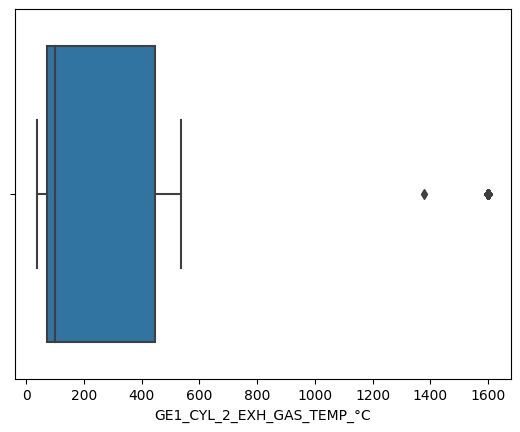

In [812]:
sns.boxplot(x=df["GE1_CYL_2_EXH_GAS_TEMP_°C"])

In [813]:
q1=np.quantile(df["GE1_CYL_2_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_2_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_1_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_1_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_2_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_2_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_2_EXH_GAS_TEMP_°C"])
df["GE1_CYL_2_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_2_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_2_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_2_EXH_GAS_TEMP_°C'>

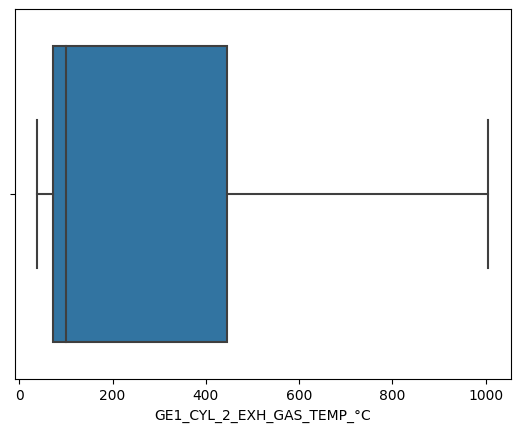

In [814]:
sns.boxplot(x=df["GE1_CYL_2_EXH_GAS_TEMP_°C"])

## 16.GE1_CYL_3_EXH_GAS_TEMP_°C

In [815]:
df["GE1_CYL_3_EXH_GAS_TEMP_°C"].describe()

count    43447.000000
mean       241.480861
std        189.850230
min         36.900000
25%         70.976165
50%         80.900000
75%        433.550295
max       1600.200000
Name: GE1_CYL_3_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_3_EXH_GAS_TEMP_°C'>

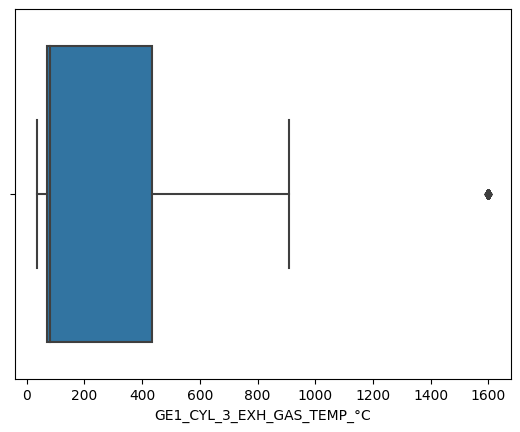

In [816]:
sns.boxplot(x=df["GE1_CYL_3_EXH_GAS_TEMP_°C"])

In [817]:
q1=np.quantile(df["GE1_CYL_3_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_3_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_3_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_3_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_3_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_3_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_3_EXH_GAS_TEMP_°C"])
df["GE1_CYL_3_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_3_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_3_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_3_EXH_GAS_TEMP_°C'>

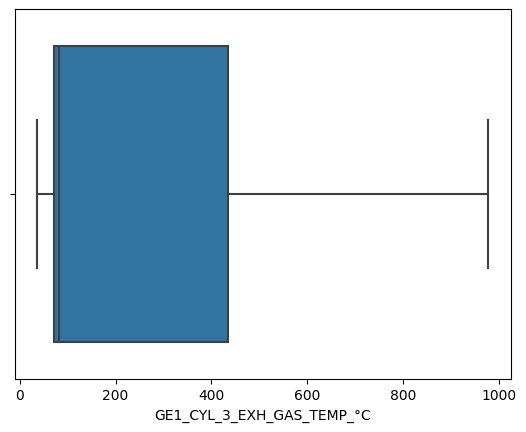

In [818]:
sns.boxplot(x=df["GE1_CYL_3_EXH_GAS_TEMP_°C"])

## 17.GE1_CYL_4_EXH_GAS_TEMP_°C

In [819]:
df['GE1_CYL_4_EXH_GAS_TEMP_°C'].describe()

count    43447.000000
mean       251.889709
std        206.080123
min         36.900000
25%         72.900000
50%         83.625700
75%        446.880485
max       1600.200000
Name: GE1_CYL_4_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_4_EXH_GAS_TEMP_°C'>

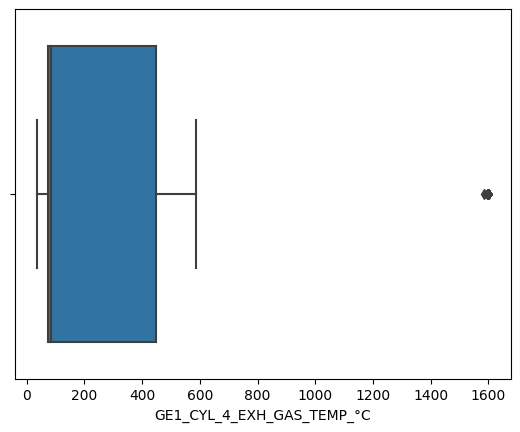

In [820]:
sns.boxplot(x=df['GE1_CYL_4_EXH_GAS_TEMP_°C'])

In [821]:
q1=np.quantile(df["GE1_CYL_4_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_4_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_4_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_4_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_4_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_4_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_4_EXH_GAS_TEMP_°C"])
df["GE1_CYL_4_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_4_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_4_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_4_EXH_GAS_TEMP_°C'>

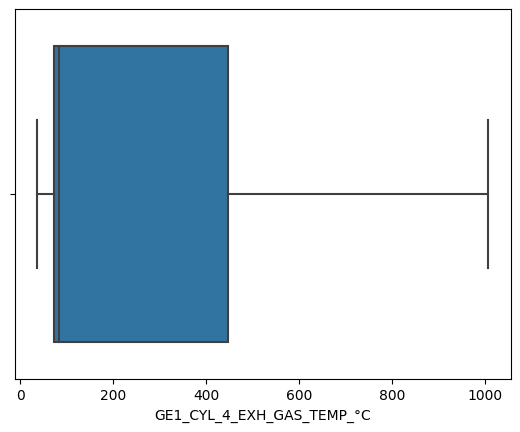

In [822]:
sns.boxplot(x=df['GE1_CYL_4_EXH_GAS_TEMP_°C'])

## 18.GE1_CYL_5_EXH_GAS_TEMP_

In [823]:
df['GE1_CYL_5_EXH_GAS_TEMP_°C'].describe()

count    43447.000000
mean       257.277631
std        240.671021
min         38.900000
25%         71.266420
50%         98.246500
75%        420.712500
max       1600.200000
Name: GE1_CYL_5_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_5_EXH_GAS_TEMP_°C'>

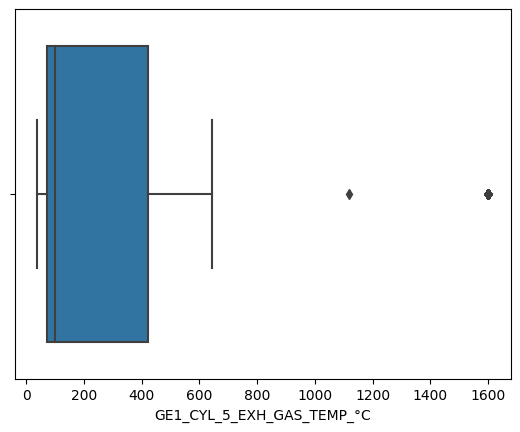

In [824]:
sns.boxplot(x=df['GE1_CYL_5_EXH_GAS_TEMP_°C'])

In [825]:
q1=np.quantile(df["GE1_CYL_5_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_5_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_5_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_5_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_5_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_5_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_5_EXH_GAS_TEMP_°C"])
df["GE1_CYL_5_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_5_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_5_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_5_EXH_GAS_TEMP_°C'>

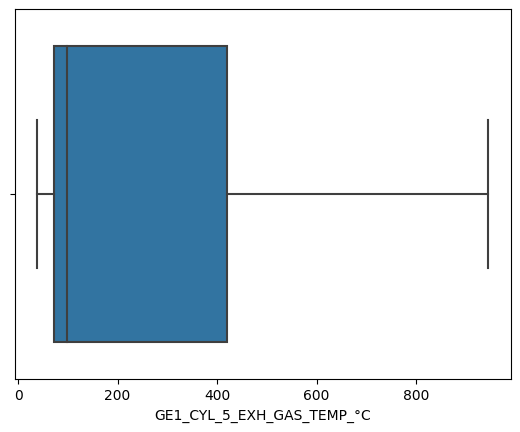

In [826]:
sns.boxplot(x=df['GE1_CYL_5_EXH_GAS_TEMP_°C'])

## 19.GE1_CYL_6_EXH_GAS_TEMP_°C

In [827]:
#check missing value
df['GE1_CYL_6_EXH_GAS_TEMP_°C'].describe()

count    43447.00000
mean       244.05198
std        190.05914
min         36.90000
25%         71.90000
50%         81.73442
75%        440.20761
max       1600.20000
Name: GE1_CYL_6_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_CYL_6_EXH_GAS_TEMP_°C'>

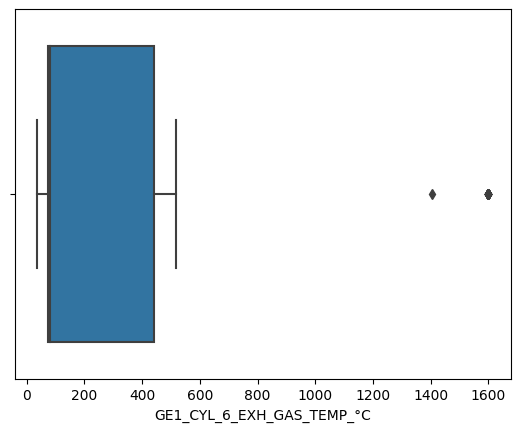

In [828]:
sns.boxplot(x=df['GE1_CYL_6_EXH_GAS_TEMP_°C'])

In [829]:
q1=np.quantile(df["GE1_CYL_6_EXH_GAS_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_CYL_6_EXH_GAS_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_CYL_6_EXH_GAS_TEMP_°C"]< lower_tale)|(df["GE1_CYL_6_EXH_GAS_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_CYL_6_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_6_EXH_GAS_TEMP_°C"]<lower_tale,lower_tale,df["GE1_CYL_6_EXH_GAS_TEMP_°C"])
df["GE1_CYL_6_EXH_GAS_TEMP_°C"]=np.where(df["GE1_CYL_6_EXH_GAS_TEMP_°C"]>upper_tale,upper_tale,df["GE1_CYL_6_EXH_GAS_TEMP_°C"])

<AxesSubplot: xlabel='GE1_CYL_6_EXH_GAS_TEMP_°C'>

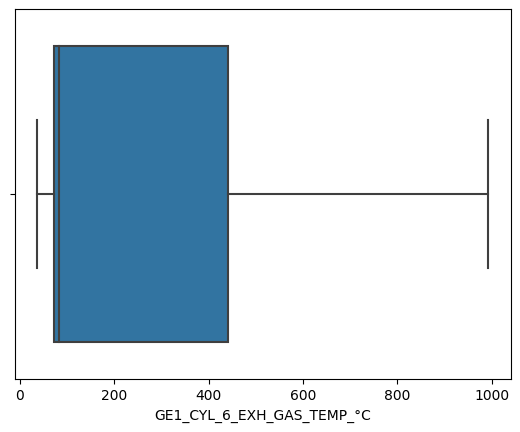

In [830]:
sns.boxplot(x=df['GE1_CYL_6_EXH_GAS_TEMP_°C'])

## 20.GE1_TC_EXH_GAS_IN(A)_TEMP_°C

In [831]:
df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"].describe()

count    43447.000000
mean       275.373353
std        232.211279
min          0.000000
25%         53.900000
50%        127.378890
75%        513.784155
max       1600.200000
Name: GE1_TC_EXH_GAS_IN(A)_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE1_TC_EXH_GAS_IN(A)_TEMP_°C'>

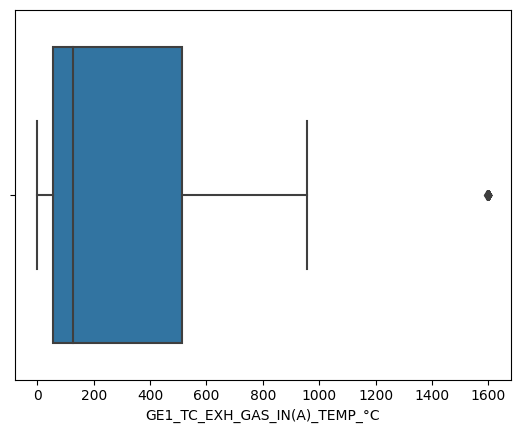

In [832]:
sns.boxplot(x=df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"])

In [833]:
q1=np.quantile(df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"],0.25)
q3=np.quantile(df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where((df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]< lower_tale)|(df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]>upper_tale))   # to check No. outliers points
len(index[0])
df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]=np.where(df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]<lower_tale,lower_tale,df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"])
df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]=np.where(df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"]>upper_tale,upper_tale,df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"])

<AxesSubplot: xlabel='GE1_TC_EXH_GAS_IN(A)_TEMP_°C'>

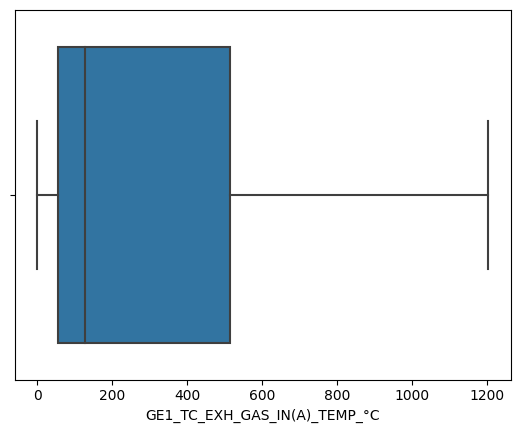

In [834]:
sns.boxplot(x=df["GE1_TC_EXH_GAS_IN(A)_TEMP_°C"])

## 21.GE2_CHARGE_AIR_PRESS_bar

In [835]:
df["GE2_CHARGE_AIR_PRESS_bar"].describe()

count    43447.000000
mean         0.232734
std          0.463235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.743540
Name: GE2_CHARGE_AIR_PRESS_bar, dtype: float64

<AxesSubplot: xlabel='GE2_CHARGE_AIR_PRESS_bar'>

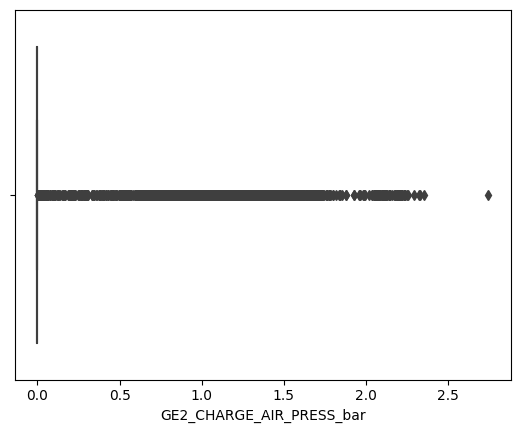

In [836]:
sns.boxplot(x=df['GE2_CHARGE_AIR_PRESS_bar'])

## 22.GE4_CYL_2_EXH_GAS_TEMP_°C

In [841]:
df['GE4_CYL_2_EXH_GAS_TEMP_°C'].describe()

count    43447.000000
mean       266.555535
std        175.871406
min         66.916860
25%         76.000000
50%        398.910470
75%        426.347495
max        906.214810
Name: GE4_CYL_2_EXH_GAS_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE4_CYL_2_EXH_GAS_TEMP_°C'>

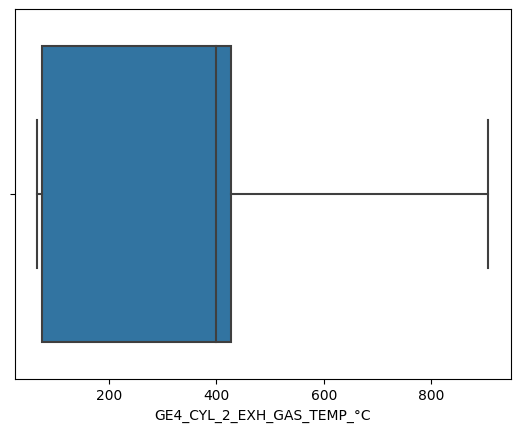

In [842]:
sns.boxplot(x=df['GE4_CYL_2_EXH_GAS_TEMP_°C'])

## 23.GE4_TC_A_EXH_GAS_IN_TEMP_°C

In [843]:
df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"].describe()

count    43447.000000
mean       310.630871
std        235.383880
min          0.000000
25%         49.878905
50%        486.760210
75%        534.094345
max       1600.200000
Name: GE4_TC_A_EXH_GAS_IN_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='GE4_TC_A_EXH_GAS_IN_TEMP_°C'>

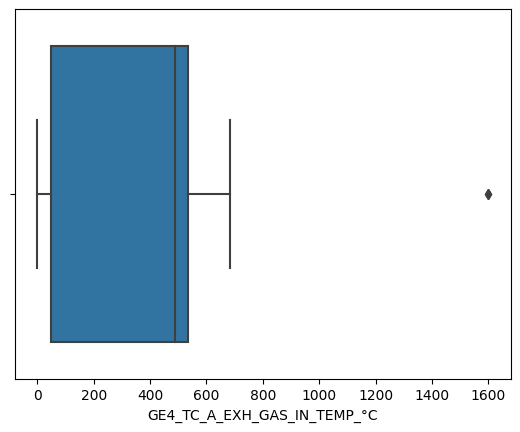

In [844]:
sns.boxplot(x=df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"])

In [845]:
#iqr
q1=np.quantile(df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"],0.25)
q3=np.quantile(df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"]=np.where(df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"]>upper_tale,upper_tale,df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"])  # to check No. outliers points


<AxesSubplot: xlabel='GE4_TC_A_EXH_GAS_IN_TEMP_°C'>

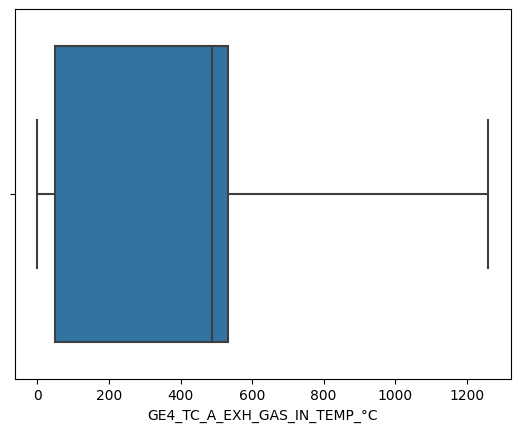

In [846]:
sns.boxplot(x=df["GE4_TC_A_EXH_GAS_IN_TEMP_°C"])

## 24.LONG_DEC_MIN

In [381]:
df["LAT_DEC_MIN"].describe()

count    43447.000000
mean      5035.856770
std       1798.379985
min         54.447660
25%       3830.608400
50%       5032.763160
75%       6231.968885
max       9913.424000
Name: LAT_DEC_MIN, dtype: float64

<AxesSubplot: xlabel='LAT_DEC_MIN'>

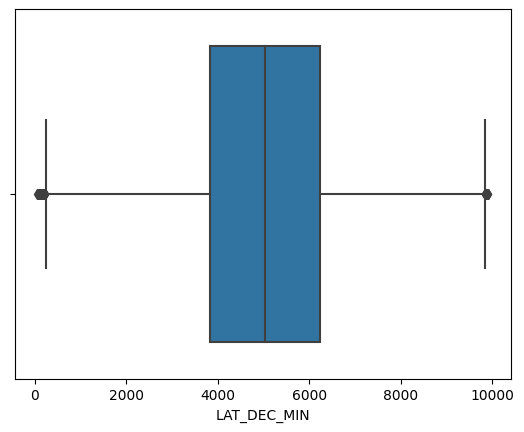

In [848]:
sns.boxplot(x=df["LAT_DEC_MIN"])

In [849]:
#iqr
q1=np.quantile(df["LAT_DEC_MIN"],0.25)
q3=np.quantile(df["LAT_DEC_MIN"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
df["LAT_DEC_MIN"]=np.where(df["LAT_DEC_MIN"]<lower_tale,lower_tale,df["LAT_DEC_MIN"])  # to check No. outliers points
df["LAT_DEC_MIN"]=np.where(df["LAT_DEC_MIN"]>upper_tale,upper_tale,df["LAT_DEC_MIN"])


<AxesSubplot: xlabel='LAT_DEC_MIN'>

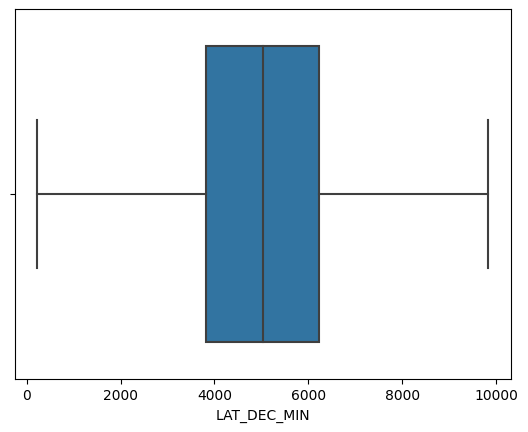

In [850]:
sns.boxplot(x=df["LAT_DEC_MIN"])

## 25.LAT_SIGN

In [ ]:
# This feature defines geograhical location value and may not afected 

In [851]:
df["LAT_SIGN"].isna().sum()

0

In [852]:
df["LAT_SIGN"].describe()

count    43447.00000
mean        78.35879
std          1.29040
min         78.00000
25%         78.00000
50%         78.00000
75%         78.00000
max         83.00000
Name: LAT_SIGN, dtype: float64

In [395]:
df["LAT_SIGN"].value_counts()

LAT_SIGN
78.00000    40329
83.00000     3117
81.35565        1
Name: count, dtype: int64

<AxesSubplot: xlabel='LAT_SIGN'>

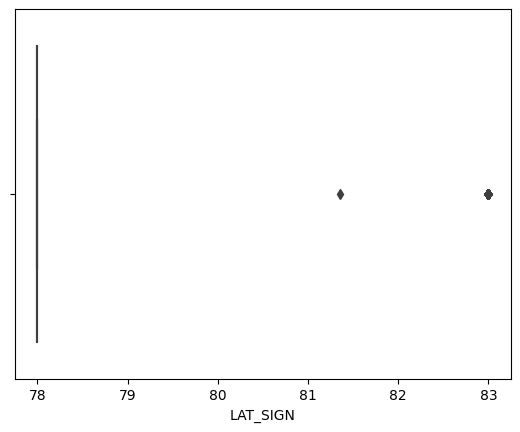

In [853]:

sns.boxplot(x=df["LAT_SIGN"])

<AxesSubplot: xlabel='LAT_SIGN'>

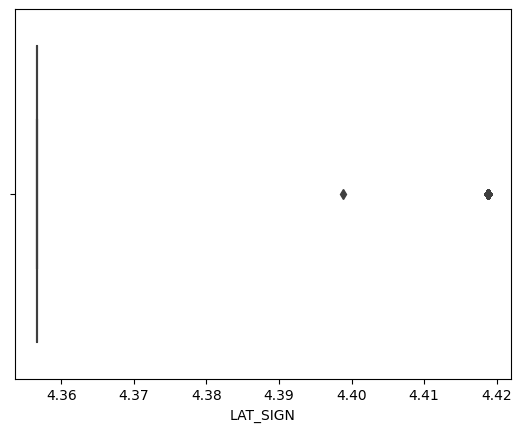

In [854]:
sns.boxplot(x=np.log(df["LAT_SIGN"]))  #log transform

## 26.LONG_SIGN

In [ ]:
# This feature defines geograhical location value and may not afected 

In [412]:
df["LONG_SIGN"].isna().sum()

0

In [413]:
df["LONG_SIGN"].value_counts()

LONG_SIGN
69    41873
87     1574
Name: count, dtype: int64

## 27.ME_RPM_RPM

In [855]:
df["ME_RPM_RPM"].describe()

count    43447.000000
mean        62.537116
std          2.962409
min         44.424350
25%         60.181920
50%         63.527320
75%         64.764595
max         70.873610
Name: ME_RPM_RPM, dtype: float64

<AxesSubplot: xlabel='ME_RPM_RPM'>

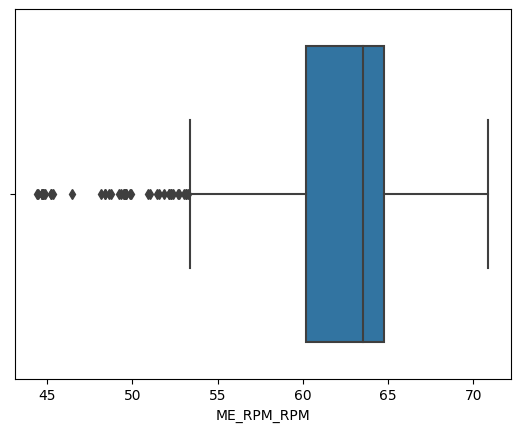

In [856]:
sns.boxplot(x=df["ME_RPM_RPM"])

<AxesSubplot: xlabel='ME_RPM_RPM'>

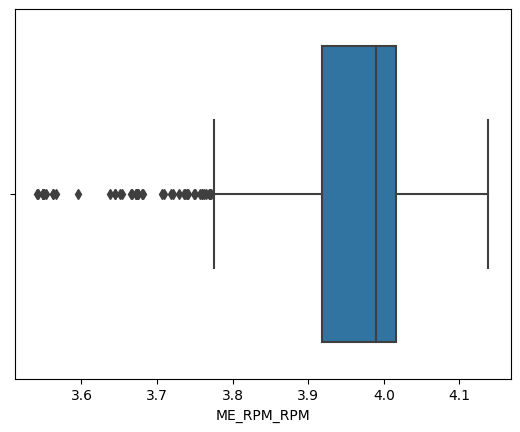

In [857]:
sns.boxplot(x=np.cbrt(df["ME_RPM_RPM"])) #logerithmic transformation

<AxesSubplot: >

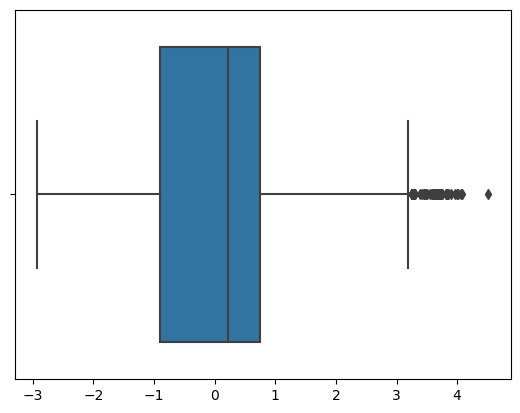

In [858]:
# box cox Transformer
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_RPM_RPM"]])
sns.boxplot(x=data)

In [859]:
#iqr
q1=np.quantile(df["ME_RPM_RPM"],0.25)
q3=np.quantile(df["ME_RPM_RPM"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
df["ME_RPM_RPM"]=np.where(df["ME_RPM_RPM"]<lower_tale,lower_tale,df["ME_RPM_RPM"])  # to check No. outliers points


<AxesSubplot: xlabel='ME_RPM_RPM'>

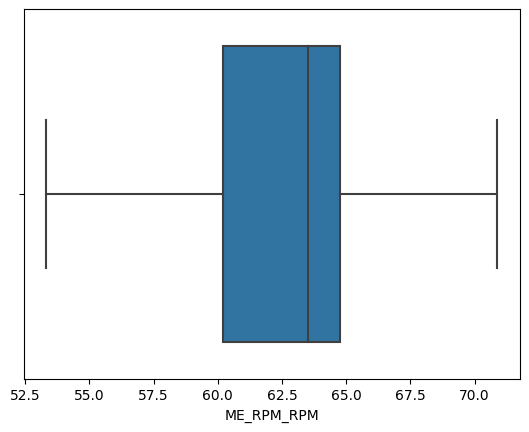

In [860]:
sns.boxplot(x=df["ME_RPM_RPM"])

## 28.ME_SHAFT_POWER_kW

In [426]:
df["ME_SHAFT_POWER_kW"].describe()

count    43447.000000
mean      7304.125917
std        986.425270
min       3352.467440
25%       6795.703385
50%       7513.328500
75%       8022.944320
max       9890.584760
Name: ME_SHAFT_POWER_kW, dtype: float64

<AxesSubplot: xlabel='ME_SHAFT_POWER_kW'>

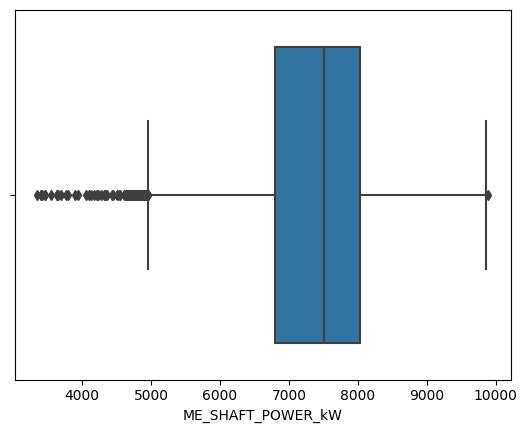

In [861]:
sns.boxplot(x=df["ME_SHAFT_POWER_kW"])

<AxesSubplot: >

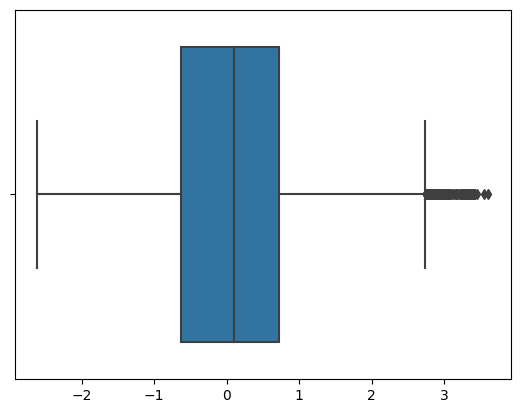

In [862]:
# box cox Transformer
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_SHAFT_POWER_kW"]])
sns.boxplot(x=data)

In [863]:
#iqr
q1=np.quantile(df["ME_SHAFT_POWER_kW"],0.25)
q3=np.quantile(df["ME_SHAFT_POWER_kW"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr
upper_tale=q3+1.5*iqr
index=np.where(df["ME_SHAFT_POWER_kW"]<lower_tale)  # to check No. outliers points
len(index[0])


715

## 29.ME_SHAFT_TORQUE_kNm

In [864]:
df["ME_SHAFT_TORQUE_kNm"].describe()

count    43447.000000
mean      1109.392133
std        104.252913
min        696.316420
25%       1060.508650
50%       1130.377510
75%       1183.210525
max       1384.628350
Name: ME_SHAFT_TORQUE_kNm, dtype: float64

In [1353]:
#zscore method
z_score=(df["ME_SHAFT_TORQUE_kNm"]-df["ME_SHAFT_TORQUE_kNm"].mean())/df["ME_SHAFT_TORQUE_kNm"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


20


In [1354]:
df["ME_SHAFT_TORQUE_kNm"][outlier_index]=df["ME_SHAFT_TORQUE_kNm"].median()

In [1355]:
#zscore method
z_score=(df["ME_SHAFT_TORQUE_kNm"]-df["ME_SHAFT_TORQUE_kNm"].mean())/df["ME_SHAFT_TORQUE_kNm"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 30. ME_CYL1_JCFW_OUT_TEMP_°C

In [867]:
df["ME_CYL1_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.335550
std          0.980755
min         58.429990
25%         83.763385
50%         84.690750
75%         84.888635
max         88.660590
Name: ME_CYL1_JCFW_OUT_TEMP_°C, dtype: float64

In [456]:
df["ME_CYL1_JCFW_OUT_TEMP_°C"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43447 entries, 0 to 43446
Series name: ME_CYL1_JCFW_OUT_TEMP_°C
Non-Null Count  Dtype  
--------------  -----  
43447 non-null  float64
dtypes: float64(1)
memory usage: 339.6 KB


<AxesSubplot: xlabel='ME_CYL1_JCFW_OUT_TEMP_°C'>

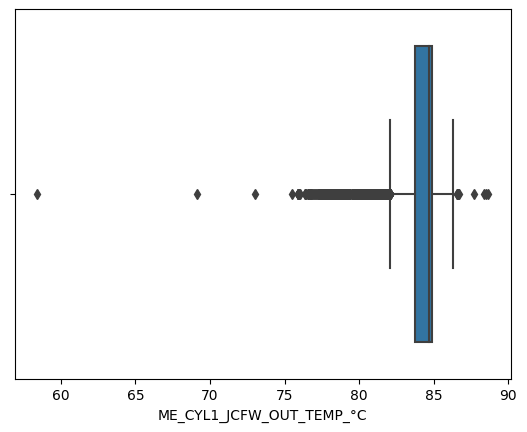

In [868]:
sns.boxplot(x=df["ME_CYL1_JCFW_OUT_TEMP_°C"])

In [869]:
#remove extreme outlier
index=np.where(df["ME_CYL1_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL1_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL1_JCFW_OUT_TEMP_°C"].median()

<AxesSubplot: xlabel='ME_CYL1_JCFW_OUT_TEMP_°C'>

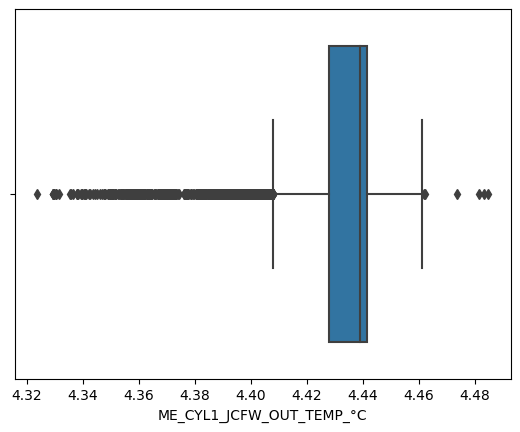

In [870]:
# Log Transform
sns.boxplot(x=np.log(df["ME_CYL1_JCFW_OUT_TEMP_°C"]))

<AxesSubplot: >

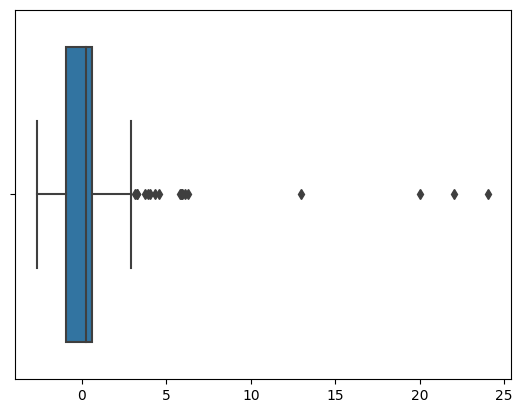

In [871]:
## box-cox
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_CYL1_JCFW_OUT_TEMP_°C"]])
sns.boxplot(x=data)

In [1356]:
#zscore method
z_score=(df["ME_CYL1_JCFW_OUT_TEMP_°C"]-df["ME_CYL1_JCFW_OUT_TEMP_°C"].mean())/df["ME_CYL1_JCFW_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


628


## 31. ME_CYL2_JCFW_OUT_TEMP_°C

In [474]:
df["ME_CYL2_JCFW_OUT_TEMP_°C"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 43447 entries, 0 to 43446
Series name: ME_CYL2_JCFW_OUT_TEMP_°C
Non-Null Count  Dtype  
--------------  -----  
43447 non-null  float64
dtypes: float64(1)
memory usage: 339.6 KB


In [873]:
df["ME_CYL2_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.591259
std          1.005948
min         58.005330
25%         83.923855
50%         84.998750
75%         85.186385
max         88.882050
Name: ME_CYL2_JCFW_OUT_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='ME_CYL2_JCFW_OUT_TEMP_°C'>

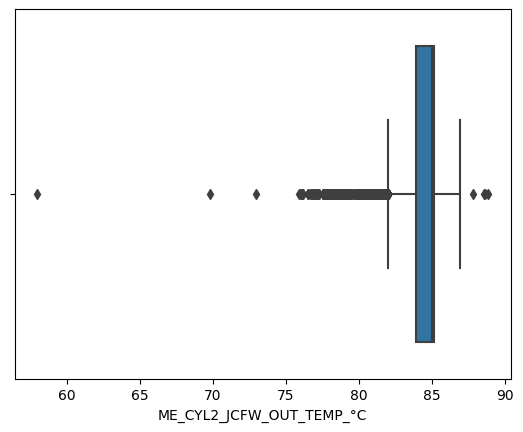

In [874]:
sns.boxplot(x=df["ME_CYL2_JCFW_OUT_TEMP_°C"])

In [875]:
#remove extreme outlier
index=np.where(df["ME_CYL2_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL2_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL2_JCFW_OUT_TEMP_°C"].median()

<AxesSubplot: xlabel='ME_CYL2_JCFW_OUT_TEMP_°C'>

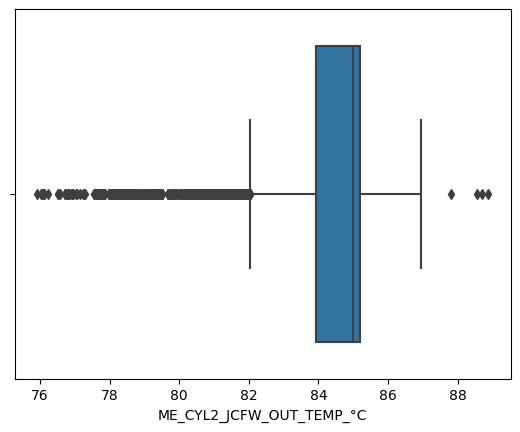

In [876]:
sns.boxplot(x=df["ME_CYL2_JCFW_OUT_TEMP_°C"])

## 32.ME_CYL3_JCFW_OUT_TEMP_°C

In [482]:
df["ME_CYL3_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        85.209100
std          1.019049
min         58.859820
25%         84.780715
50%         85.553180
75%         85.837595
max         89.499260
Name: ME_CYL3_JCFW_OUT_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='ME_CYL3_JCFW_OUT_TEMP_°C'>

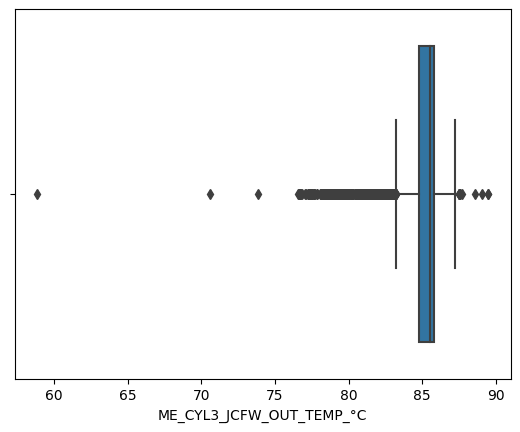

In [877]:
sns.boxplot(x=df["ME_CYL3_JCFW_OUT_TEMP_°C"])

In [878]:
#remove extreme outlier
index=np.where(df["ME_CYL3_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL3_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL3_JCFW_OUT_TEMP_°C"].median()

## 33.ME_CYL4_JCFW_OUT_TEMP_°C

In [487]:
df["ME_CYL4_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.933065
std          0.833289
min         58.562760
25%         84.807255
50%         85.093610
75%         85.408375
max         89.898830
Name: ME_CYL4_JCFW_OUT_TEMP_°C, dtype: float64

In [879]:
#remove extreme outlier
index=np.where(df["ME_CYL4_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL4_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL4_JCFW_OUT_TEMP_°C"].median()

<AxesSubplot: xlabel='ME_CYL4_JCFW_OUT_TEMP_°C'>

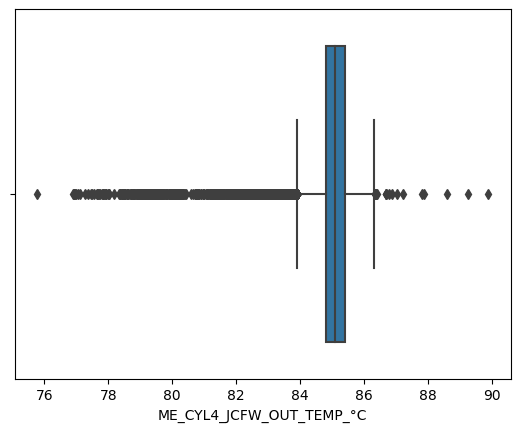

In [880]:
sns.boxplot(x=df["ME_CYL4_JCFW_OUT_TEMP_°C"])

## 34.ME_CYL5_JCFW_OUT_TEMP_°C

In [881]:
df["ME_CYL5_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.834771
std          1.076589
min         59.153240
25%         84.272585
50%         85.149580
75%         85.408680
max         89.232230
Name: ME_CYL5_JCFW_OUT_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='ME_CYL5_JCFW_OUT_TEMP_°C'>

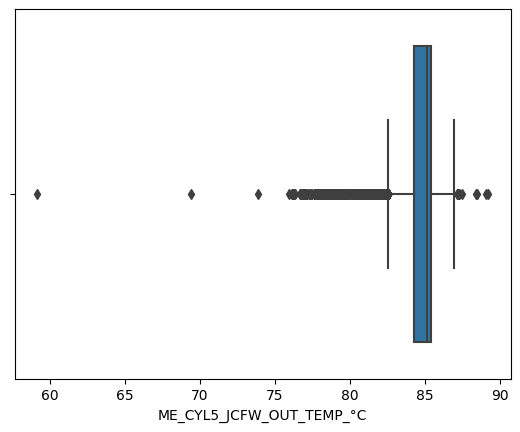

In [882]:
sns.boxplot(x=df["ME_CYL5_JCFW_OUT_TEMP_°C"])

In [883]:
#remove extreme outlier
index=np.where(df["ME_CYL5_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL5_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL5_JCFW_OUT_TEMP_°C"].median()

## 35.ME_CYL6_JCFW_OUT_TEMP_°C

In [498]:
df["ME_CYL6_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.515476
std          0.971967
min         60.090940
25%         84.224910
50%         84.867780
75%         85.063085
max         88.672980
Name: ME_CYL6_JCFW_OUT_TEMP_°C, dtype: float64

<AxesSubplot: xlabel='ME_CYL6_JCFW_OUT_TEMP_°C'>

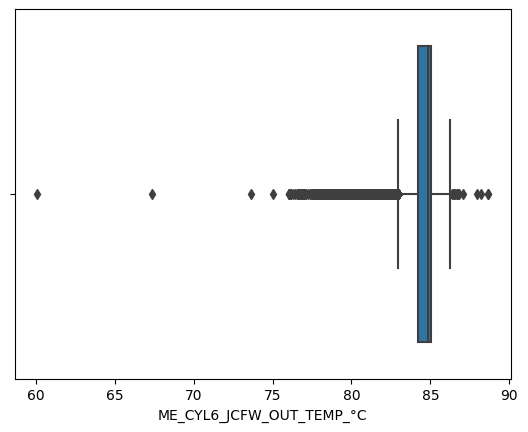

In [884]:
sns.boxplot(x=df['ME_CYL6_JCFW_OUT_TEMP_°C'])

In [885]:
#remove extreme outlier
index=np.where(df["ME_CYL6_JCFW_OUT_TEMP_°C"]<74)
df["ME_CYL6_JCFW_OUT_TEMP_°C"][index]=df["ME_CYL6_JCFW_OUT_TEMP_°C"].median()

## 36.GE2_FO_IN_PRESS_bar

In [517]:
df["GE2_FO_IN_PRESS_bar"].describe()

count    43447.000000
mean         7.986123
std          0.406591
min          0.000000
25%          7.700000
50%          7.929810
75%          8.265510
max         10.376570
Name: GE2_FO_IN_PRESS_bar, dtype: float64

In [886]:
#z-score method
z_score=(df["GE2_FO_IN_PRESS_bar"]-df["GE2_FO_IN_PRESS_bar"].mean())/df["GE2_FO_IN_PRESS_bar"].std()
outlier_index=np.where(z_score>3)
print(len(outlier_index[0]))

44


In [887]:
df["GE2_FO_IN_PRESS_bar"][outlier_index]=df["GE2_FO_IN_PRESS_bar"].mean()

In [888]:
z_score=(df["GE2_FO_IN_PRESS_bar"]-df["GE2_FO_IN_PRESS_bar"].mean())/df["GE2_FO_IN_PRESS_bar"].std()
outlier_index=np.where(z_score>3)
print(len(outlier_index[0]))

33


## 37.GE3_FO_IN_PRESS_bar

In [527]:
df["GE3_FO_IN_PRESS_bar"].describe()

count    43447.000000
mean         7.727029
std          1.064002
min          0.000000
25%          7.543660
50%          7.803960
75%          8.138660
max         10.137770
Name: GE3_FO_IN_PRESS_bar, dtype: float64

In [889]:
z_score=(df["GE3_FO_IN_PRESS_bar"]-df["GE3_FO_IN_PRESS_bar"].mean())/df["GE3_FO_IN_PRESS_bar"].std()
outlier_index=np.where(z_score>3)
print(len(outlier_index[0]))

0


## 38.GE4_FO_IN_PRESS_bar

In [891]:
df["GE4_FO_IN_PRESS_bar"].describe()

count    43447.000000
mean         7.704575
std          0.858578
min          0.000000
25%          7.500000
50%          7.747240
75%          8.046980
max         10.051670
Name: GE4_FO_IN_PRESS_bar, dtype: float64

In [890]:
z_score=(df["GE4_FO_IN_PRESS_bar"]-df["GE4_FO_IN_PRESS_bar"].mean())/df["GE4_FO_IN_PRESS_bar"].std()
outlier_index=np.where(z_score>3)
print(len(outlier_index[0]))

0


## 39.GE1_TC_LO_PRESS_bar

In [546]:
df["GE1_TC_LO_PRESS_bar"].describe()

count    43447.000000
mean         0.951104
std          0.702410
min          0.000000
25%          0.400000
50%          0.400000
75%          1.700000
max          3.160620
Name: GE1_TC_LO_PRESS_bar, dtype: float64

In [892]:
#zscore method
z_score=(df["GE1_TC_LO_PRESS_bar"]-df["GE1_TC_LO_PRESS_bar"].mean())/df["GE1_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


6


In [893]:
df["GE1_TC_LO_PRESS_bar"][outlier_index]=df["GE1_TC_LO_PRESS_bar"].median()

In [894]:
#zscore method
z_score=(df["GE1_TC_LO_PRESS_bar"]-df["GE1_TC_LO_PRESS_bar"].mean())/df["GE1_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 40.GE2_TC_LO_PRESS_bar

In [550]:
df["GE2_TC_LO_PRESS_bar"].describe()

count    43447.000000
mean         0.781925
std          0.866122
min          0.000000
25%          0.318615
50%          0.351630
75%          0.400000
max          4.001280
Name: GE2_TC_LO_PRESS_bar, dtype: float64

In [895]:
#zscore method
z_score=(df["GE2_TC_LO_PRESS_bar"]-df["GE2_TC_LO_PRESS_bar"].mean())/df["GE2_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


10


In [896]:
df["GE2_TC_LO_PRESS_bar"][outlier_index]=df["GE2_TC_LO_PRESS_bar"].median()

In [897]:
#zscore method
z_score=(df["GE2_TC_LO_PRESS_bar"]-df["GE2_TC_LO_PRESS_bar"].mean())/df["GE2_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 41.GE3_TC_LO_PRESS_bar

In [898]:
df["GE3_TC_LO_PRESS_bar"].describe()

count    43447.000000
mean         0.822425
std          0.777121
min          0.000000
25%          0.424110
50%          0.469730
75%          0.500000
max          3.691310
Name: GE3_TC_LO_PRESS_bar, dtype: float64

In [899]:
#zscore method
z_score=(df["GE3_TC_LO_PRESS_bar"]-df["GE3_TC_LO_PRESS_bar"].mean())/df["GE3_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


26


In [900]:
df["GE3_TC_LO_PRESS_bar"][outlier_index]=df["GE3_TC_LO_PRESS_bar"].mean()

In [901]:
#zscore method
z_score=(df["GE3_TC_LO_PRESS_bar"]-df["GE3_TC_LO_PRESS_bar"].mean())/df["GE3_TC_LO_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


2


## 42.GE4_TC_LO_IN_PRESS_bar

In [904]:
df['GE4_TC_LO_IN_PRESS_bar'].describe()

count    43447.000000
mean         1.317337
std          1.500615
min          0.000000
25%          0.400000
50%          1.600000
75%          1.800000
max         12.000000
Name: GE4_TC_LO_IN_PRESS_bar, dtype: float64

In [905]:
#zscore method
z_score=(df["GE4_TC_LO_IN_PRESS_bar"]-df["GE4_TC_LO_IN_PRESS_bar"].mean())/df["GE4_TC_LO_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


660


<AxesSubplot: xlabel='GE4_TC_LO_IN_PRESS_bar'>

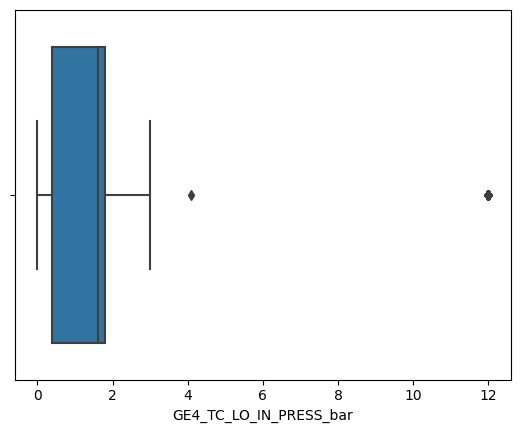

In [1358]:
sns.boxplot(x=df["GE4_TC_LO_IN_PRESS_bar"])

In [1360]:
#iqr
q1=np.quantile(df["GE4_TC_LO_IN_PRESS_bar"],0.25)
q3=np.quantile(df["GE4_TC_LO_IN_PRESS_bar"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                         #tried with increasing quantile range
upper_tale=q3+1.5*iqr
index=np.where((df["GE4_TC_LO_IN_PRESS_bar"]<lower_tale)|(df["GE4_TC_LO_IN_PRESS_bar"]>upper_tale))  # to check No. outliers points
len(index[0])


661

## 43.GE1_LT_WATER_IN_PRESS_bar

In [568]:
df["GE1_LT_WATER_IN_PRESS_bar"].describe()

count    43447.000000
mean         1.904041
std          0.633428
min          0.000000
25%          1.400000
50%          1.560400
75%          2.600000
max          2.858880
Name: GE1_LT_WATER_IN_PRESS_bar, dtype: float64

In [906]:
#zscore method
z_score=(df["GE1_LT_WATER_IN_PRESS_bar"]-df["GE1_LT_WATER_IN_PRESS_bar"].mean())/df["GE1_LT_WATER_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


903


<AxesSubplot: xlabel='GE1_LT_WATER_IN_PRESS_bar'>

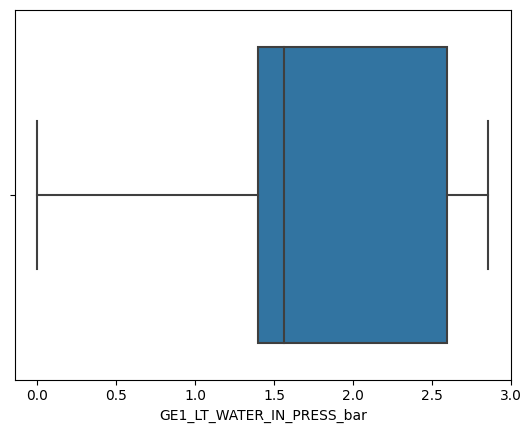

In [1361]:
sns.boxplot(x=df["GE1_LT_WATER_IN_PRESS_bar"])

## 42.GE2_LT_WATER_IN_PRESS_bar

In [570]:
df["GE2_LT_WATER_IN_PRESS_bar"].describe()

count    43447.000000
mean         1.615907
std          0.460046
min          0.000000
25%          1.400000
50%          1.478070
75%          1.583405
max          2.810540
Name: GE2_LT_WATER_IN_PRESS_bar, dtype: float64

In [907]:
#zscore method
z_score=(df["GE2_LT_WATER_IN_PRESS_bar"]-df["GE2_LT_WATER_IN_PRESS_bar"].mean())/df["GE2_LT_WATER_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


810


<AxesSubplot: xlabel='GE2_LT_WATER_IN_PRESS_bar'>

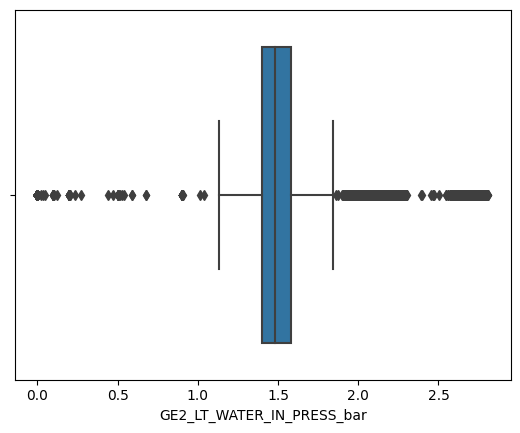

In [908]:
sns.boxplot(x=df["GE2_LT_WATER_IN_PRESS_bar"])

In [909]:
#iqr
q1=np.quantile(df["GE2_LT_WATER_IN_PRESS_bar"],0.25)
q3=np.quantile(df["GE2_LT_WATER_IN_PRESS_bar"],0.75)
iqr=q3-q1
lower_tale=q1-2*iqr                         #tried with increasing quantile range
upper_tale=q3+2*iqr
index=np.where((df["GE2_LT_WATER_IN_PRESS_bar"]<lower_tale)|(df["GE2_LT_WATER_IN_PRESS_bar"]>upper_tale))  # to check No. outliers points
len(index[0])


10120

## 43.GE3_LT_WATER_IN_PRESS_bar

In [581]:
df["GE3_LT_WATER_IN_PRESS_bar"].describe()

count    43447.000000
mean         1.615889
std          0.370751
min          0.100000
25%          1.400000
50%          1.475450
75%          1.529985
max          2.832580
Name: GE3_LT_WATER_IN_PRESS_bar, dtype: float64

In [910]:
#zscore method
z_score=(df["GE3_LT_WATER_IN_PRESS_bar"]-df["GE3_LT_WATER_IN_PRESS_bar"].mean())/df["GE3_LT_WATER_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


331


In [914]:
df["GE3_LT_WATER_IN_PRESS_bar"][outlier_index]=df["GE3_LT_WATER_IN_PRESS_bar"].median()

In [1362]:
#zscore method
z_score=(df["GE3_LT_WATER_IN_PRESS_bar"]-df["GE3_LT_WATER_IN_PRESS_bar"].mean())/df["GE3_LT_WATER_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


275


## 44.ME_CYL_LUBRICATION_TEMP_°C

In [917]:
df["ME_CYL_LUBRICATION_TEMP_°C"].describe()

count    43447.000000
mean        59.110062
std          2.607612
min         50.849880
25%         57.700000
50%         59.764320
75%         60.996600
max         65.071350
Name: ME_CYL_LUBRICATION_TEMP_°C, dtype: float64

In [918]:
#zscore method
z_score=(df["ME_CYL_LUBRICATION_TEMP_°C"]-df["ME_CYL_LUBRICATION_TEMP_°C"].mean())/df["ME_CYL_LUBRICATION_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


24


In [921]:
df["ME_CYL_LUBRICATION_TEMP_°C"][outlier_index]=df["ME_CYL_LUBRICATION_TEMP_°C"].mean()

In [922]:
#zscore method
z_score=(df["ME_CYL_LUBRICATION_TEMP_°C"]-df["ME_CYL_LUBRICATION_TEMP_°C"].mean())/df["ME_CYL_LUBRICATION_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 45.ME_CYL2_JCFW_OUT_TEMP_°C

In [923]:
df["ME_CYL2_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        84.592506
std          0.993762
min         75.921880
25%         83.924250
50%         84.998750
75%         85.186385
max         88.882050
Name: ME_CYL2_JCFW_OUT_TEMP_°C, dtype: float64

In [924]:
#zscore method
z_score=(df["ME_CYL2_JCFW_OUT_TEMP_°C"]-df["ME_CYL2_JCFW_OUT_TEMP_°C"].mean())/df["ME_CYL2_JCFW_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


633


<AxesSubplot: xlabel='ME_CYL2_JCFW_OUT_TEMP_°C'>

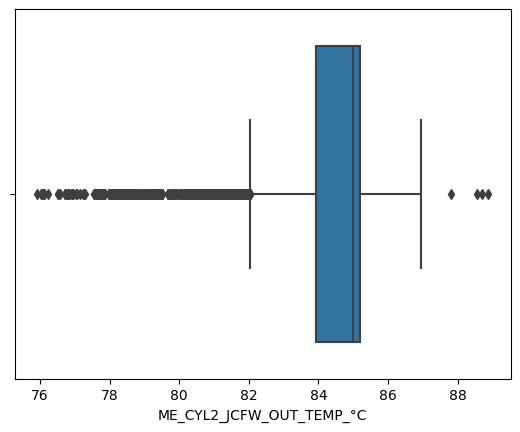

In [925]:
sns.boxplot(x=df["ME_CYL2_JCFW_OUT_TEMP_°C"])

<AxesSubplot: xlabel='ME_CYL2_JCFW_OUT_TEMP_°C'>

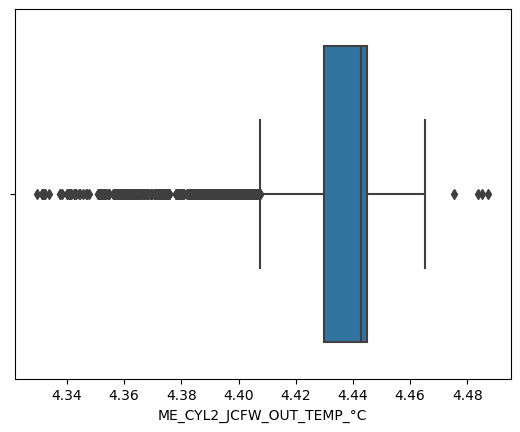

In [926]:
# log Transform
sns.boxplot(x=np.log(df["ME_CYL2_JCFW_OUT_TEMP_°C"]))

<AxesSubplot: >

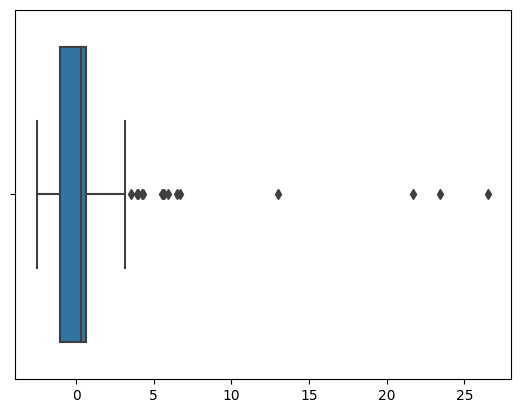

In [928]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_CYL2_JCFW_OUT_TEMP_°C"]])
sns.boxplot(x=data)

## 46.ME_CYL3_JCFW_OUT_TEMP_°C

In [929]:
df["ME_CYL3_JCFW_OUT_TEMP_°C"].describe()

count    43447.000000
mean        85.210329
std          1.007264
min         76.600000
25%         84.781085
50%         85.553180
75%         85.837595
max         89.499260
Name: ME_CYL3_JCFW_OUT_TEMP_°C, dtype: float64

In [930]:
#zscore method
z_score=(df["ME_CYL3_JCFW_OUT_TEMP_°C"]-df["ME_CYL3_JCFW_OUT_TEMP_°C"].mean())/df["ME_CYL3_JCFW_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


649


<AxesSubplot: xlabel='ME_CYL3_JCFW_OUT_TEMP_°C'>

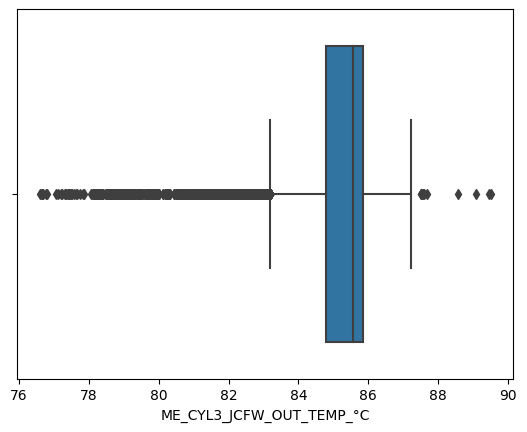

In [931]:
sns.boxplot(x=df["ME_CYL3_JCFW_OUT_TEMP_°C"])

<AxesSubplot: >

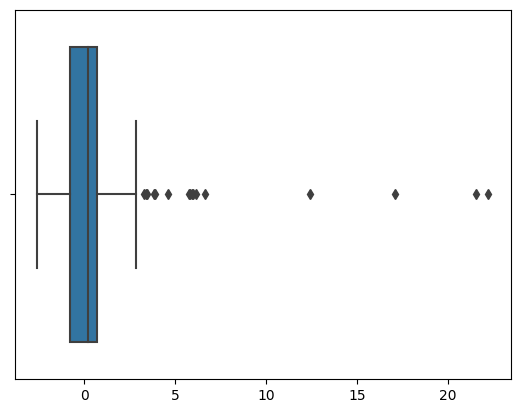

In [932]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_CYL3_JCFW_OUT_TEMP_°C"]])
sns.boxplot(x=data)

## 46.GE2_FO_IN_TEMP_°C

In [933]:
df["GE2_FO_IN_TEMP_°C"].describe()

count    43447.000000
mean       116.752157
std         18.695961
min         33.336340
25%        116.664560
50%        121.000000
75%        126.000000
max        130.000000
Name: GE2_FO_IN_TEMP_°C, dtype: float64

In [934]:
#zscore method
z_score=(df["GE2_FO_IN_TEMP_°C"]-df["GE2_FO_IN_TEMP_°C"].mean())/df["GE2_FO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


2068


<AxesSubplot: xlabel='GE2_FO_IN_TEMP_°C'>

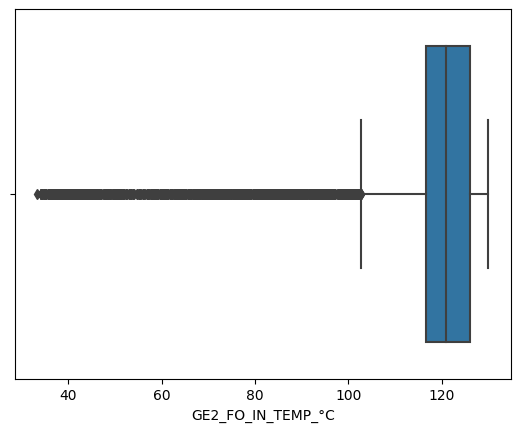

In [935]:
sns.boxplot(x=df["GE2_FO_IN_TEMP_°C"])

## 47.GE3_FO_IN_TEMP_°C

In [936]:
df["GE3_FO_IN_TEMP_°C"].describe()

count    43447.000000
mean       112.656656
std         20.467758
min         32.918900
25%        113.000000
50%        118.000000
75%        122.191445
max        128.000000
Name: GE3_FO_IN_TEMP_°C, dtype: float64

In [937]:
#zscore method
z_score=(df["GE3_FO_IN_TEMP_°C"]-df["GE3_FO_IN_TEMP_°C"].mean())/df["GE3_FO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


2715


<AxesSubplot: xlabel='GE3_FO_IN_TEMP_°C'>

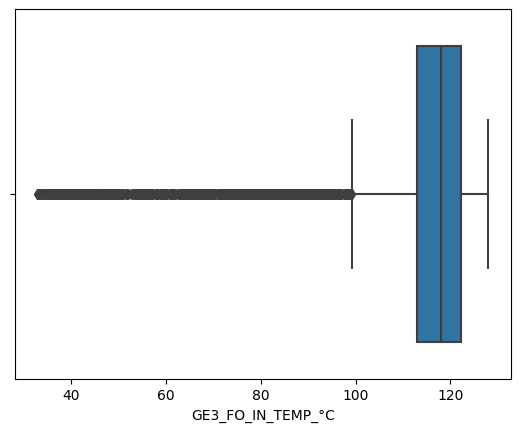

In [938]:
sns.boxplot(x=df["GE3_FO_IN_TEMP_°C"])

## 48.GE4_FO_IN_TEMP_°C

In [939]:
df["GE4_FO_IN_TEMP_°C"].describe()

count    43447.000000
mean       118.101044
std         21.292143
min         33.027350
25%        119.000000
50%        123.164020
75%        128.966685
max        132.444600
Name: GE4_FO_IN_TEMP_°C, dtype: float64

In [940]:
#zscore method
z_score=(df["GE4_FO_IN_TEMP_°C"]-df["GE4_FO_IN_TEMP_°C"].mean())/df["GE4_FO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


2608


<AxesSubplot: xlabel='GE4_FO_IN_TEMP_°C'>

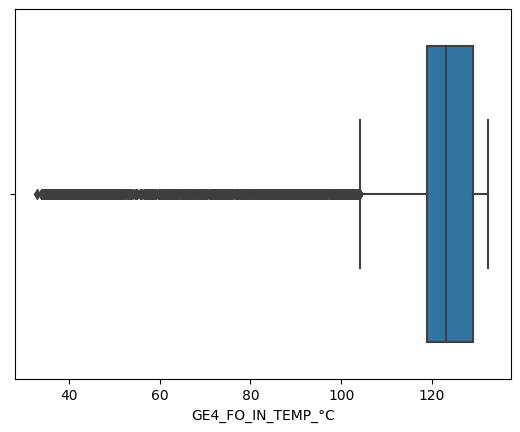

In [941]:
sns.boxplot(x=df["GE4_FO_IN_TEMP_°C"])

## 49.GE1_LO_IN_TEMP_°C

In [942]:
df["GE1_LO_IN_TEMP_°C"].describe()

count    43447.000000
mean        61.759230
std          8.521006
min         32.039040
25%         57.000000
50%         62.000000
75%         69.000000
max         74.054870
Name: GE1_LO_IN_TEMP_°C, dtype: float64

In [943]:
#zscore method
z_score=(df["GE1_LO_IN_TEMP_°C"]-df["GE1_LO_IN_TEMP_°C"].mean())/df["GE1_LO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


830


<AxesSubplot: xlabel='GE1_LO_IN_TEMP_°C'>

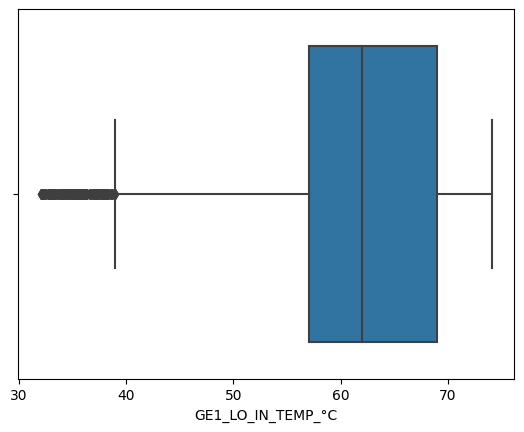

In [944]:
sns.boxplot(x=df["GE1_LO_IN_TEMP_°C"])

<AxesSubplot: xlabel='GE1_LO_IN_TEMP_°C'>

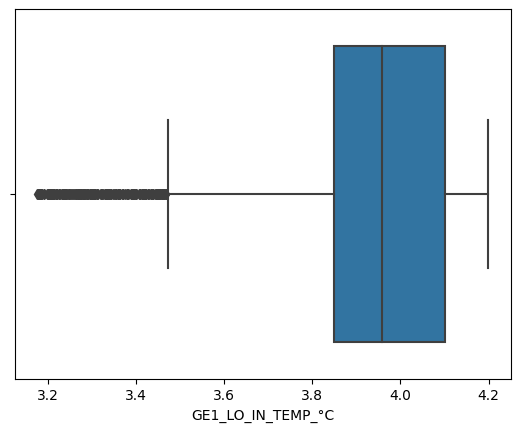

In [947]:
## log transform
sns.boxplot(x=np.cbrt(df["GE1_LO_IN_TEMP_°C"]))

<AxesSubplot: xlabel='GE1_LO_IN_TEMP_°C'>

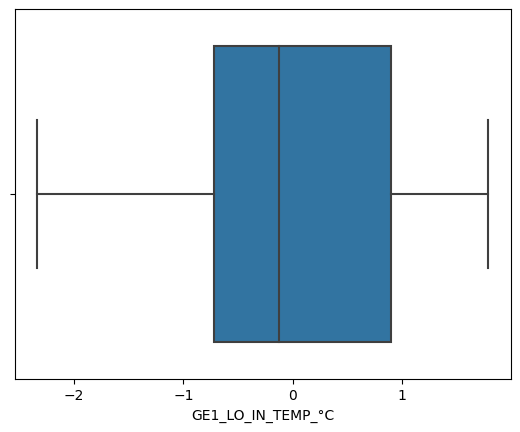

In [949]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
df["GE1_LO_IN_TEMP_°C"]=transformer.fit_transform(df[["GE1_LO_IN_TEMP_°C"]])
sns.boxplot(x=df["GE1_LO_IN_TEMP_°C"])

## 50.GE2_LO_IN_TEMP_°C

In [951]:
df["GE2_LO_IN_TEMP_°C"].describe()

count    43447.000000
mean        62.384298
std          4.597036
min         43.000000
25%         60.000000
50%         62.000000
75%         66.000000
max         74.000000
Name: GE2_LO_IN_TEMP_°C, dtype: float64

In [952]:
#zscore method
z_score=(df["GE2_LO_IN_TEMP_°C"]-df["GE2_LO_IN_TEMP_°C"].mean())/df["GE2_LO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


88


<AxesSubplot: xlabel='GE2_LO_IN_TEMP_°C'>

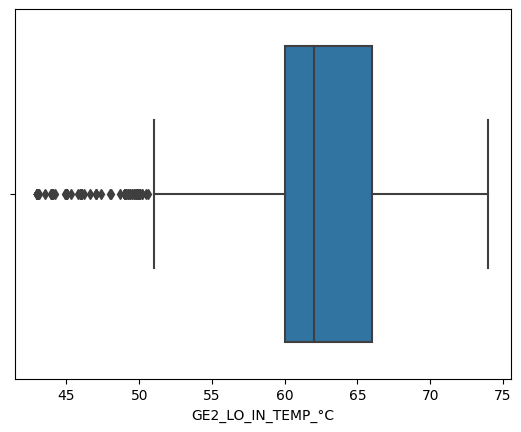

In [953]:
sns.boxplot(x=df["GE2_LO_IN_TEMP_°C"])

In [956]:
df["GE2_LO_IN_TEMP_°C"][outlier_index]=df["GE2_LO_IN_TEMP_°C"].median()

In [957]:
#zscore method
z_score=(df["GE2_LO_IN_TEMP_°C"]-df["GE2_LO_IN_TEMP_°C"].mean())/df["GE2_LO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 51.GE4_LO_IN_TEMP_°C

In [958]:
df["GE4_LO_IN_TEMP_°C"].describe()

count    43447.000000
mean        60.501471
std          5.417240
min         40.301180
25%         56.000000
50%         63.000000
75%         65.000000
max         71.765250
Name: GE4_LO_IN_TEMP_°C, dtype: float64

In [959]:
#zscore method
z_score=(df["GE4_LO_IN_TEMP_°C"]-df["GE4_LO_IN_TEMP_°C"].mean())/df["GE4_LO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


90


In [962]:
df["GE4_LO_IN_TEMP_°C"][outlier_index]=df["GE4_LO_IN_TEMP_°C"].mean()

In [963]:
#zscore method
z_score=(df["GE4_LO_IN_TEMP_°C"]-df["GE4_LO_IN_TEMP_°C"].mean())/df["GE4_LO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 52.GE1_HT_WATER_OUT_TEMP_°C

In [964]:
df["GE1_HT_WATER_OUT_TEMP_°C"].describe()

count    43447.000000
mean        72.762730
std          6.474709
min         33.993380
25%         72.752065
50%         74.811930
75%         76.000000
max         79.000000
Name: GE1_HT_WATER_OUT_TEMP_°C, dtype: float64

In [965]:
#zscore method
z_score=(df["GE1_HT_WATER_OUT_TEMP_°C"]-df["GE1_HT_WATER_OUT_TEMP_°C"].mean())/df["GE1_HT_WATER_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


1458


<AxesSubplot: xlabel='GE1_HT_WATER_OUT_TEMP_°C'>

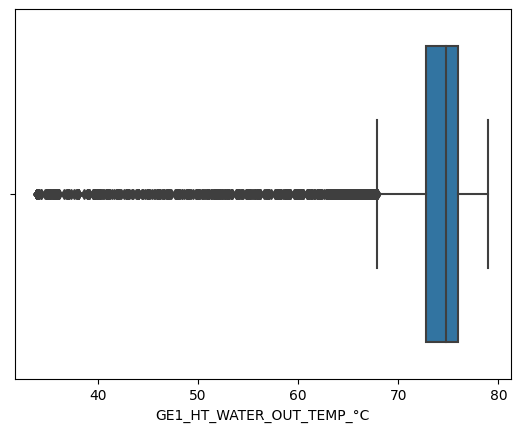

In [966]:
sns.boxplot(x=df["GE1_HT_WATER_OUT_TEMP_°C"])

## 53.GE2_HT_WATER_OUT_TEMP_°C

In [967]:
df["GE2_HT_WATER_OUT_TEMP_°C"].describe()

count    43447.000000
mean        70.720847
std          4.929181
min         42.590090
25%         69.129240
50%         69.700000
75%         74.000000
max         78.386380
Name: GE2_HT_WATER_OUT_TEMP_°C, dtype: float64

In [969]:
#zscore method
z_score=(df["GE2_HT_WATER_OUT_TEMP_°C"]-df["GE2_HT_WATER_OUT_TEMP_°C"].mean())/df["GE2_HT_WATER_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


1349


<AxesSubplot: xlabel='GE2_HT_WATER_OUT_TEMP_°C'>

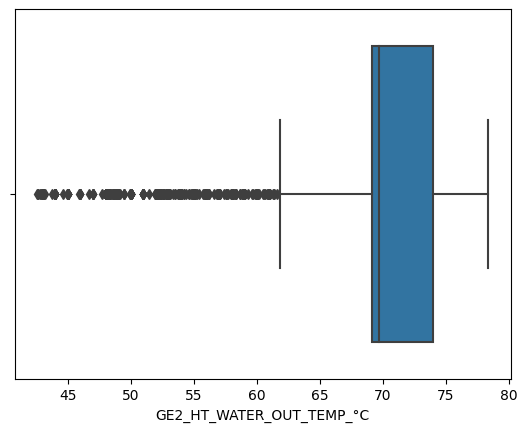

In [968]:
sns.boxplot(x=df["GE2_HT_WATER_OUT_TEMP_°C"])

## 54.GE3_HT_WATER_OUT_TEMP_°C

In [971]:
df["GE3_HT_WATER_OUT_TEMP_°C"].describe()

count    43447.000000
mean        69.438843
std          2.797009
min         61.000000
25%         67.510035
50%         68.165470
75%         72.000000
max         77.000000
Name: GE3_HT_WATER_OUT_TEMP_°C, dtype: float64

In [972]:
#zscore method
z_score=(df["GE3_HT_WATER_OUT_TEMP_°C"]-df["GE3_HT_WATER_OUT_TEMP_°C"].mean())/df["GE3_HT_WATER_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


1


In [973]:
df["GE3_HT_WATER_OUT_TEMP_°C"][outlier_index]=df["GE3_HT_WATER_OUT_TEMP_°C"].median()

In [974]:
#zscore method
z_score=(df["GE3_HT_WATER_OUT_TEMP_°C"]-df["GE3_HT_WATER_OUT_TEMP_°C"].mean())/df["GE3_HT_WATER_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 55.GE4_HT_WATER_OUT_TEMP_°C

In [999]:
df["GE4_HT_WATER_OUT_TEMP_°C"].describe()

count    43447.000000
mean        75.830160
std          0.757195
min         69.504910
25%         75.359770
50%         76.000000
75%         76.083375
max         80.797240
Name: GE4_HT_WATER_OUT_TEMP_°C, dtype: float64

In [1000]:
#zscore method
z_score=(df["GE4_HT_WATER_OUT_TEMP_°C"]-df["GE4_HT_WATER_OUT_TEMP_°C"].mean())/df["GE4_HT_WATER_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


239


<AxesSubplot: xlabel='GE4_HT_WATER_OUT_TEMP_°C'>

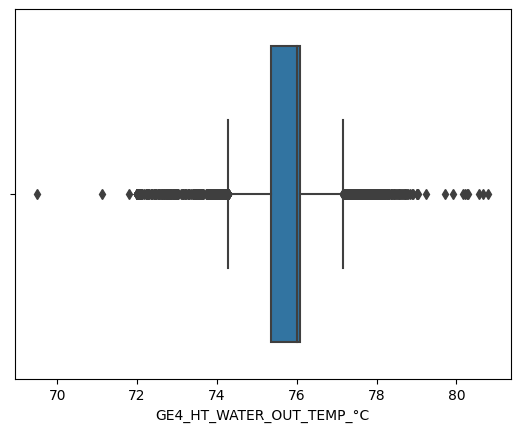

In [1001]:
sns.boxplot(x=df["GE4_HT_WATER_OUT_TEMP_°C"])

<AxesSubplot: >

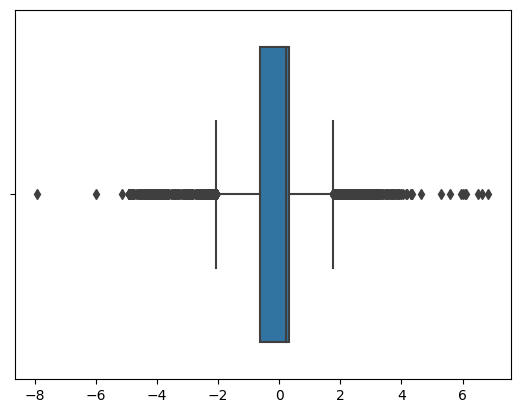

In [1002]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["GE4_HT_WATER_OUT_TEMP_°C"]])
sns.boxplot(x=data)

In [1003]:
## iqr method
q1=np.quantile(df["GE4_HT_WATER_OUT_TEMP_°C"],0.25)
q3=np.quantile(df["GE4_HT_WATER_OUT_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                         #tried with increasing quantile range
upper_tale=q3+1.5*iqr
index=np.where((df["GE4_HT_WATER_OUT_TEMP_°C"]<lower_tale)|(df["GE4_HT_WATER_OUT_TEMP_°C"]>upper_tale))  # to check No. outliers points
len(index[0])
df["GE4_HT_WATER_OUT_TEMP_°C"]=np.where(df["GE4_HT_WATER_OUT_TEMP_°C"]>upper_tale,upper_tale,df["GE4_HT_WATER_OUT_TEMP_°C"])
df["GE4_HT_WATER_OUT_TEMP_°C"]=np.where(df["GE4_HT_WATER_OUT_TEMP_°C"]<lower_tale,lower_tale,df["GE4_HT_WATER_OUT_TEMP_°C"])

<AxesSubplot: xlabel='GE4_HT_WATER_OUT_TEMP_°C'>

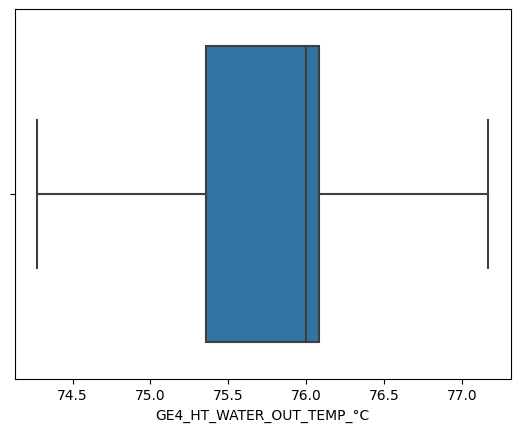

In [1004]:
sns.boxplot(x=df["GE4_HT_WATER_OUT_TEMP_°C"])

## 56.ME_CYL1_EXH_GAS_OUT_TEMP_°C

In [1005]:
df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       330.259630
std         16.253009
min        246.838300
25%        317.549695
50%        331.521380
75%        340.176430
max        392.239110
Name: ME_CYL1_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1006]:
#zscore method
z_score=(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


126


<AxesSubplot: xlabel='ME_CYL1_EXH_GAS_OUT_TEMP_°C'>

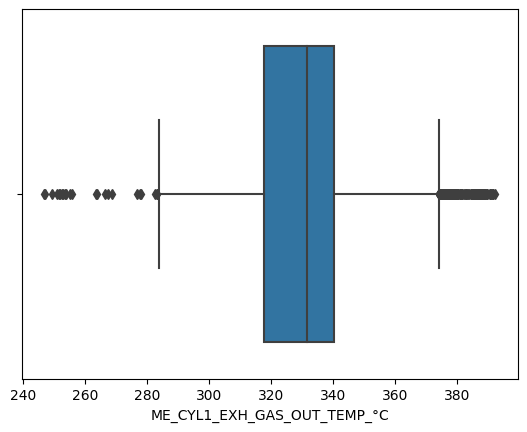

In [1007]:
sns.boxplot(x=df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"])

<AxesSubplot: >

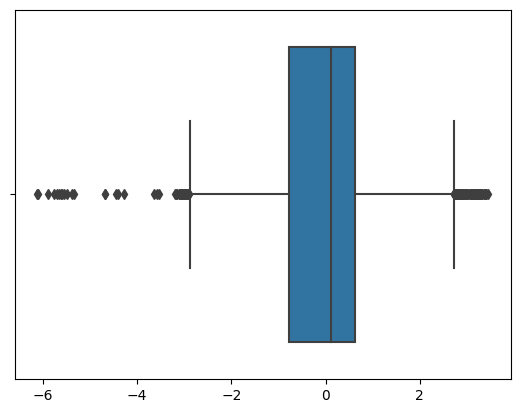

In [1008]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]])
sns.boxplot(x=data)

In [1009]:
## iqr method
q1=np.quantile(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"],0.25)
q3=np.quantile(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]<lower_tale)|(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]>upper_tale))  # to check No. outliers points
len(index[0])
df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]=np.where(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]>upper_tale,upper_tale,df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"])
df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]=np.where(df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"]<lower_tale,lower_tale,df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"])

<AxesSubplot: xlabel='ME_CYL1_EXH_GAS_OUT_TEMP_°C'>

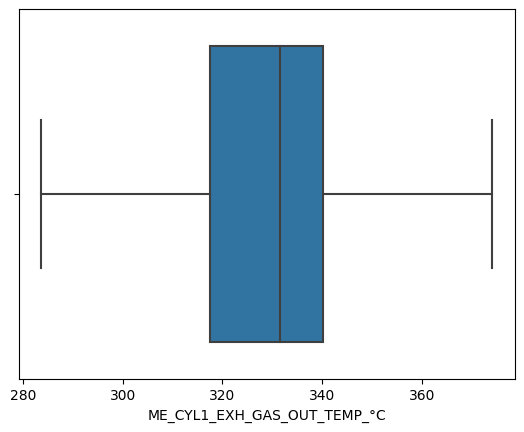

In [1010]:
sns.boxplot(x=df["ME_CYL1_EXH_GAS_OUT_TEMP_°C"])

## 57.ME_CYL1_EXH_GAS_DEV_TEMP_°C

In [1011]:
df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"].describe()

count    43447.000000
mean        -3.143983
std          5.838507
min        -23.542930
25%         -6.932625
50%         -3.564460
75%          1.145735
max         20.803140
Name: ME_CYL1_EXH_GAS_DEV_TEMP_°C, dtype: float64

In [1012]:
#zscore method
z_score=(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


34


<AxesSubplot: xlabel='ME_CYL1_EXH_GAS_DEV_TEMP_°C'>

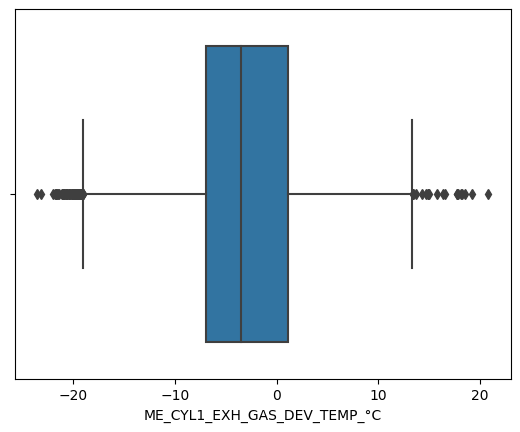

In [1013]:
sns.boxplot(x=df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"])

In [1014]:
## iqr method
q1=np.quantile(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"],0.25)
q3=np.quantile(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]<lower_tale)|(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]>upper_tale))  # to check No. outliers points
len(index[0])
df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]=np.where(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]>upper_tale,upper_tale,df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"])
df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]=np.where(df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"]<lower_tale,lower_tale,df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"])

<AxesSubplot: xlabel='ME_CYL1_EXH_GAS_DEV_TEMP_°C'>

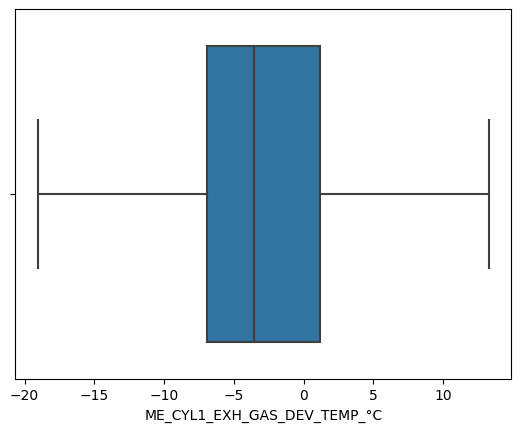

In [1015]:
sns.boxplot(x=df["ME_CYL1_EXH_GAS_DEV_TEMP_°C"])

## 58.ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C

In [1016]:
df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].describe()

count    43447.000000
mean       333.404367
std         16.826163
min        248.432290
25%        322.651450
50%        334.195370
75%        344.099465
max        390.700420
Name: ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C, dtype: float64

In [1017]:
#zscore method
z_score=(df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"]-df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].mean())/df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


22


In [1022]:
df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"][outlier_index]=df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].mean()

In [1363]:
#zscore method
z_score=(df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"]-df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].mean())/df["ME_CYL_EXH_GAS_OUT_MEAN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 59.ME_CYL2_EXH_GAS_OUT_TEMP_°C

In [1024]:
df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       323.156533
std         16.223560
min        240.155410
25%        314.033395
50%        323.707260
75%        333.705995
max        382.302560
Name: ME_CYL2_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1025]:
#zscore method
z_score=(df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


32


In [1028]:
df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"][outlier_index]=df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].median()

In [1029]:
#zscore method
z_score=(df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL2_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

0


## 60.ME_CYL2_EXH_GAS_DEV_TEMP_°C

In [1030]:
df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"].describe()

count    43447.000000
mean       -10.247016
std          4.921794
min        -27.279810
25%        -13.390850
50%         -9.834860
75%         -7.669705
max          9.638660
Name: ME_CYL2_EXH_GAS_DEV_TEMP_°C, dtype: float64

In [1031]:
#zscore method
z_score=(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


758


<AxesSubplot: xlabel='ME_CYL2_EXH_GAS_DEV_TEMP_°C'>

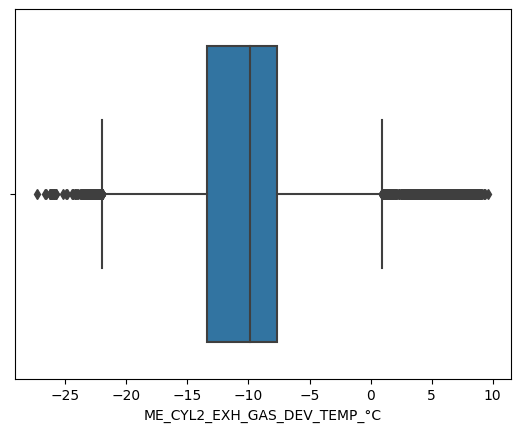

In [1032]:
sns.boxplot(x=df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"])

<AxesSubplot: >

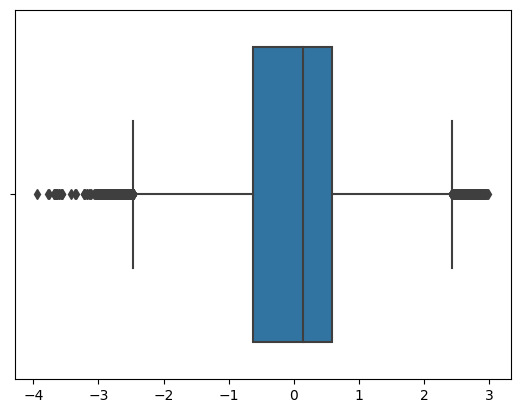

In [1033]:
## yeo-johnson transform
transformer=PowerTransformer(method="yeo-johnson")
data=transformer.fit_transform(df[["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]])
sns.boxplot(x=data)

In [1110]:
## iqr method
q1=np.quantile(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"],0.25)
q3=np.quantile(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-2*iqr                        # increased quantile range analysis with z-score
upper_tale=q3+2*iqr
index=np.where((df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]<lower_tale)|(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]>upper_tale))  # to check No. outliers points
len(index[0])
df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]=np.where(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]>upper_tale,upper_tale,df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"])
df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]=np.where(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]<lower_tale,lower_tale,df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"])

In [1039]:
#zscore method
z_score=(df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL2_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


20


## 61.ME_CYL3_EXH_GAS_OUT_TEMP_°C

In [1043]:
df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       331.969690
std         16.200220
min        249.024500
25%        321.502375
50%        333.207350
75%        341.795215
max        394.164960
Name: ME_CYL3_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1044]:
#zscore method
z_score=(df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


46


In [1045]:
df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"][outlier_index]=df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].median()

In [1052]:
#zscore method
z_score=(df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL3_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


0


## 62.ME_CYL3_EXH_GAS_DEV_TEMP_°C

In [1046]:
df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].describe()

count    43447.000000
mean        -1.503227
std          5.935299
min        -19.310730
25%         -5.654685
50%         -1.231500
75%          2.722025
max         16.715590
Name: ME_CYL3_EXH_GAS_DEV_TEMP_°C, dtype: float64

In [1047]:
#zscore method
z_score=(df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


41


In [1050]:
df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"][outlier_index]=df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].mean()

In [1051]:
#zscore method
z_score=(df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL3_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


5


## 63.ME_CYL4_EXH_GAS_OUT_TEMP_°C

In [1053]:
df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       339.164665
std         30.929118
min        234.832330
25%        313.710435
50%        338.648510
75%        366.481280
max        419.450350
Name: ME_CYL4_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1055]:
#zscore method
z_score=(df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


2


In [1056]:
df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"][outlier_index]=df["ME_CYL4_EXH_GAS_OUT_TEMP_°C"].mean()

## 64.ME_CYL5_EXH_GAS_OUT_TEMP_°C

In [1057]:
df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       328.807604
std         16.604700
min        250.296830
25%        317.216100
50%        326.929190
75%        340.555665
max        394.998180
Name: ME_CYL5_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1058]:
#zscore method
z_score=(df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


132


In [1059]:
df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"][outlier_index]=df["ME_CYL5_EXH_GAS_OUT_TEMP_°C"].mean()

## 65.ME_CYL5_EXH_GAS_DEV_TEMP_°C

In [1061]:
df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"].describe()

count    43447.000000
mean        -4.596112
std          6.531686
min        -21.220420
25%         -9.294235
50%         -4.758640
75%         -0.206860
max         18.792660
Name: ME_CYL5_EXH_GAS_DEV_TEMP_°C, dtype: float64

In [1062]:
#zscore method
z_score=(df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


168


In [1063]:
df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"][outlier_index]=df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"].mean()

## 66.ME_CYL6_EXH_GAS_OUT_TEMP_°C

In [1064]:
df["ME_CYL6_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       347.315114
std         16.649175
min        252.068550
25%        334.507940
50%        346.041470
75%        357.707550
max        406.469910
Name: ME_CYL6_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1065]:
#zscore method
z_score=(df["ME_CYL6_EXH_GAS_OUT_TEMP_°C"]-df["ME_CYL6_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_CYL6_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))


89


In [1066]:
df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"][outlier_index]=df["ME_CYL5_EXH_GAS_DEV_TEMP_°C"].median()

## 67.ME_CYL6_EXH_GAS_DEV_TEMP_°C

In [1067]:
df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"].describe()

count    43447.000000
mean        13.911529
std          8.378060
min         -9.905890
25%          7.487640
50%         15.347840
75%         20.049305
max         39.301340
Name: ME_CYL6_EXH_GAS_DEV_TEMP_°C, dtype: float64

In [1068]:
#zscore method
z_score=(df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"]-df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"].mean())/df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

2


In [1069]:
df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"][outlier_index]=df["ME_CYL6_EXH_GAS_DEV_TEMP_°C"].median()

## 68.ME_TC_EXH_GAS_IN_TEMP_°C

In [1070]:
df["ME_TC_EXH_GAS_IN_TEMP_°C"].describe()

count    43447.000000
mean       400.011820
std         22.336174
min        284.096450
25%        383.618355
50%        398.792120
75%        418.598755
max        467.224720
Name: ME_TC_EXH_GAS_IN_TEMP_°C, dtype: float64

In [1071]:
#zscore method
z_score=(df["ME_TC_EXH_GAS_IN_TEMP_°C"]-df["ME_TC_EXH_GAS_IN_TEMP_°C"].mean())/df["ME_TC_EXH_GAS_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

16


In [1072]:
df["ME_TC_EXH_GAS_IN_TEMP_°C"][outlier_index]=df["ME_TC_EXH_GAS_IN_TEMP_°C"].median()

## 69.ME_TC_EXH_GAS_OUT_TEMP_°C

In [1073]:
df["ME_TC_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       245.120967
std          6.456113
min        180.131310
25%        241.196085
50%        245.083090
75%        248.971940
max        275.672150
Name: ME_TC_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1074]:
#zscore method
z_score=(df["ME_TC_EXH_GAS_OUT_TEMP_°C"]-df["ME_TC_EXH_GAS_OUT_TEMP_°C"].mean())/df["ME_TC_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

614


<AxesSubplot: xlabel='ME_TC_EXH_GAS_OUT_TEMP_°C'>

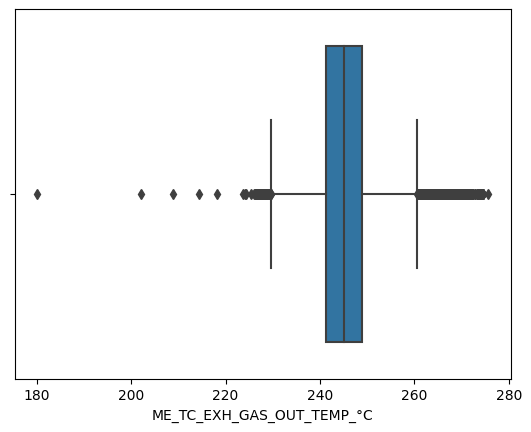

In [1075]:
sns.boxplot(x=df["ME_TC_EXH_GAS_OUT_TEMP_°C"])

In [1078]:
extreme_outliers_index=np.where(df["ME_TC_EXH_GAS_OUT_TEMP_°C"]<220)   # find extreme outliers
extreme_outliers_index

(array([34827, 34828, 34829, 34830, 34831], dtype=int64),)

In [1079]:
# Handle extreme outliers
df["ME_TC_EXH_GAS_OUT_TEMP_°C"][extreme_outliers_index]=df["ME_TC_EXH_GAS_OUT_TEMP_°C"].median()  

<AxesSubplot: xlabel='ME_TC_EXH_GAS_OUT_TEMP_°C'>

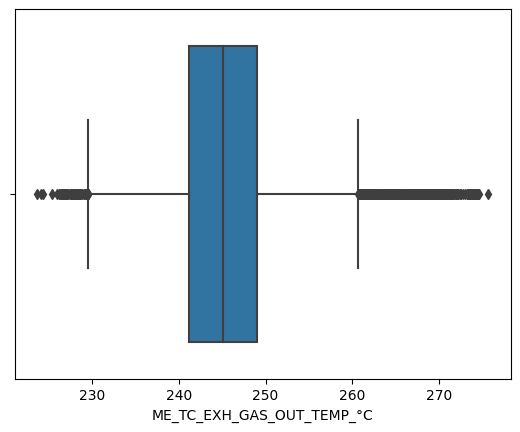

In [1080]:
sns.boxplot(x=df["ME_TC_EXH_GAS_OUT_TEMP_°C"])

<AxesSubplot: >

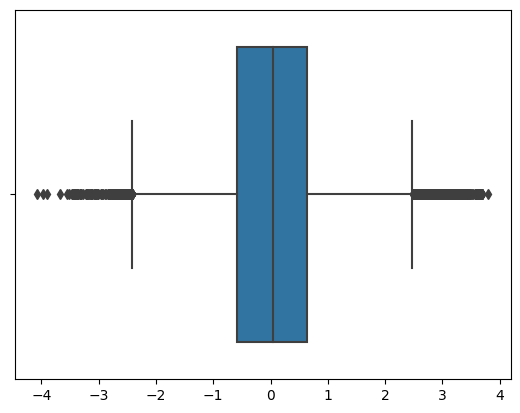

In [1081]:
## Box-cox transform
transformer=PowerTransformer(method="yeo-johnson")
data=transformer.fit_transform(df[["ME_TC_EXH_GAS_OUT_TEMP_°C"]])
sns.boxplot(x=data)

## 70.ME_SCAV_AIR_RECEIVER_PRESS_bar

In [1082]:
df["ME_SCAV_AIR_RECEIVER_PRESS_bar"].describe()

count    43447.000000
mean         1.711018
std          0.355238
min          0.454200
25%          1.444385
50%          1.773080
75%          1.976540
max          2.555420
Name: ME_SCAV_AIR_RECEIVER_PRESS_bar, dtype: float64

In [1083]:
#zscore method
z_score=(df["ME_SCAV_AIR_RECEIVER_PRESS_bar"]-df["ME_SCAV_AIR_RECEIVER_PRESS_bar"].mean())/df["ME_SCAV_AIR_RECEIVER_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

19


In [1087]:
df["ME_SCAV_AIR_RECEIVER_PRESS_bar"][outlier_index]=df["ME_SCAV_AIR_RECEIVER_PRESS_bar"].median()

## 71.ME_CYL3_SCAV_AIR_FIRE_TEMP_°C

In [1085]:
df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].describe()

count    43447.000000
mean        51.492489
std          3.690228
min         44.372140
25%         48.627535
50%         50.318090
75%         54.090835
max         62.982920
Name: ME_CYL3_SCAV_AIR_FIRE_TEMP_°C, dtype: float64

In [1086]:
#zscore method
z_score=(df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"]-df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].mean())/df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

4


In [1089]:
df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"][outlier_index]=df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].median()

In [1090]:
#zscore method
z_score=(df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"]-df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].mean())/df["ME_CYL3_SCAV_AIR_FIRE_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

0


## 72.ME_CYL4_SCAV_AIR_FIRE_TEMP_°C

In [1091]:
df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"].describe()

count    43447.000000
mean        58.512688
std          8.707499
min         45.488620
25%         51.276730
50%         54.927020
75%         64.657185
max         87.197480
Name: ME_CYL4_SCAV_AIR_FIRE_TEMP_°C, dtype: float64

In [1092]:
#zscore method
z_score=(df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"]-df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"].mean())/df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

14


In [1093]:
df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"][outlier_index]=df["ME_CYL4_SCAV_AIR_FIRE_TEMP_°C"].median()

## 73. ME_CYL5_SCAV_AIR_FIRE_TEMP_°C

In [1095]:
df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"].describe()

count    43447.000000
mean        54.190306
std          3.682723
min         46.188540
25%         51.461660
50%         53.135440
75%         56.783075
max         66.478710
Name: ME_CYL5_SCAV_AIR_FIRE_TEMP_°C, dtype: float64

In [1096]:
#zscore method
z_score=(df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"]-df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"].mean())/df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

120


In [1097]:
df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"][outlier_index]=df["ME_CYL5_SCAV_AIR_FIRE_TEMP_°C"].median()

## 74.ME_CYL6_SCAV_AIR_FIRE_TEMP_°C,

In [1098]:
df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"].describe()

count    43447.000000
mean        58.752963
std          3.294634
min         49.024100
25%         56.330750
50%         58.072590
75%         61.396890
max         69.270250
Name: ME_CYL6_SCAV_AIR_FIRE_TEMP_°C, dtype: float64

In [1099]:
#zscore method
z_score=(df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"]-df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"].mean())/df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

66


In [1100]:
df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"][outlier_index]=df["ME_CYL6_SCAV_AIR_FIRE_TEMP_°C"].median()

## 75.LAT_DEG_MIN_degree

In [1101]:
df["LAT_DEG_MIN_degree"].describe()

count    43447.000000
mean        15.296431
std         11.377564
min          0.000000
25%          5.550000
50%         12.340000
75%         22.390000
max         52.270000
Name: LAT_DEG_MIN_degree, dtype: float64

In [1102]:
#zscore method
z_score=(df["LAT_DEG_MIN_degree"]-df["LAT_DEG_MIN_degree"].mean())/df["LAT_DEG_MIN_degree"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

469


<AxesSubplot: xlabel='LAT_DEG_MIN_degree'>

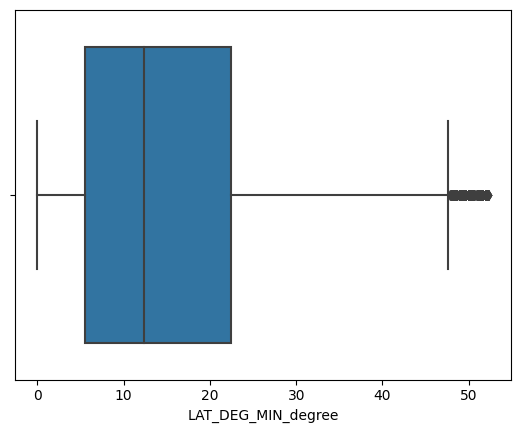

In [1103]:
sns.boxplot(x=df["LAT_DEG_MIN_degree"])

In [1111]:
## ## iqr method
q1=np.quantile(df["LAT_DEG_MIN_degree"],0.25)
q3=np.quantile(df["LAT_DEG_MIN_degree"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["LAT_DEG_MIN_degree"]<lower_tale)|(df["LAT_DEG_MIN_degree"]>upper_tale))  # to check No. outliers points
len(index[0])
df["LAT_DEG_MIN_degree"]=np.where(df["LAT_DEG_MIN_degree"]>upper_tale,upper_tale,df["LAT_DEG_MIN_degree"])


<AxesSubplot: xlabel='LAT_DEG_MIN_degree'>

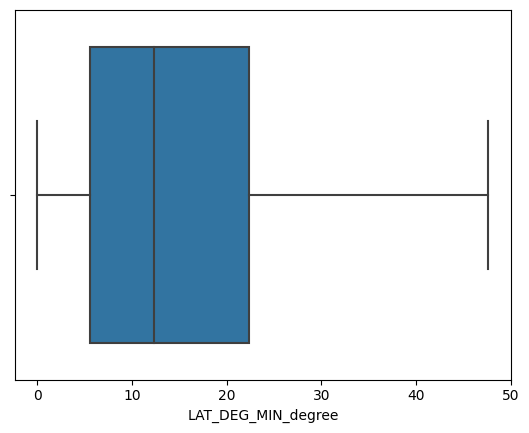

In [1112]:
sns.boxplot(x=df["LAT_DEG_MIN_degree"])

## 76.ME_TC_RPM_RPM

In [1113]:
df["ME_TC_RPM_RPM"].describe()

count    43447.000000
mean     11614.061784
std        947.024657
min       6658.335340
25%      11009.505785
50%      11854.792830
75%      12282.978855
max      13440.322550
Name: ME_TC_RPM_RPM, dtype: float64

In [1114]:
#zscore method
z_score=(df["ME_TC_RPM_RPM"]-df["ME_TC_RPM_RPM"].mean())/df["ME_TC_RPM_RPM"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

246


<AxesSubplot: xlabel='ME_TC_RPM_RPM'>

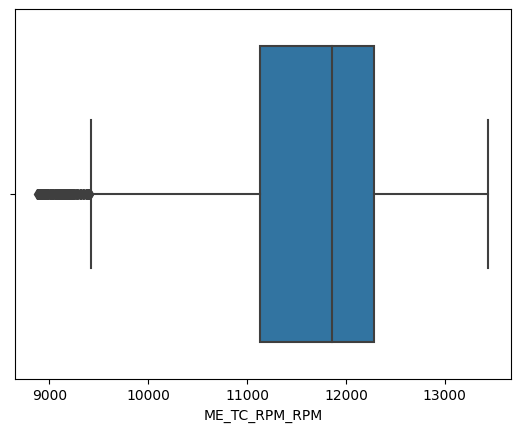

In [1119]:
sns.boxplot(x=df["ME_TC_RPM_RPM"])

In [1121]:
## ## iqr method
q1=np.quantile(df["ME_TC_RPM_RPM"],0.25)
q3=np.quantile(df["ME_TC_RPM_RPM"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["ME_TC_RPM_RPM"]<lower_tale)|(df["ME_TC_RPM_RPM"]>upper_tale))  # to check No. outliers points
len(index[0])
df["ME_TC_RPM_RPM"]=np.where(df["ME_TC_RPM_RPM"]<lower_tale,lower_tale,df["ME_TC_RPM_RPM"])


<AxesSubplot: xlabel='ME_TC_RPM_RPM'>

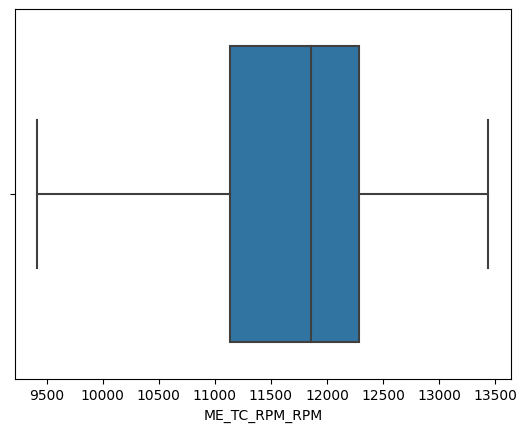

In [1148]:
sns.boxplot(x=df["ME_TC_RPM_RPM"])

## 77.AUX_BL_EXH_GAS_OUT_TEMP_°C

In [1123]:
df["AUX_BL_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       100.372607
std         12.169923
min         49.983180
25%         95.349130
50%         98.327420
75%        101.600000
max        190.167200
Name: AUX_BL_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1124]:
#zscore method
z_score=(df["AUX_BL_EXH_GAS_OUT_TEMP_°C"]-df["AUX_BL_EXH_GAS_OUT_TEMP_°C"].mean())/df["AUX_BL_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1660


<AxesSubplot: xlabel='AUX_BL_EXH_GAS_OUT_TEMP_°C'>

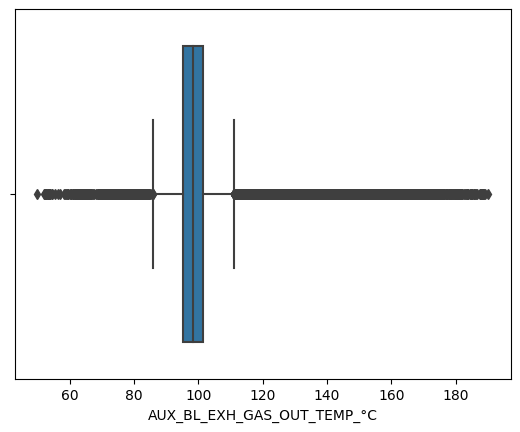

In [1125]:
sns.boxplot(x=df["AUX_BL_EXH_GAS_OUT_TEMP_°C"])

<AxesSubplot: xlabel='AUX_BL_EXH_GAS_OUT_TEMP_°C'>

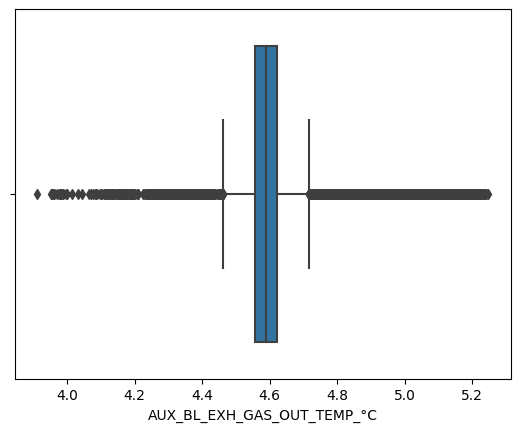

In [1126]:
sns.boxplot(x=np.log(df["AUX_BL_EXH_GAS_OUT_TEMP_°C"]))

<AxesSubplot: >

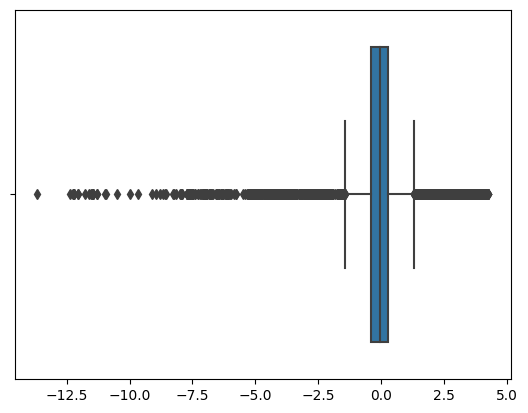

In [1127]:
## Box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["AUX_BL_EXH_GAS_OUT_TEMP_°C"]])
sns.boxplot(x=data)

## 78. AUX_BL_FO_FLOW_l/h

In [1132]:
df["AUX_BL_FO_FLOW_l/h"].describe()

count    43447.000000
mean         1.262216
std         24.385479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        732.005000
Name: AUX_BL_FO_FLOW_l/h, dtype: float64

In [1134]:
#zscore method
z_score=(df["AUX_BL_FO_FLOW_l/h"]-df["AUX_BL_FO_FLOW_l/h"].mean())/df["AUX_BL_FO_FLOW_l/h"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

137


<AxesSubplot: xlabel='AUX_BL_FO_FLOW_l/h'>

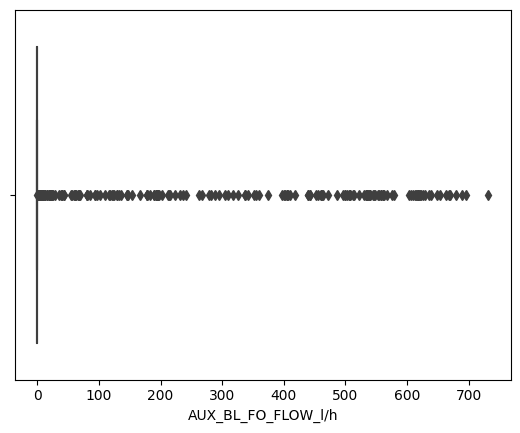

In [1133]:
sns.boxplot(x=df["AUX_BL_FO_FLOW_l/h"])

In [ ]:
# need deep Analysis of Data

## 79.AUX_BL_STEAM_PRESS_bar

In [1135]:
df["AUX_BL_STEAM_PRESS_bar"].describe()

count    43447.000000
mean         2.433226
std          0.710167
min         -0.110000
25%          1.877965
50%          2.420000
75%          2.700825
max          7.279630
Name: AUX_BL_STEAM_PRESS_bar, dtype: float64

In [1136]:
#zscore method
z_score=(df["AUX_BL_STEAM_PRESS_bar"]-df["AUX_BL_STEAM_PRESS_bar"].mean())/df["AUX_BL_STEAM_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1398


<AxesSubplot: xlabel='AUX_BL_STEAM_PRESS_bar'>

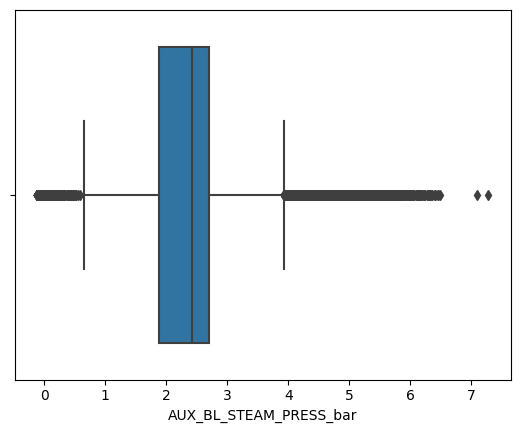

In [1137]:
sns.boxplot(x=df["AUX_BL_STEAM_PRESS_bar"])

## 80.AUX_BL_FO_TEMP_°C

In [1138]:
df["AUX_BL_FO_TEMP_°C"].describe()

count    43447.000000
mean        38.968237
std          2.646423
min         26.800000
25%         37.600000
50%         39.300000
75%         40.800000
max         44.978510
Name: AUX_BL_FO_TEMP_°C, dtype: float64

In [1139]:
#zscore method
z_score=(df["AUX_BL_FO_TEMP_°C"]-df["AUX_BL_FO_TEMP_°C"].mean())/df["AUX_BL_FO_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

751


<AxesSubplot: xlabel='AUX_BL_FO_TEMP_°C'>

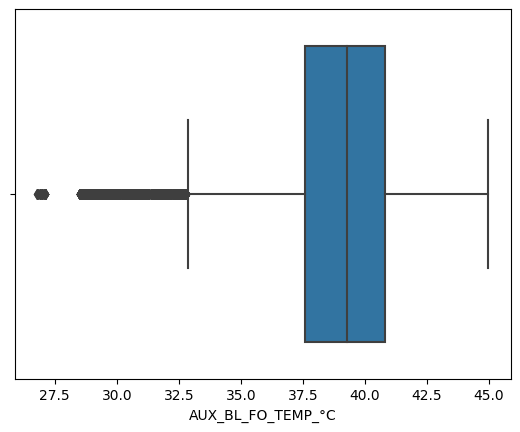

In [1140]:
sns.boxplot(x=df["AUX_BL_FO_TEMP_°C"])

In [1147]:
## ## iqr method
q1=np.quantile(df["AUX_BL_FO_TEMP_°C"],0.25)
q3=np.quantile(df["AUX_BL_FO_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["AUX_BL_FO_TEMP_°C"]<lower_tale))  # to check No. outliers points
len(index[0])
df["AUX_BL_FO_TEMP_°C"]=np.where(df["AUX_BL_FO_TEMP_°C"]<lower_tale,lower_tale,df["AUX_BL_FO_TEMP_°C"])


<AxesSubplot: xlabel='AUX_BL_FO_TEMP_°C'>

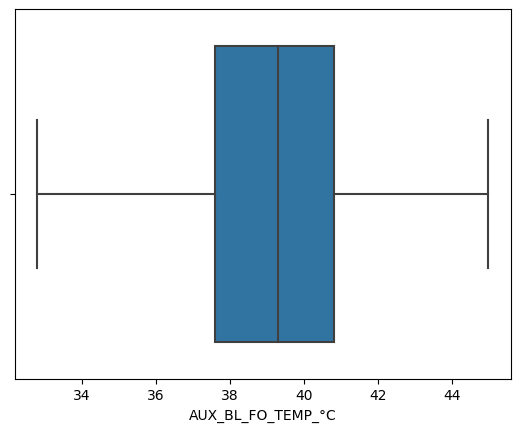

In [1189]:
sns.boxplot(x=df["AUX_BL_FO_TEMP_°C"])

## 81.AUX_BL_FO_IN_PRESS_bar

In [1150]:
df["AUX_BL_FO_IN_PRESS_bar"].describe()

count    43447.000000
mean         0.841451
std          0.734008
min          0.622990
25%          0.764125
50%          0.814250
75%          0.837700
max         18.271470
Name: AUX_BL_FO_IN_PRESS_bar, dtype: float64

In [1156]:
np.quantile(df["AUX_BL_FO_IN_PRESS_bar"],0.99)

0.8815316

In [1157]:
#zscore method
z_score=(df["AUX_BL_FO_IN_PRESS_bar"]-df["AUX_BL_FO_IN_PRESS_bar"].mean())/df["AUX_BL_FO_IN_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

172


<AxesSubplot: xlabel='AUX_BL_FO_IN_PRESS_bar'>

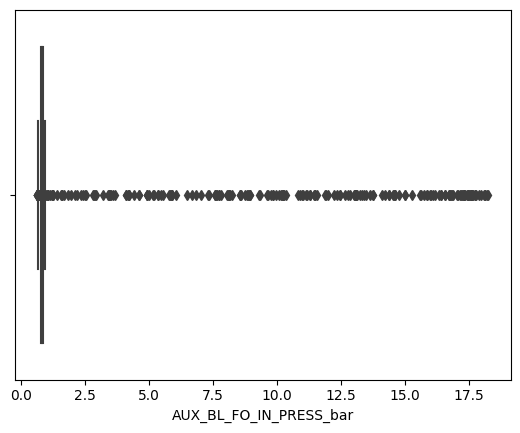

In [1151]:
sns.boxplot(x=df["AUX_BL_FO_IN_PRESS_bar"])

In [ ]:
## Need Deep Analysis

## 82.AUX_BL_STOP

In [1158]:
df["AUX_BL_STOP"].describe()

count    43447.000000
mean         0.004465
std          0.066674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: AUX_BL_STOP, dtype: float64

In [1159]:
df["AUX_BL_STOP"].value_counts()

AUX_BL_STOP
0    43253
1      194
Name: count, dtype: int64

## 83.COMP_BL_EXH_GAS_OUT_TEMP_°C

In [1160]:
df["COMP_BL_EXH_GAS_OUT_TEMP_°C"].describe()

count    43447.000000
mean       185.424121
std         33.466998
min         80.458520
25%        158.441955
50%        179.015820
75%        214.863275
max        305.477860
Name: COMP_BL_EXH_GAS_OUT_TEMP_°C, dtype: float64

In [1161]:
#zscore method
z_score=(df["COMP_BL_EXH_GAS_OUT_TEMP_°C"]-df["COMP_BL_EXH_GAS_OUT_TEMP_°C"].mean())/df["COMP_BL_EXH_GAS_OUT_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

3


In [1163]:
df["COMP_BL_EXH_GAS_OUT_TEMP_°C"][outlier_index]=df["COMP_BL_EXH_GAS_OUT_TEMP_°C"].median()

## 84.COMP_BL_FO_FLOW_l/h

In [1164]:
df["COMP_BL_FO_FLOW_l/h"].describe()

count    43447.000000
mean        30.263644
std         51.280257
min          0.000000
25%          0.000000
50%          0.000000
75%         80.163140
max        768.884310
Name: COMP_BL_FO_FLOW_l/h, dtype: float64

<AxesSubplot: xlabel='COMP_BL_FO_FLOW_l/h'>

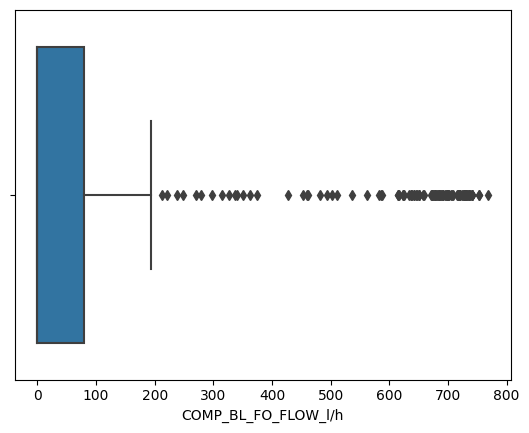

In [1364]:
sns.boxplot(x=df["COMP_BL_FO_FLOW_l/h"])

<AxesSubplot: xlabel='COMP_BL_FO_FLOW_l/h'>

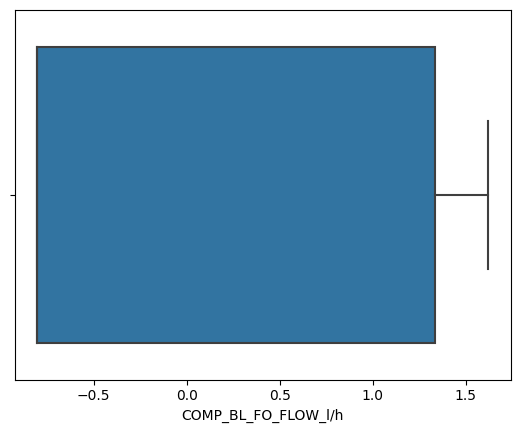

In [1368]:
# box-cox transformer
transformer=PowerTransformer(method="yeo-johnson")
df["COMP_BL_FO_FLOW_l/h"]=transformer.fit_transform(df[["COMP_BL_FO_FLOW_l/h"]])
sns.boxplot(x=df["COMP_BL_FO_FLOW_l/h"])

## 85.COMP_BL_DRUM_LEVEL_mm

In [1167]:
df["COMP_BL_DRUM_LEVEL_mm"].describe()

count    43447.000000
mean         5.753164
std          4.832550
min        -68.086230
25%          1.991335
50%          8.328650
75%          8.991715
max         84.237040
Name: COMP_BL_DRUM_LEVEL_mm, dtype: float64

<AxesSubplot: xlabel='COMP_BL_DRUM_LEVEL_mm'>

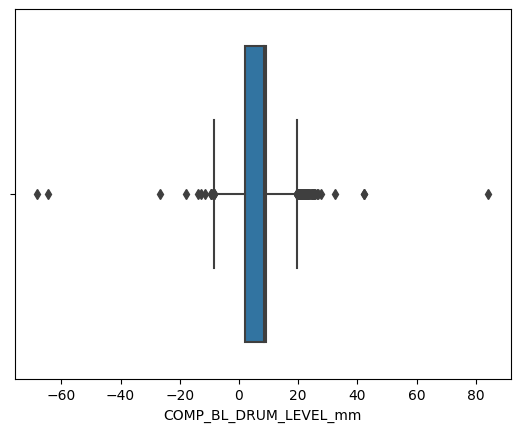

In [1168]:
sns.boxplot(x=df["COMP_BL_DRUM_LEVEL_mm"])

In [1179]:
## iqr method   - Handle extreme outliers
q1=np.quantile(df["COMP_BL_DRUM_LEVEL_mm"],0.25)
q3=np.quantile(df["COMP_BL_DRUM_LEVEL_mm"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["COMP_BL_DRUM_LEVEL_mm"]<-10)|(df["COMP_BL_DRUM_LEVEL_mm"]>25))  # to check No. outliers points
len(index[0])
df["COMP_BL_DRUM_LEVEL_mm"][index]=df["COMP_BL_DRUM_LEVEL_mm"].median()

<AxesSubplot: xlabel='COMP_BL_DRUM_LEVEL_mm'>

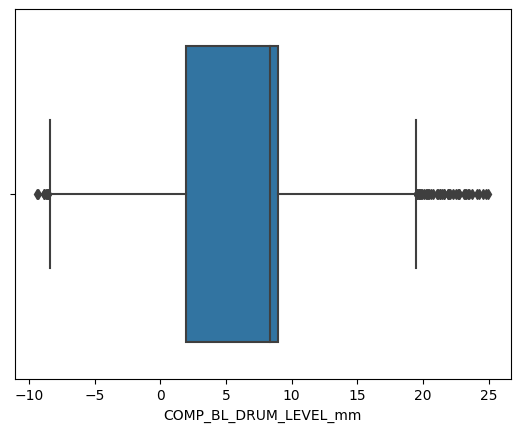

In [1180]:
sns.boxplot(x=df["COMP_BL_DRUM_LEVEL_mm"])

## 86.COMP_BL_STEAM_PRESS_bar

In [1181]:
df["COMP_BL_STEAM_PRESS_bar"].describe()

count    43447.000000
mean         4.841069
std          0.611561
min          2.859690
25%          4.360500
50%          4.690890
75%          5.269640
max          7.334780
Name: COMP_BL_STEAM_PRESS_bar, dtype: float64

<AxesSubplot: xlabel='COMP_BL_STEAM_PRESS_bar'>

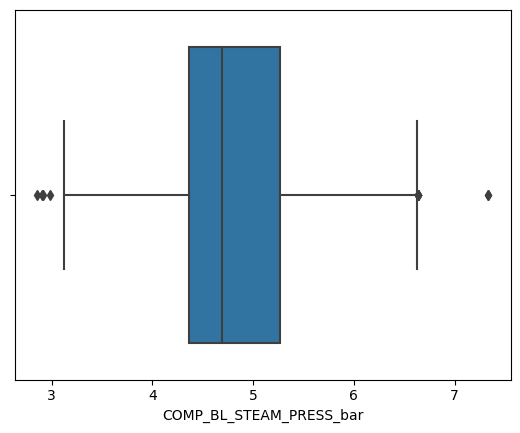

In [1182]:
sns.boxplot(x=df["COMP_BL_STEAM_PRESS_bar"])

In [1187]:
## iqr method  
q1=np.quantile(df["COMP_BL_STEAM_PRESS_bar"],0.25)
q3=np.quantile(df["COMP_BL_STEAM_PRESS_bar"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["COMP_BL_STEAM_PRESS_bar"]<lower_tale)|(df["COMP_BL_STEAM_PRESS_bar"]>upper_tale))  # to check No. outliers points
len(index[0])
df["COMP_BL_STEAM_PRESS_bar"]=np.where(df["COMP_BL_STEAM_PRESS_bar"]<lower_tale,lower_tale,df["COMP_BL_STEAM_PRESS_bar"])
df["COMP_BL_STEAM_PRESS_bar"]=np.where(df["COMP_BL_STEAM_PRESS_bar"]>upper_tale,upper_tale,df["COMP_BL_STEAM_PRESS_bar"])

<AxesSubplot: xlabel='COMP_BL_STEAM_PRESS_bar'>

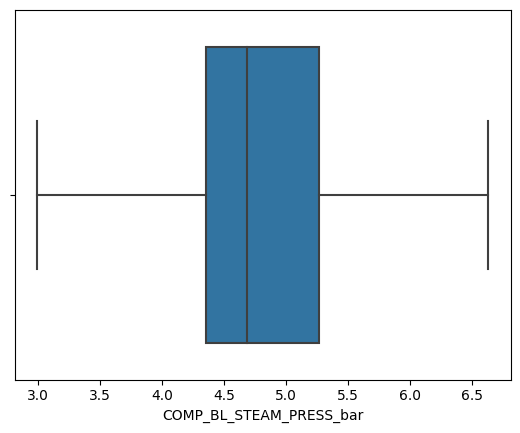

In [1188]:
sns.boxplot(x=df["COMP_BL_STEAM_PRESS_bar"])

## 87.COMP_BL_FO_IN_TEMP_°C

In [1190]:
df["COMP_BL_FO_IN_TEMP_°C"].describe()

count    43447.000000
mean        41.896097
std          2.391264
min         32.008130
25%         40.557600
50%         42.200000
75%         43.500000
max         48.100000
Name: COMP_BL_FO_IN_TEMP_°C, dtype: float64

In [1191]:
#zscore method
z_score=(df["COMP_BL_FO_IN_TEMP_°C"]-df["COMP_BL_FO_IN_TEMP_°C"].mean())/df["COMP_BL_FO_IN_TEMP_°C"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

399


<AxesSubplot: xlabel='COMP_BL_FO_IN_TEMP_°C'>

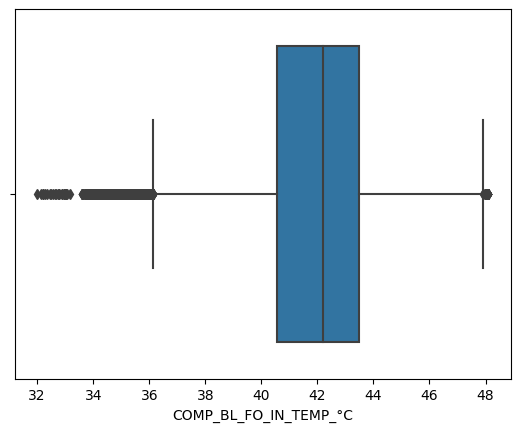

In [1192]:
sns.boxplot(x=df["COMP_BL_FO_IN_TEMP_°C"])

In [1193]:
## iqr method  
q1=np.quantile(df["COMP_BL_FO_IN_TEMP_°C"],0.25)
q3=np.quantile(df["COMP_BL_FO_IN_TEMP_°C"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["COMP_BL_FO_IN_TEMP_°C"]<lower_tale)|(df["COMP_BL_FO_IN_TEMP_°C"]>upper_tale))  # to check No. outliers points
len(index[0])
df["COMP_BL_FO_IN_TEMP_°C"]=np.where(df["COMP_BL_FO_IN_TEMP_°C"]<lower_tale,lower_tale,df["COMP_BL_FO_IN_TEMP_°C"])
df["COMP_BL_FO_IN_TEMP_°C"]=np.where(df["COMP_BL_FO_IN_TEMP_°C"]>upper_tale,upper_tale,df["COMP_BL_FO_IN_TEMP_°C"])

<AxesSubplot: xlabel='COMP_BL_FO_IN_TEMP_°C'>

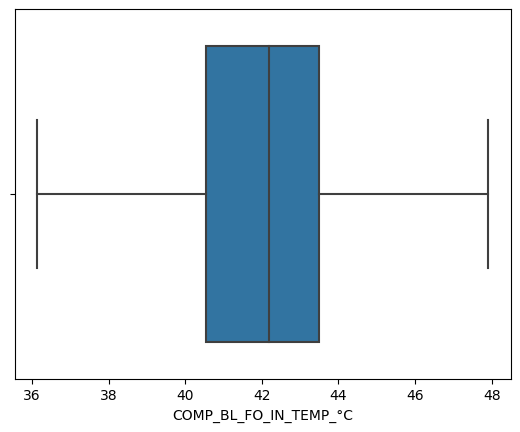

In [1194]:
sns.boxplot(x=df["COMP_BL_FO_IN_TEMP_°C"])

## 88.START_AIR_PRESS_bar

In [1195]:
df["START_AIR_PRESS_bar"].describe()

count    43447.000000
mean        25.757725
std          1.299404
min         21.567220
25%         24.676405
50%         25.673660
75%         26.778255
max         29.210130
Name: START_AIR_PRESS_bar, dtype: float64

In [1196]:
#zscore method
z_score=(df["START_AIR_PRESS_bar"]-df["START_AIR_PRESS_bar"].mean())/df["START_AIR_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

4


In [1197]:
df["START_AIR_PRESS_bar"][outlier_index]=df["START_AIR_PRESS_bar"].median()

In [1198]:
#zscore method
z_score=(df["START_AIR_PRESS_bar"]-df["START_AIR_PRESS_bar"].mean())/df["START_AIR_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

0


## 89.CONTROL_AIR_PRESS_bar

In [1199]:
df["CONTROL_AIR_PRESS_bar"].describe()

count    43447.000000
mean         6.408472
std          0.053354
min          6.295110
25%          6.380000
50%          6.400000
75%          6.420000
max          6.770000
Name: CONTROL_AIR_PRESS_bar, dtype: float64

In [1200]:
#zscore method
z_score=(df["CONTROL_AIR_PRESS_bar"]-df["CONTROL_AIR_PRESS_bar"].mean())/df["CONTROL_AIR_PRESS_bar"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1447


<AxesSubplot: xlabel='CONTROL_AIR_PRESS_bar'>

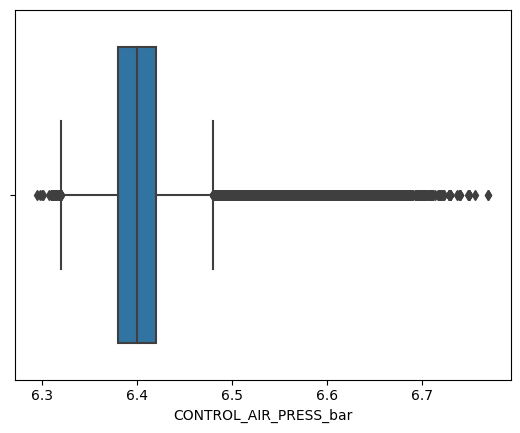

In [1201]:
sns.boxplot(x=df["CONTROL_AIR_PRESS_bar"])

## 90.WIND_SPEED_m/s

In [1202]:
df["WIND_SPEED_m/s"].describe()

count    43447.000000
mean        16.351737
std          9.671049
min          0.000000
25%          8.800920
50%         15.801830
75%         23.555320
max         64.100000
Name: WIND_SPEED_m/s, dtype: float64

<AxesSubplot: xlabel='WIND_SPEED_m/s'>

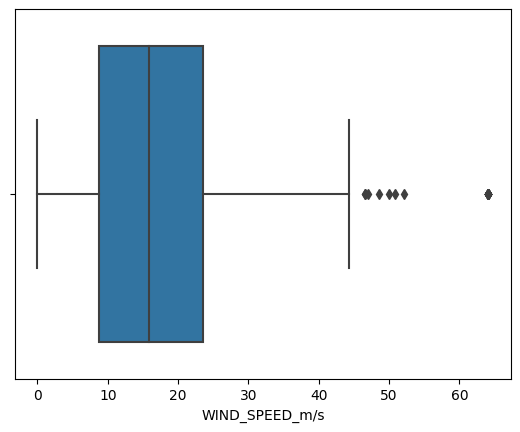

In [1203]:
sns.boxplot(x=df["WIND_SPEED_m/s"])

In [1204]:
## iqr method  
q1=np.quantile(df["WIND_SPEED_m/s"],0.25)
q3=np.quantile(df["WIND_SPEED_m/s"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["WIND_SPEED_m/s"]<lower_tale)|(df["WIND_SPEED_m/s"]>upper_tale))  # to check No. outliers points
len(index[0])
df["WIND_SPEED_m/s"]=np.where(df["WIND_SPEED_m/s"]>upper_tale,upper_tale,df["WIND_SPEED_m/s"])

<AxesSubplot: xlabel='WIND_SPEED_m/s'>

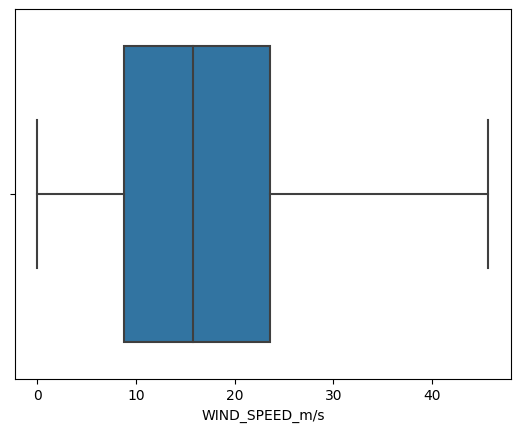

In [1205]:
sns.boxplot(x=df["WIND_SPEED_m/s"])

## 91.SHIP_SPEED_(WATER)_knots

In [1206]:
df["SHIP_SPEED_(WATER)_knots"].describe()

count    43447.000000
mean        11.676631
std          0.589845
min          3.970270
25%         11.284015
50%         11.664270
75%         12.008740
max         17.430300
Name: SHIP_SPEED_(WATER)_knots, dtype: float64

<AxesSubplot: xlabel='SHIP_SPEED_(WATER)_knots'>

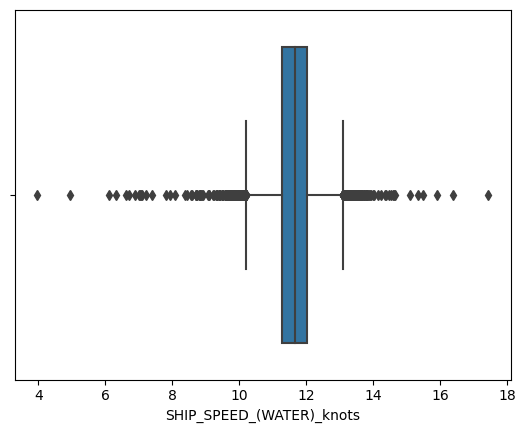

In [1207]:
sns.boxplot(x=df["SHIP_SPEED_(WATER)_knots"])

## 92.SHIP_SPEED_(GROUND)_knots

In [1208]:
df["SHIP_SPEED_(GROUND)_knots"].describe()

count    43447.000000
mean        11.827925
std          0.758903
min          9.023040
25%         11.300000
50%         11.830490
75%         12.232720
max         15.906720
Name: SHIP_SPEED_(GROUND)_knots, dtype: float64

In [1369]:
#zscore method
z_score=(df["SHIP_SPEED_(GROUND)_knots"]-df["SHIP_SPEED_(GROUND)_knots"].mean())/df["SHIP_SPEED_(GROUND)_knots"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

252


<AxesSubplot: xlabel='SHIP_SPEED_(GROUND)_knots'>

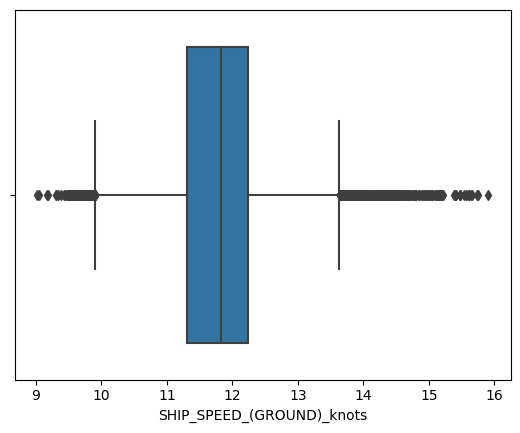

In [1209]:
sns.boxplot(x=df["SHIP_SPEED_(GROUND)_knots"])

<AxesSubplot: >

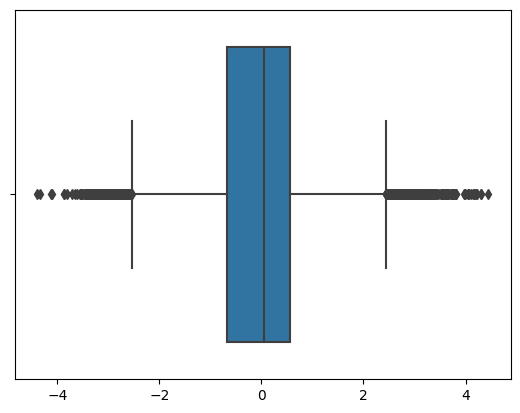

In [1370]:
# box-cox transformer
transformer=PowerTransformer(method="yeo-johnson")
data=transformer.fit_transform(df[["SHIP_SPEED_(GROUND)_knots"]])
sns.boxplot(x=data)

## 93.MID_S_DRAFT_m

In [1210]:
df["MID_S_DRAFT_m"].describe()

count    43447.000000
mean        11.981634
std          2.179767
min          5.310680
25%         11.803280
50%         12.275570
75%         13.746025
max         15.118480
Name: MID_S_DRAFT_m, dtype: float64

In [1211]:
#zscore method
z_score=(df["MID_S_DRAFT_m"]-df["MID_S_DRAFT_m"].mean())/df["MID_S_DRAFT_m"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1


In [1213]:
df["MID_S_DRAFT_m"][outlier_index]=df["MID_S_DRAFT_m"].median()

## 94.Sog

In [1214]:
df["Sog"].describe()

count    43447.000000
mean        11.763871
std          0.857509
min          0.540000
25%         11.339000
50%         11.879000
75%         12.419000
max         15.659000
Name: Sog, dtype: float64

In [1215]:
#zscore method
z_score=(df["Sog"]-df["Sog"].mean())/df["Sog"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

311


<AxesSubplot: xlabel='Sog'>

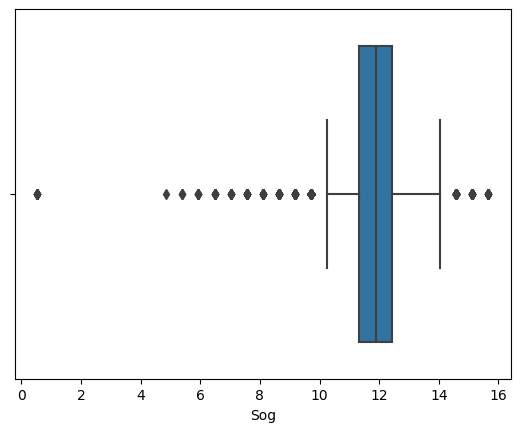

In [1216]:
sns.boxplot(x=df["Sog"])

In [1221]:
## iqr method  
q1=np.quantile(df["Sog"],0.25)
q3=np.quantile(df["Sog"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["Sog"]<lower_tale)|(df["Sog"]>upper_tale)) # to check No. outliers points
len(index[0])
df["Sog"]=np.where(df["Sog"]>upper_tale,upper_tale,df["Sog"])
df["Sog"]=np.where(df["Sog"]<lower_tale,lower_tale,df["Sog"])

<AxesSubplot: xlabel='Sog'>

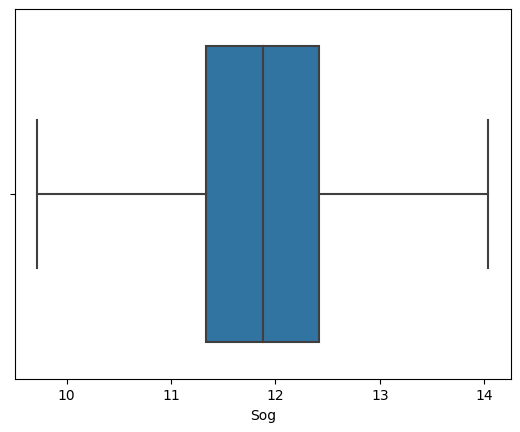

In [1222]:
sns.boxplot(x=df["Sog"])

## 95.AirPressureInHectoPascal

In [1244]:
df["AirPressureInHectoPascal"].describe()

count    43447.000000
mean      1009.868527
std          4.072230
min        995.750000
25%       1007.390000
50%       1009.560000
75%       1011.870000
max       1026.260000
Name: AirPressureInHectoPascal, dtype: float64

In [1239]:
#zscore method
z_score=(df["AirPressureInHectoPascal"]-df["AirPressureInHectoPascal"].mean())/df["AirPressureInHectoPascal"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

429


<AxesSubplot: xlabel='AirPressureInHectoPascal'>

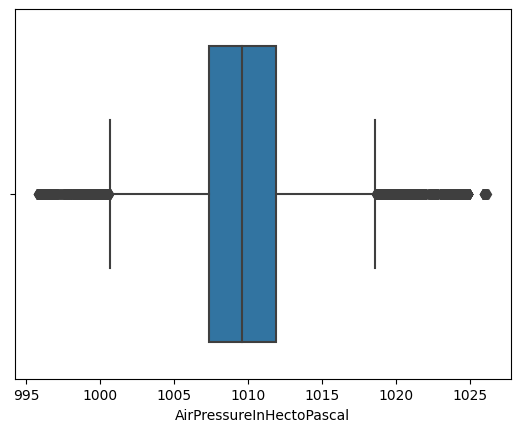

In [1240]:
sns.boxplot(x=df["AirPressureInHectoPascal"])

In [1245]:
## iqr method  
q1=np.quantile(df["AirPressureInHectoPascal"],0.25)
q3=np.quantile(df["AirPressureInHectoPascal"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["AirPressureInHectoPascal"]<lower_tale)|(df["AirPressureInHectoPascal"]>upper_tale)) # to check No. outliers points

df["AirPressureInHectoPascal"]=np.where(df["AirPressureInHectoPascal"]>upper_tale,upper_tale,df["AirPressureInHectoPascal"])
df["AirPressureInHectoPascal"]=np.where(df["AirPressureInHectoPascal"]<lower_tale,lower_tale,df["AirPressureInHectoPascal"])

<AxesSubplot: xlabel='AirPressureInHectoPascal'>

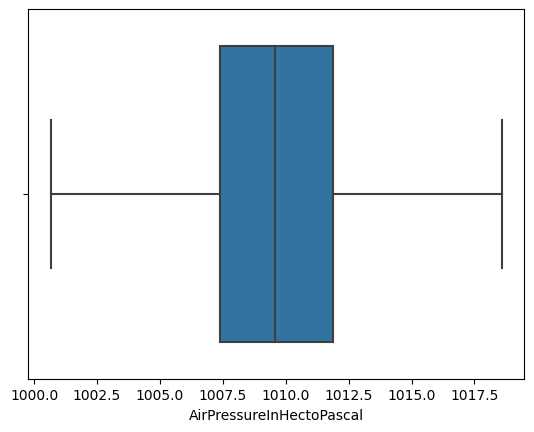

In [1246]:
sns.boxplot(x=df["AirPressureInHectoPascal"])

## 96.WindSpeedInKnots

In [1247]:
df["WindSpeedInKnots"].describe()

count    43447.000000
mean        10.188598
std          4.521419
min          2.000000
25%          7.000000
50%          9.000000
75%         13.000000
max         27.000000
Name: WindSpeedInKnots, dtype: float64

In [1248]:
#zscore method
z_score=(df["WindSpeedInKnots"]-df["WindSpeedInKnots"].mean())/df["WindSpeedInKnots"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

132


In [1249]:
df["WindSpeedInKnots"][outlier_index]=df["WindSpeedInKnots"].median()

In [1250]:
#zscore method
z_score=(df["WindSpeedInKnots"]-df["WindSpeedInKnots"].mean())/df["WindSpeedInKnots"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

0


## 97.SeaHeightInMeters

In [1251]:
df["SeaHeightInMeters"].describe()

count    43447.000000
mean         0.623580
std          0.554572
min          0.000000
25%          0.210000
50%          0.450000
75%          0.820000
max          3.800000
Name: SeaHeightInMeters, dtype: float64

In [1252]:
#zscore method
z_score=(df["SeaHeightInMeters"]-df["SeaHeightInMeters"].mean())/df["SeaHeightInMeters"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

633


<AxesSubplot: xlabel='SeaHeightInMeters'>

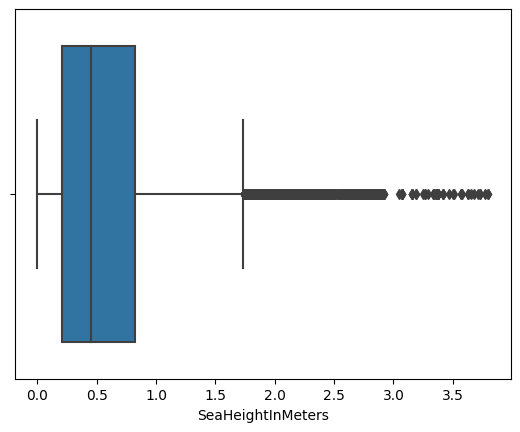

In [1253]:
sns.boxplot(x=df["SeaHeightInMeters"])

In [1254]:
## iqr method  
q1=np.quantile(df["SeaHeightInMeters"],0.25)
q3=np.quantile(df["SeaHeightInMeters"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["SeaHeightInMeters"]<lower_tale)|(df["SeaHeightInMeters"]>upper_tale)) # to check No. outliers points

df["SeaHeightInMeters"]=np.where(df["SeaHeightInMeters"]>upper_tale,upper_tale,df["SeaHeightInMeters"])

<AxesSubplot: xlabel='SeaHeightInMeters'>

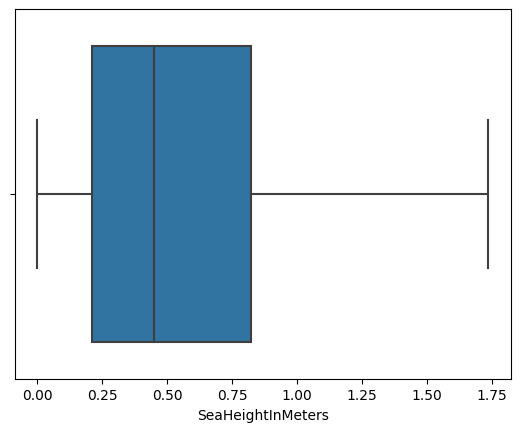

In [1255]:
sns.boxplot(x=df["SeaHeightInMeters"])

## 98.SeaPeriodInSeconds

In [1256]:
df["SeaPeriodInSeconds"].describe()

count    43447.000000
mean         3.070454
std          1.499385
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: SeaPeriodInSeconds, dtype: float64

In [1257]:
#zscore method
z_score=(df["SeaPeriodInSeconds"]-df["SeaPeriodInSeconds"].mean())/df["SeaPeriodInSeconds"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

141


<AxesSubplot: xlabel='SeaPeriodInSeconds'>

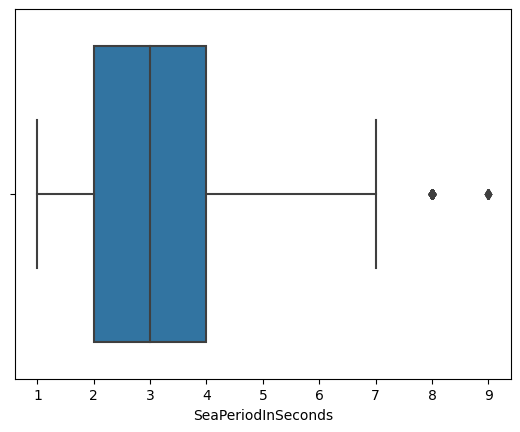

In [1258]:
sns.boxplot(x=df["SeaPeriodInSeconds"])

In [1259]:
## iqr method  
q1=np.quantile(df["SeaPeriodInSeconds"],0.25)
q3=np.quantile(df["SeaPeriodInSeconds"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["SeaPeriodInSeconds"]<lower_tale)|(df["SeaPeriodInSeconds"]>upper_tale)) # to check No. outliers points

df["SeaPeriodInSeconds"]=np.where(df["SeaPeriodInSeconds"]>upper_tale,upper_tale,df["SeaPeriodInSeconds"])

<AxesSubplot: xlabel='SeaPeriodInSeconds'>

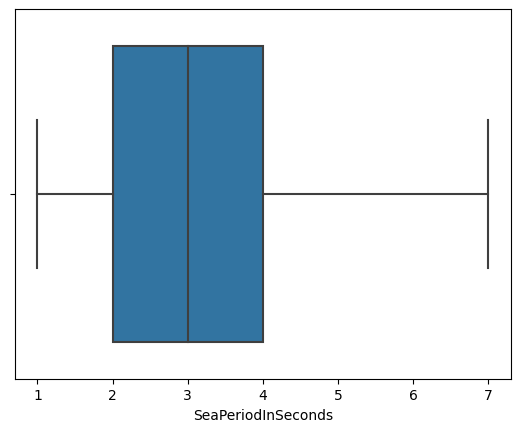

In [1260]:
sns.boxplot(x=df["SeaPeriodInSeconds"])

## 99.SwellHeightInMeters

In [1261]:
df["SwellHeightInMeters"].describe()

count    43447.000000
mean         0.846706
std          0.641912
min          0.000000
25%          0.340000
50%          0.780000
75%          1.200000
max          3.400000
Name: SwellHeightInMeters, dtype: float64

In [1262]:
#zscore method
z_score=(df["SwellHeightInMeters"]-df["SwellHeightInMeters"].mean())/df["SwellHeightInMeters"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

671


<AxesSubplot: xlabel='SwellHeightInMeters'>

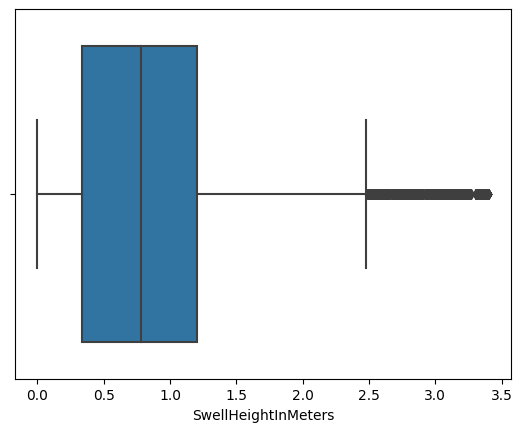

In [1263]:
sns.boxplot(x=df["SwellHeightInMeters"])

In [1264]:
## iqr method  
q1=np.quantile(df["SwellHeightInMeters"],0.25)
q3=np.quantile(df["SwellHeightInMeters"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["SwellHeightInMeters"]<lower_tale)|(df["SwellHeightInMeters"]>upper_tale)) # to check No. outliers points

df["SwellHeightInMeters"]=np.where(df["SwellHeightInMeters"]>upper_tale,upper_tale,df["SwellHeightInMeters"])

<AxesSubplot: xlabel='SwellHeightInMeters'>

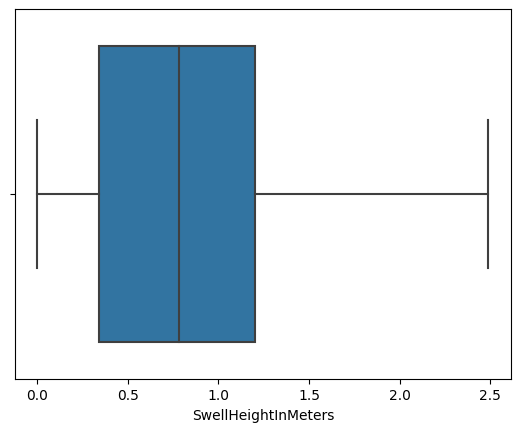

In [1265]:
sns.boxplot(x=df["SwellHeightInMeters"])

## 100.SwellPeriodInSeconds

In [1266]:
df["SwellPeriodInSeconds"].describe()

count    43447.000000
mean         7.208139
std          2.746585
min          2.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         16.000000
Name: SwellPeriodInSeconds, dtype: float64

In [1267]:
#zscore method
z_score=(df["SwellPeriodInSeconds"]-df["SwellPeriodInSeconds"].mean())/df["SwellPeriodInSeconds"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

253


<AxesSubplot: xlabel='SwellPeriodInSeconds'>

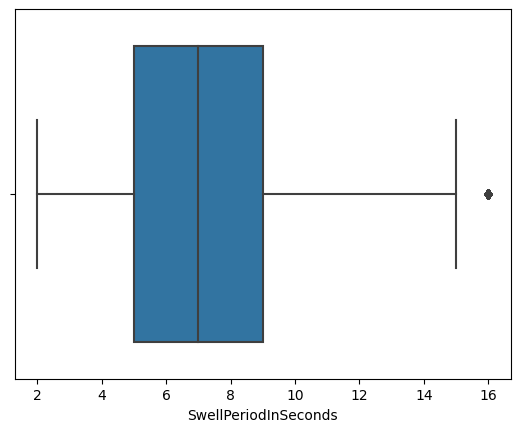

In [1268]:
sns.boxplot(x=df["SwellPeriodInSeconds"])

In [1269]:
## iqr method  
q1=np.quantile(df["SwellPeriodInSeconds"],0.25)
q3=np.quantile(df["SwellPeriodInSeconds"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["SwellPeriodInSeconds"]<lower_tale)|(df["SwellPeriodInSeconds"]>upper_tale)) # to check No. outliers points

df["SwellPeriodInSeconds"]=np.where(df["SwellPeriodInSeconds"]>upper_tale,upper_tale,df["SwellPeriodInSeconds"])

<AxesSubplot: xlabel='SwellPeriodInSeconds'>

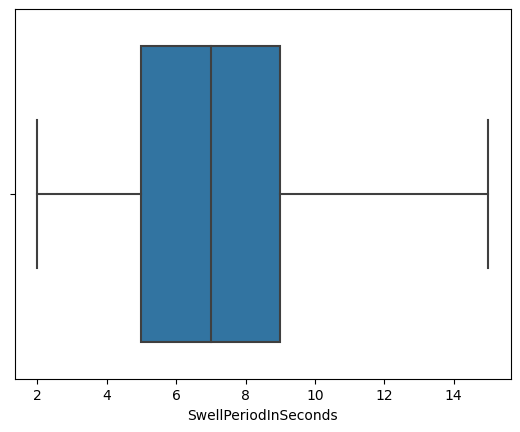

In [1270]:
sns.boxplot(x=df["SwellPeriodInSeconds"])

## 101.HeightOf500HectoPascalLevelInMeters

In [1271]:
df["HeightOf500HectoPascalLevelInMeters"].describe()

count    43447.000000
mean      5852.860612
std         44.592926
min       5404.000000
25%       5848.000000
50%       5861.000000
75%       5874.000000
max       5916.000000
Name: HeightOf500HectoPascalLevelInMeters, dtype: float64

In [1272]:
#zscore method
z_score=(df["HeightOf500HectoPascalLevelInMeters"]-df["HeightOf500HectoPascalLevelInMeters"].mean())/df["HeightOf500HectoPascalLevelInMeters"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

865


<AxesSubplot: xlabel='HeightOf500HectoPascalLevelInMeters'>

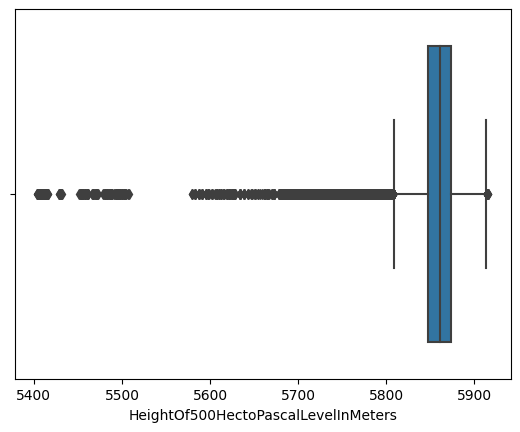

In [1273]:
sns.boxplot(x=df["HeightOf500HectoPascalLevelInMeters"])

<AxesSubplot: >

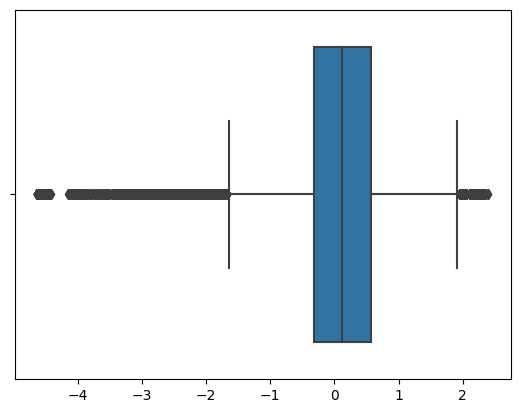

In [1371]:
# box-cox transformer
transformer=PowerTransformer(method="yeo-johnson")
data=transformer.fit_transform(df[["HeightOf500HectoPascalLevelInMeters"]])
sns.boxplot(x=data)

## 102.SeaTemperatureInCelsius

In [1274]:
df["SeaTemperatureInCelsius"].describe()

count    43447.000000
mean        28.195917
std          3.006141
min         15.000000
25%         27.000000
50%         29.000000
75%         30.000000
max         34.000000
Name: SeaTemperatureInCelsius, dtype: float64

In [1275]:
#zscore method
z_score=(df["SeaTemperatureInCelsius"]-df["SeaTemperatureInCelsius"].mean())/df["SeaTemperatureInCelsius"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1299


<AxesSubplot: xlabel='SeaTemperatureInCelsius'>

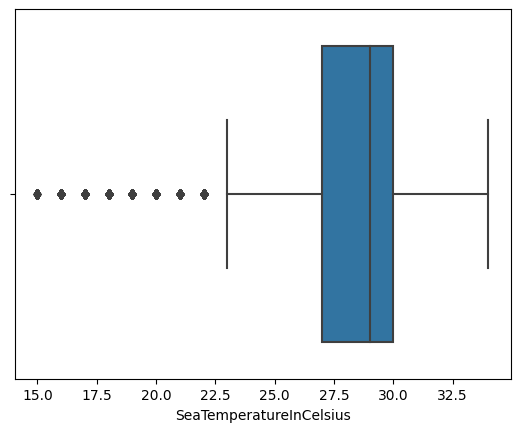

In [1276]:
sns.boxplot(x=df["SeaTemperatureInCelsius"])

In [1277]:
## iqr method  
q1=np.quantile(df["SeaTemperatureInCelsius"],0.25)
q3=np.quantile(df["SeaTemperatureInCelsius"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["SeaTemperatureInCelsius"]<lower_tale)|(df["SeaTemperatureInCelsius"]>upper_tale)) # to check No. outliers points

df["SeaTemperatureInCelsius"]=np.where(df["SeaTemperatureInCelsius"]<lower_tale,lower_tale,df["SeaTemperatureInCelsius"])

<AxesSubplot: xlabel='SeaTemperatureInCelsius'>

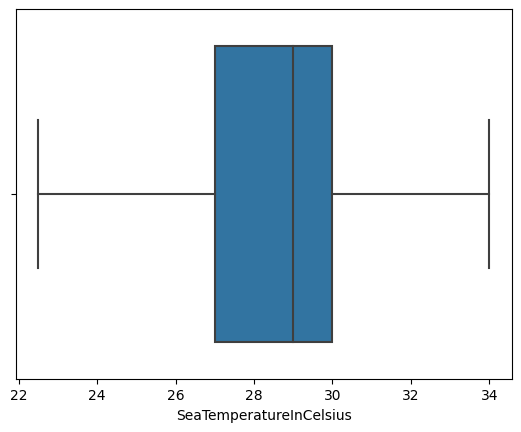

In [1278]:
sns.boxplot(x=df["SeaTemperatureInCelsius"])

## 103.AirTemperatureInCelsius

In [1279]:
df["AirTemperatureInCelsius"].describe()

count    43447.000000
mean        26.577002
std          2.910455
min         11.000000
25%         26.000000
50%         27.000000
75%         28.000000
max         34.000000
Name: AirTemperatureInCelsius, dtype: float64

In [1280]:
#zscore method
z_score=(df["AirTemperatureInCelsius"]-df["AirTemperatureInCelsius"].mean())/df["AirTemperatureInCelsius"].std()
outlier_index=np.where(abs(z_score)>3)
print(len(outlier_index[0]))

1198


<AxesSubplot: xlabel='AirTemperatureInCelsius'>

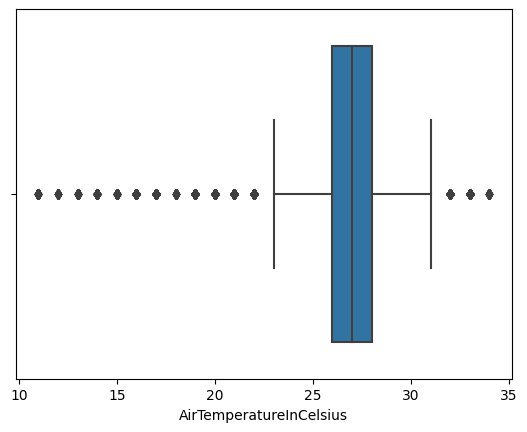

In [1281]:
sns.boxplot(x=df["AirTemperatureInCelsius"])

<AxesSubplot: >

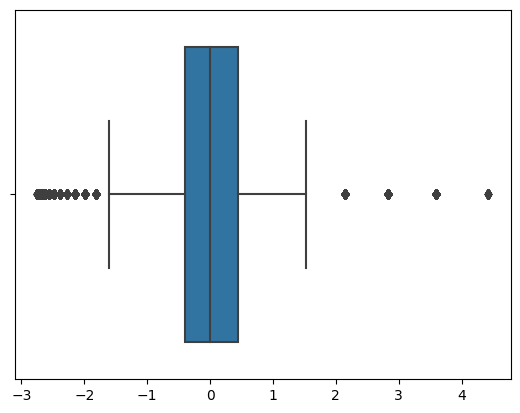

In [1283]:
# box-cox transform
transformer=PowerTransformer(method="box-cox")
data=transformer.fit_transform(df[["AirTemperatureInCelsius"]])
sns.boxplot(x=data)

In [1284]:
## iqr method  
q1=np.quantile(df["AirTemperatureInCelsius"],0.25)
q3=np.quantile(df["AirTemperatureInCelsius"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["AirTemperatureInCelsius"]<lower_tale)|(df["AirTemperatureInCelsius"]>upper_tale)) # to check No. outliers points

df["AirTemperatureInCelsius"]=np.where(df["AirTemperatureInCelsius"]<lower_tale,lower_tale,df["AirTemperatureInCelsius"])
df["AirTemperatureInCelsius"]=np.where(df["AirTemperatureInCelsius"]>upper_tale,upper_tale,df["AirTemperatureInCelsius"])

<AxesSubplot: xlabel='AirTemperatureInCelsius'>

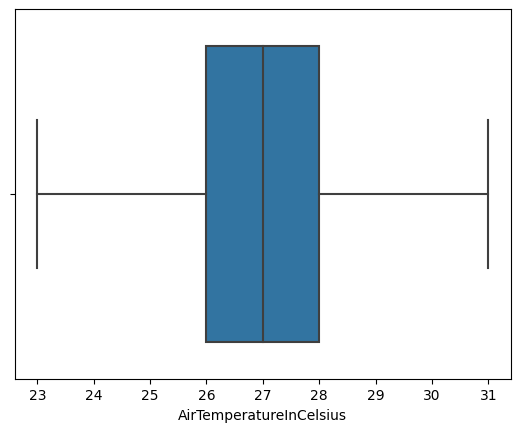

In [1285]:
sns.boxplot(x=df["AirTemperatureInCelsius"])

## 104.WindSpeedAt50MetersInKnots

In [1286]:
df["WindSpeedAt50MetersInKnots"].describe()

count    43447.000000
mean        11.148365
std          5.148022
min          0.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         32.000000
Name: WindSpeedAt50MetersInKnots, dtype: float64

<AxesSubplot: xlabel='WindSpeedAt50MetersInKnots'>

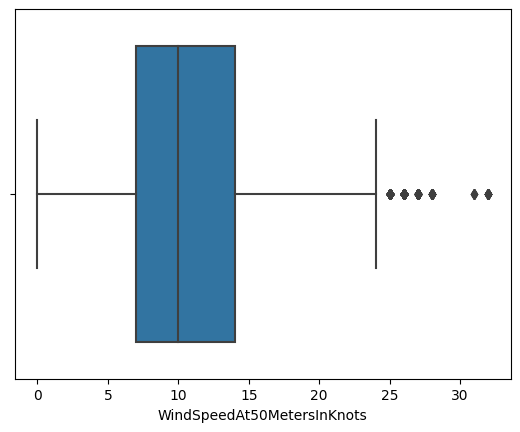

In [1287]:
sns.boxplot(x=df["WindSpeedAt50MetersInKnots"])

In [1288]:
## iqr method  
q1=np.quantile(df["WindSpeedAt50MetersInKnots"],0.25)
q3=np.quantile(df["WindSpeedAt50MetersInKnots"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["WindSpeedAt50MetersInKnots"]<lower_tale)|(df["WindSpeedAt50MetersInKnots"]>upper_tale)) # to check No. outliers points

df["WindSpeedAt50MetersInKnots"]=np.where(df["WindSpeedAt50MetersInKnots"]>upper_tale,upper_tale,df["WindSpeedAt50MetersInKnots"])

<AxesSubplot: xlabel='WindSpeedAt50MetersInKnots'>

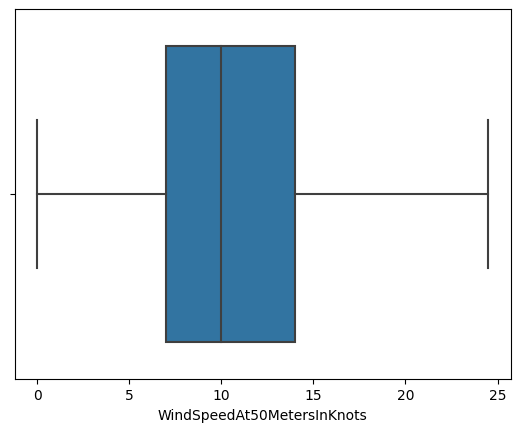

In [1289]:
sns.boxplot(x=df["WindSpeedAt50MetersInKnots"])

## 105.RiskWindSpeedInKnots

In [1290]:
df["RiskWindSpeedInKnots"].describe()

count    43447.000000
mean        13.328791
std          4.894063
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         30.000000
Name: RiskWindSpeedInKnots, dtype: float64

<AxesSubplot: xlabel='RiskWindSpeedInKnots'>

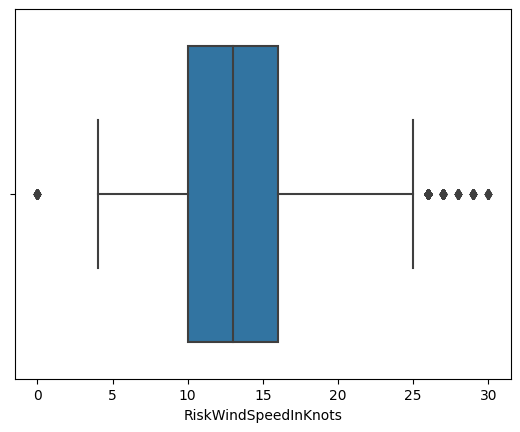

In [1291]:
sns.boxplot(x=df["RiskWindSpeedInKnots"])

In [1292]:
## iqr method  
q1=np.quantile(df["RiskWindSpeedInKnots"],0.25)
q3=np.quantile(df["RiskWindSpeedInKnots"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["RiskWindSpeedInKnots"]<lower_tale)|(df["RiskWindSpeedInKnots"]>upper_tale)) # to check No. outliers points

df["RiskWindSpeedInKnots"]=np.where(df["RiskWindSpeedInKnots"]>upper_tale,upper_tale,df["RiskWindSpeedInKnots"])
df["RiskWindSpeedInKnots"]=np.where(df["RiskWindSpeedInKnots"]<lower_tale,lower_tale,df["RiskWindSpeedInKnots"])

<AxesSubplot: xlabel='RiskWindSpeedInKnots'>

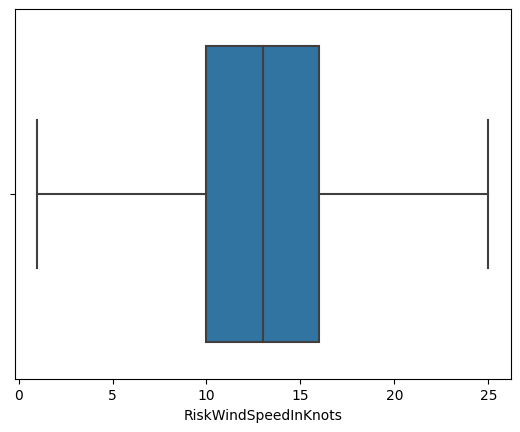

In [1293]:
sns.boxplot(x=df["RiskWindSpeedInKnots"])

## 106.WindGustInKnots

In [1294]:
df["WindGustInKnots"].describe()

count    43447.000000
mean        12.638272
std          5.716376
min          0.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         36.000000
Name: WindGustInKnots, dtype: float64

<AxesSubplot: xlabel='WindGustInKnots'>

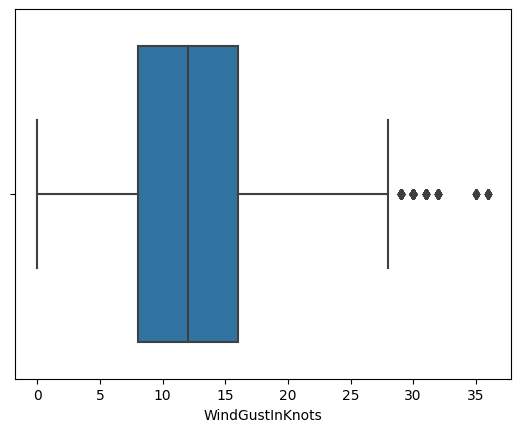

In [1295]:
sns.boxplot(x=df["WindGustInKnots"])

In [1296]:
## iqr method  
q1=np.quantile(df["WindGustInKnots"],0.25)
q3=np.quantile(df["WindGustInKnots"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["WindGustInKnots"]<lower_tale)|(df["WindGustInKnots"]>upper_tale)) # to check No. outliers points

df["WindGustInKnots"]=np.where(df["WindGustInKnots"]>upper_tale,upper_tale,df["WindGustInKnots"])


<AxesSubplot: xlabel='WindGustInKnots'>

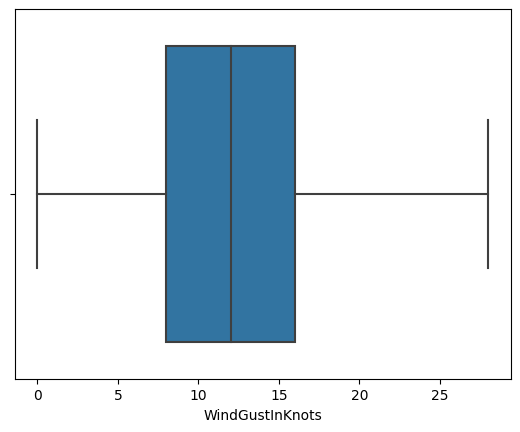

In [1297]:
sns.boxplot(x=df["WindGustInKnots"])

## 107.WindGustAt50MetersInKnots

In [1298]:
df["WindGustAt50MetersInKnots"].describe()

count    43447.000000
mean        13.666974
std          6.359571
min          0.000000
25%          9.000000
50%         13.000000
75%         18.000000
max         41.000000
Name: WindGustAt50MetersInKnots, dtype: float64

<AxesSubplot: xlabel='WindGustAt50MetersInKnots'>

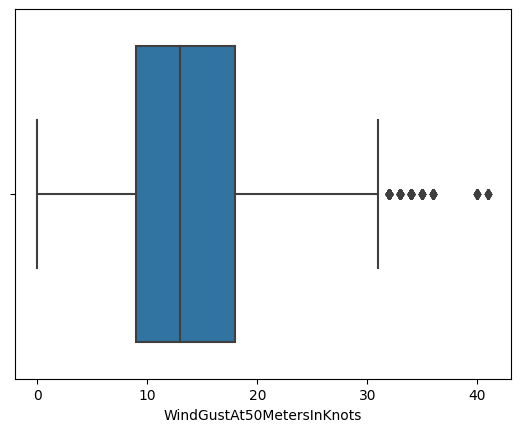

In [1299]:
sns.boxplot(x=df["WindGustAt50MetersInKnots"])

In [1300]:
## iqr method  
q1=np.quantile(df["WindGustAt50MetersInKnots"],0.25)
q3=np.quantile(df["WindGustAt50MetersInKnots"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["WindGustAt50MetersInKnots"]<lower_tale)|(df["WindGustAt50MetersInKnots"]>upper_tale)) # to check No. outliers points

df["WindGustAt50MetersInKnots"]=np.where(df["WindGustAt50MetersInKnots"]>upper_tale,upper_tale,df["WindGustAt50MetersInKnots"])


## 108.TotalWaveHeightInMeters

In [1301]:
df["TotalWaveHeightInMeters"].describe()

count    43447.000000
mean         1.132835
std          0.732819
min          0.000000
25%          0.600000
50%          1.000000
75%          1.400000
max          4.200000
Name: TotalWaveHeightInMeters, dtype: float64

<AxesSubplot: xlabel='TotalWaveHeightInMeters'>

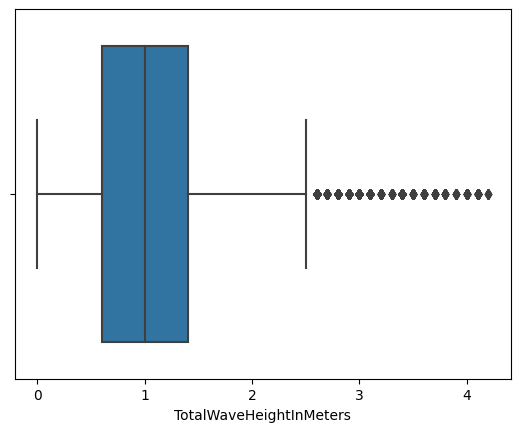

In [1302]:
sns.boxplot(x=df["TotalWaveHeightInMeters"])

In [1303]:
## iqr method  
q1=np.quantile(df["TotalWaveHeightInMeters"],0.25)
q3=np.quantile(df["TotalWaveHeightInMeters"],0.75)
iqr=q3-q1
lower_tale=q1-1.5*iqr                        
upper_tale=q3+1.5*iqr
index=np.where((df["TotalWaveHeightInMeters"]<lower_tale)|(df["TotalWaveHeightInMeters"]>upper_tale)) # to check No. outliers points

df["TotalWaveHeightInMeters"]=np.where(df["TotalWaveHeightInMeters"]>upper_tale,upper_tale,df["TotalWaveHeightInMeters"])


<AxesSubplot: xlabel='TotalWaveHeightInMeters'>

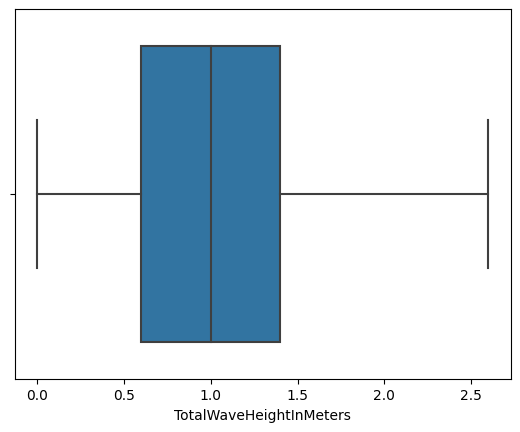

In [1304]:
sns.boxplot(x=df["TotalWaveHeightInMeters"])

## 109.RiskWaveHeightInMeters

In [1305]:
df["RiskWaveHeightInMeters"].describe()

count    43447.000000
mean         1.286496
std          0.845204
min          0.000000
25%          0.740000
50%          1.050000
75%          1.600000
max          4.650000
Name: RiskWaveHeightInMeters, dtype: float64

<AxesSubplot: xlabel='RiskWaveHeightInMeters'>

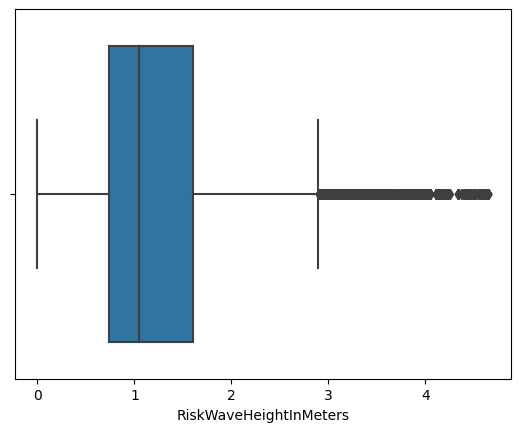

In [1306]:
sns.boxplot(x=df["RiskWaveHeightInMeters"])

<AxesSubplot: xlabel='SeaCurrentSpeedInKnots'>

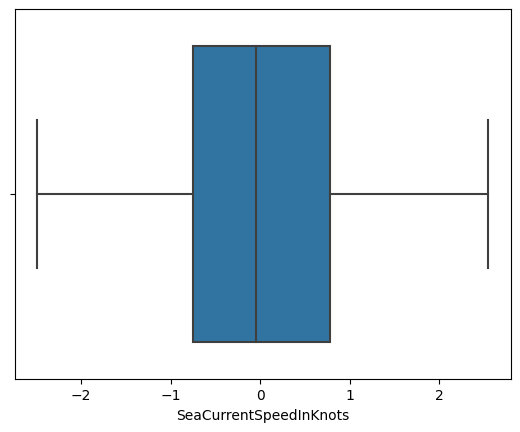

In [1313]:
#yeo-johnson transformer
transformer=PowerTransformer(method="yeo-johnson")
df["SeaCurrentSpeedInKnots"]=transformer.fit_transform(df[["SeaCurrentSpeedInKnots"]])
sns.boxplot(x=df["SeaCurrentSpeedInKnots"])

## 110.SeaCurrentSpeedInKnots

In [1307]:
df["SeaCurrentSpeedInKnots"].describe()

count    43447.000000
mean         0.551079
std          0.407920
min          0.000000
25%          0.260000
50%          0.430000
75%          0.740000
max          3.600000
Name: SeaCurrentSpeedInKnots, dtype: float64

<AxesSubplot: xlabel='SeaCurrentSpeedInKnots'>

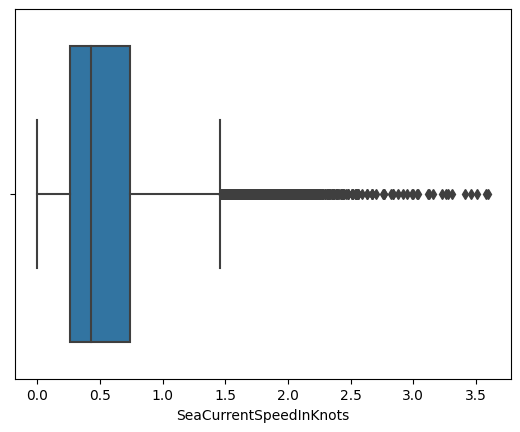

In [1308]:
sns.boxplot(x=df["SeaCurrentSpeedInKnots"])

<AxesSubplot: xlabel='SeaCurrentSpeedInKnots'>

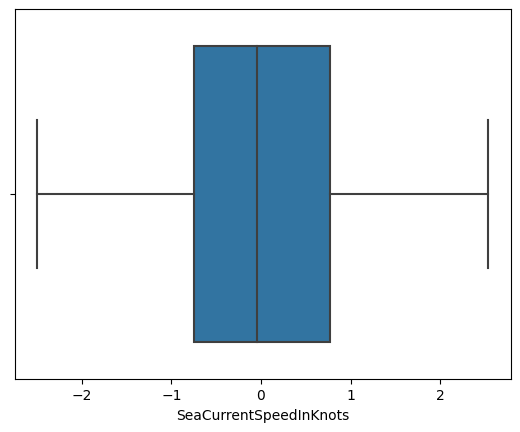

In [1315]:
#yeo-johnson transformer
transformer=PowerTransformer(method="yeo-johnson")
df["SeaCurrentSpeedInKnots"]=transformer.fit_transform(df[["SeaCurrentSpeedInKnots"]])
sns.boxplot(x=df["SeaCurrentSpeedInKnots"])

# EDA

## 1.DG Power Source

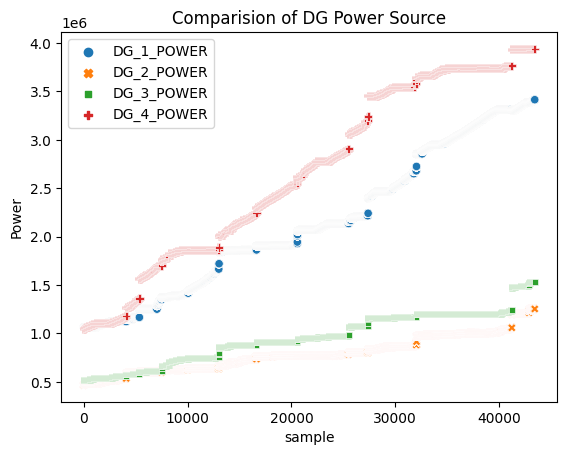

In [1469]:
sns.scatterplot(df[["DG_1_POWER","DG_2_POWER","DG_3_POWER","DG_4_POWER"]])
plt.xlabel("sample")
plt.ylabel("Power")
plt.title("Comparision of DG Power Source")
plt.show()

<AxesSubplot: >

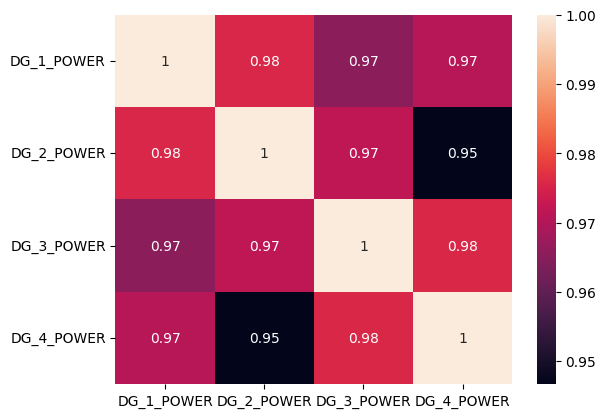

In [1384]:
# check similarity between column
sns.heatmap(data=df[["DG_1_POWER","DG_2_POWER","DG_3_POWER","DG_4_POWER"]].corr(),annot=True)  

## 2.Exhaust Gas Temp. GE1 Cylinder

In [1396]:
plt.figure(figsize=(10,10))
sns.scatterplot(df[["GE1_CYL_1_EXH_GAS_TEMP_°C","GE1_CYL_2_EXH_GAS_TEMP_°C","GE1_CYL_3_EXH_GAS_TEMP_°C","GE1_CYL_4_EXH_GAS_TEMP_°C",
                   "GE1_CYL_5_EXH_GAS_TEMP_°C","GE1_CYL_6_EXH_GAS_TEMP_°C"]].sample(n=1000))
plt.title("Comparision of Exhaust Gas Temp. of GE1 cylinders") 
plt.show()


## 3.Exhaust Gas In and out temp

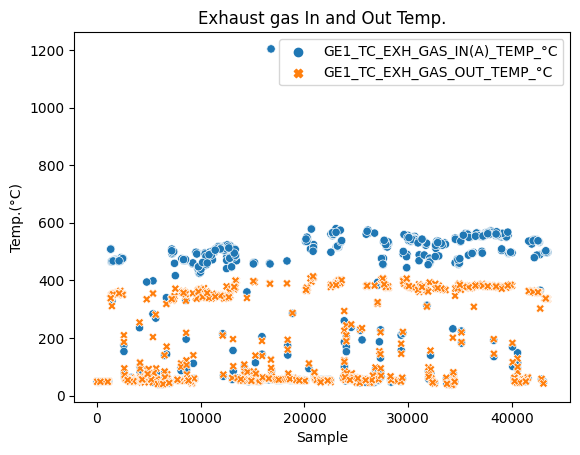

In [1470]:
sns.scatterplot(df[["GE1_TC_EXH_GAS_IN(A)_TEMP_°C","GE1_TC_EXH_GAS_OUT_TEMP_°C"]].sample(1000))
plt.ylabel("Temp.(°C)")
plt.xlabel("Sample")
plt.title("Exhaust gas In and Out Temp.")
plt.show()

## 4.GE2 Cylinders Exhaust Gas Temp.

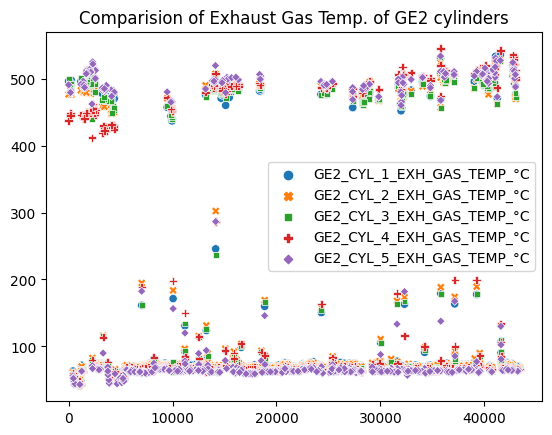

In [1474]:

sns.scatterplot(df[["GE2_CYL_1_EXH_GAS_TEMP_°C","GE2_CYL_2_EXH_GAS_TEMP_°C","GE2_CYL_3_EXH_GAS_TEMP_°C","GE2_CYL_4_EXH_GAS_TEMP_°C",
                   "GE2_CYL_5_EXH_GAS_TEMP_°C"]].sample(n=1000))
plt.title("Comparision of Exhaust Gas Temp. of GE2 cylinders") 
plt.show()

## 5.GE2 Cylinder in and out Temp.

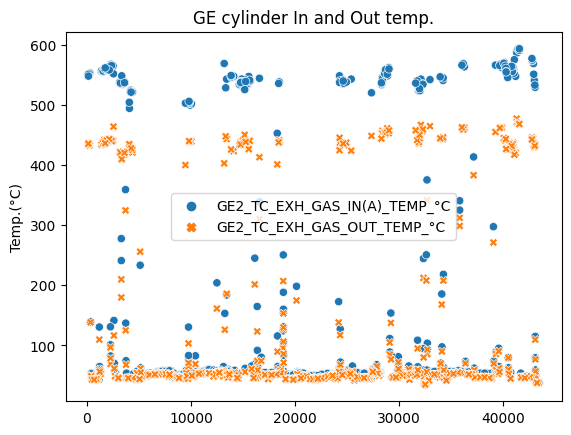

In [1471]:
sns.scatterplot(df[["GE2_TC_EXH_GAS_IN(A)_TEMP_°C","GE2_TC_EXH_GAS_OUT_TEMP_°C"]].sample(1000))
plt.ylabel("Temp.(°C)")
plt.title("GE cylinder In and Out temp.")
plt.show()

## 6.GE3 Cylinder Exhaust Gas Temp.

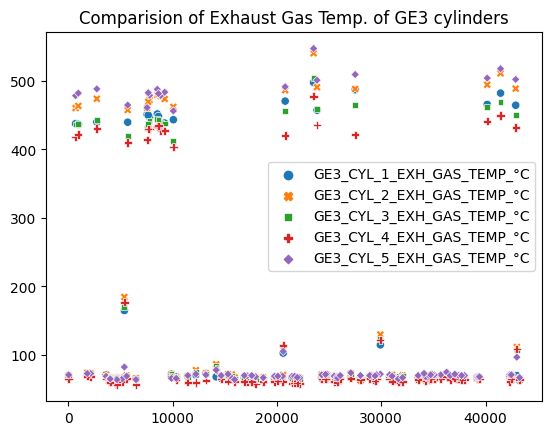

In [1473]:

sns.scatterplot(df[["GE3_CYL_1_EXH_GAS_TEMP_°C","GE3_CYL_2_EXH_GAS_TEMP_°C","GE3_CYL_3_EXH_GAS_TEMP_°C","GE3_CYL_4_EXH_GAS_TEMP_°C",
                   "GE3_CYL_5_EXH_GAS_TEMP_°C"]].sample(n=100))
plt.title("Comparision of Exhaust Gas Temp. of GE3 cylinders") 
plt.show()

## 7.GE3 Cylnder in and Out Temp.

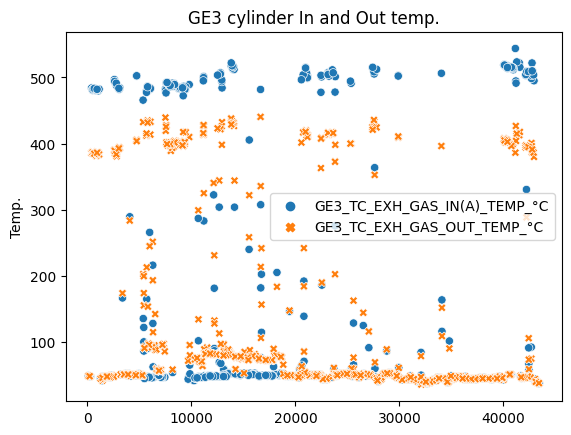

In [1409]:
sns.scatterplot(df[["GE3_TC_EXH_GAS_IN(A)_TEMP_°C","GE3_TC_EXH_GAS_OUT_TEMP_°C"]].sample(1000))
plt.ylabel("Temp.")
plt.title("GE3 cylinder In and Out temp.")
plt.show()

## 8.GE4 Cylinder Exhaust Gas Temp.

In [ ]:
sns.scatterplot(df[["GE4_CYL_1_EXH_GAS_TEMP_°C","GE4_CYL_2_EXH_GAS_TEMP_°C","GE4_CYL_3_EXH_GAS_TEMP_°C","GE4_CYL_4_EXH_GAS_TEMP_°C",
                   "GE4_CYL_5_EXH_GAS_TEMP_°C","GE4_CYL_6_EXH_GAS_TEMP_°C"]].sample(n=1000))
plt.title("Comparision of Exhaust Gas Temp. of GE4 cylinders") 
plt.show()

## 9.GE4 Cylinder In and out Temp.

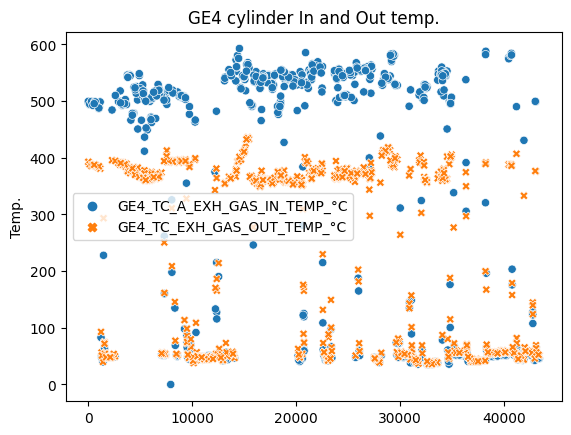

In [1411]:
sns.scatterplot(df[["GE4_TC_A_EXH_GAS_IN_TEMP_°C","GE4_TC_EXH_GAS_OUT_TEMP_°C"]].sample(1000))
plt.ylabel("Temp.")
plt.title("GE4 cylinder In and Out temp.")
plt.show()

## 10.ME_SHAFT_POWER_kW

[]

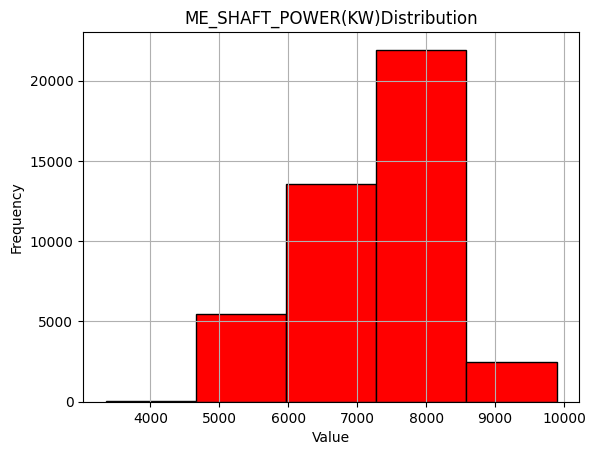

In [1479]:
plt.hist(df["ME_SHAFT_POWER_kW"],bins=5, color='red', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('ME_SHAFT_POWER(KW)Distribution')
plt.grid(True)
plt.plot()

## 11.PROP. SHAFT RPM


[]

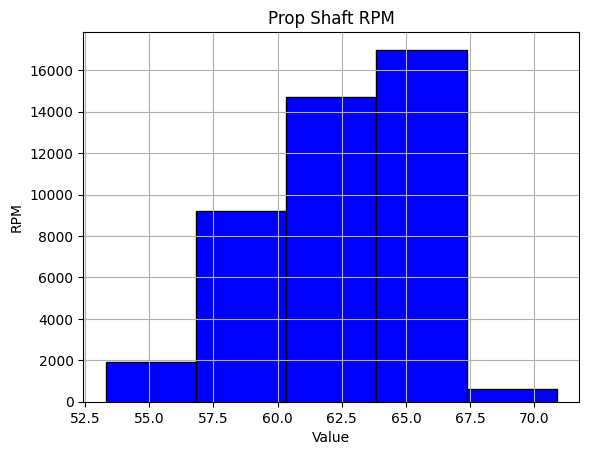

In [1433]:
plt.hist(df["ME_RPM_RPM"],bins=5, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('RPM')
plt.title('Prop Shaft RPM')
plt.grid(True)
plt.plot()

# 12.ME Cylinder J.C.F.W out Temp.

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(df[["ME_CYL1_JCFW_OUT_TEMP_°C","ME_CYL2_JCFW_OUT_TEMP_°C","ME_CYL3_JCFW_OUT_TEMP_°C","ME_CYL4_JCFW_OUT_TEMP_°C",
                   "ME_CYL5_JCFW_OUT_TEMP_°C","ME_CYL6_JCFW_OUT_TEMP_°C"]].sample(n=1000))
plt.title("Comparision of ME Cylinder J.C.F.W out Temp") 
plt.show()

## 13.G/E F.O INLET PRESS

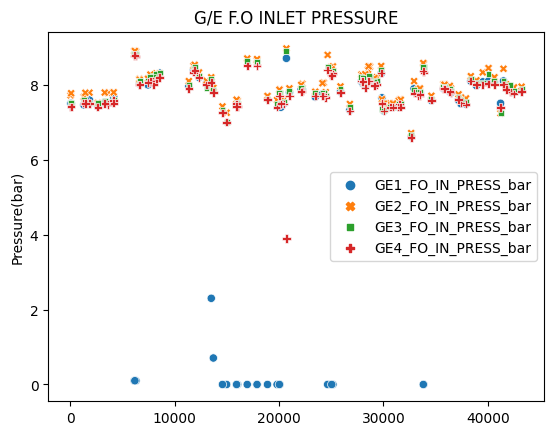

In [1432]:
sns.scatterplot(df[["GE1_FO_IN_PRESS_bar","GE2_FO_IN_PRESS_bar","GE3_FO_IN_PRESS_bar","GE4_FO_IN_PRESS_bar"]].sample(100))
plt.ylabel("Pressure(bar)")
plt.title("G/E F.O INLET PRESSURE")
plt.show()

## 14.G/E L.O INLET PRESSURE

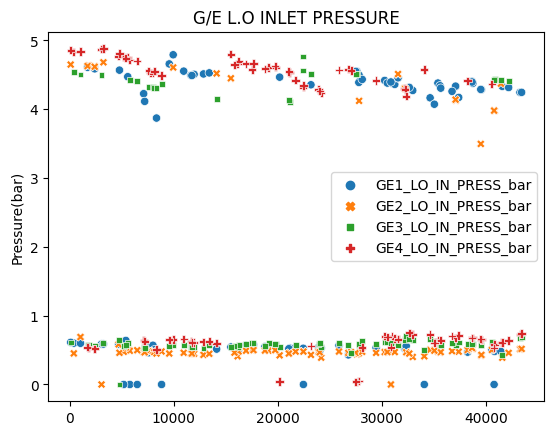

In [1431]:
sns.scatterplot(df[["GE1_LO_IN_PRESS_bar","GE2_LO_IN_PRESS_bar","GE3_LO_IN_PRESS_bar","GE4_LO_IN_PRESS_bar"]].sample(100))
plt.ylabel("Pressure(bar)")
plt.title("G/E L.O INLET PRESSURE")
plt.show()

## 15.GE_TC_LO_PRESS_bar

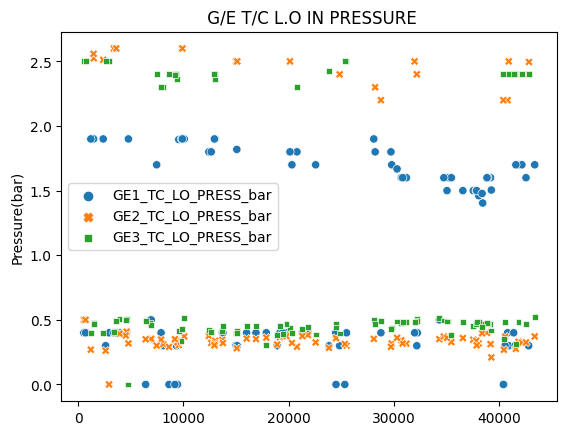

In [1430]:
sns.scatterplot(df[["GE1_TC_LO_PRESS_bar","GE2_TC_LO_PRESS_bar","GE3_TC_LO_PRESS_bar"]].sample(100))
plt.ylabel("Pressure(bar)")
plt.title(" G/E T/C L.O IN PRESSURE")
plt.show()

## 16. GE1_LT_WATER_IN_PRESS_bar

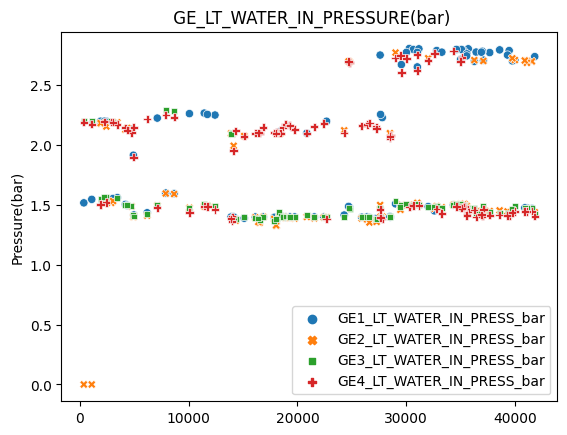

In [1429]:
sns.scatterplot(df[["GE1_LT_WATER_IN_PRESS_bar","GE2_LT_WATER_IN_PRESS_bar","GE3_LT_WATER_IN_PRESS_bar","GE4_LT_WATER_IN_PRESS_bar"]].sample(100))
plt.ylabel("Pressure(bar)")
plt.title(" GE_LT_WATER_IN_PRESSURE(bar)")
plt.show()

## 17.GE1_HT_WATER_IN_PRESS_bar

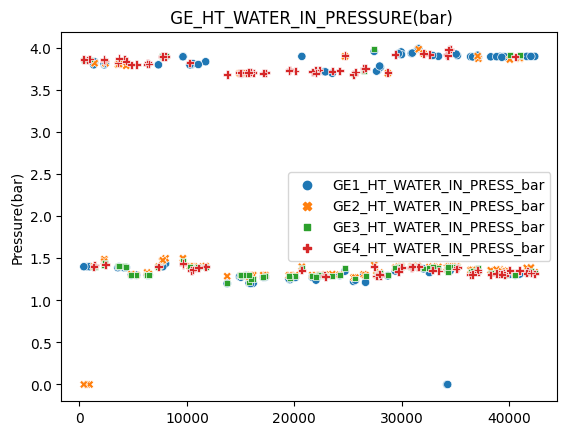

In [1435]:
sns.scatterplot(df[["GE1_HT_WATER_IN_PRESS_bar","GE2_HT_WATER_IN_PRESS_bar","GE3_HT_WATER_IN_PRESS_bar","GE4_HT_WATER_IN_PRESS_bar"]].sample(100))
plt.ylabel("Pressure(bar)")
plt.title(" GE_HT_WATER_IN_PRESSURE(bar)")
plt.show()

## 18. GE_TC_RPM_PICK_UP(X10)_RPM

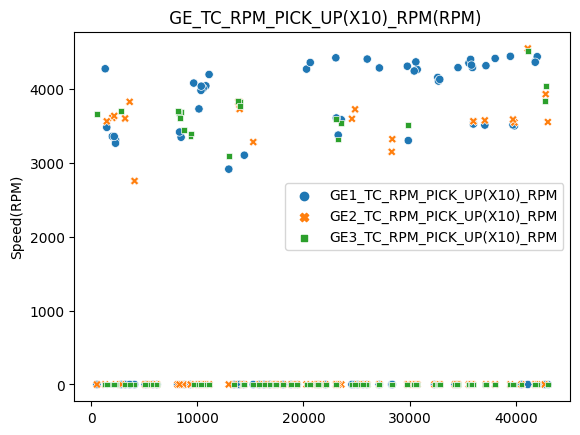

In [1439]:
sns.scatterplot(df[["GE1_TC_RPM_PICK_UP(X10)_RPM","GE2_TC_RPM_PICK_UP(X10)_RPM","GE3_TC_RPM_PICK_UP(X10)_RPM"]].sample(100))
plt.ylabel("Speed(RPM)")
plt.title(" GE_TC_RPM_PICK_UP(X10)_RPM(RPM)")
plt.show()

## 19.GE_FO_IN_TEMP(°C)

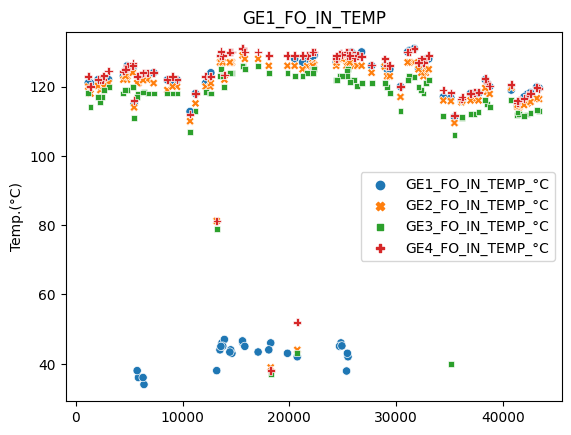

In [1442]:
sns.scatterplot(df[["GE1_FO_IN_TEMP_°C","GE2_FO_IN_TEMP_°C","GE3_FO_IN_TEMP_°C","GE4_FO_IN_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("GE1_FO_IN_TEMP")
plt.show()

## 20.GE1_LO_IN_TEMP(°C)

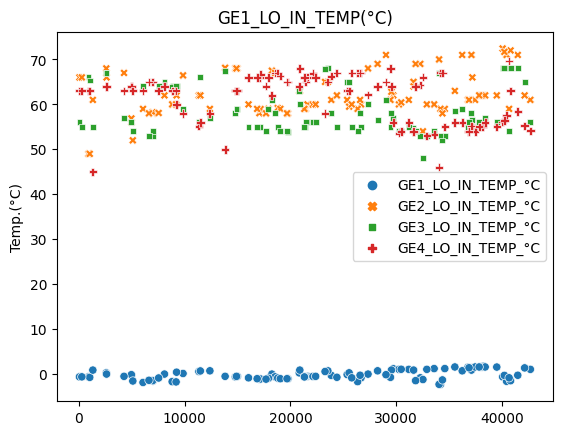

In [1480]:
sns.scatterplot(df[["GE1_LO_IN_TEMP_°C","GE2_LO_IN_TEMP_°C","GE3_LO_IN_TEMP_°C","GE4_LO_IN_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("GE1_LO_IN_TEMP(°C)")
plt.show()

## 21.GE_LT_WATER_OUT_TEMP_°C

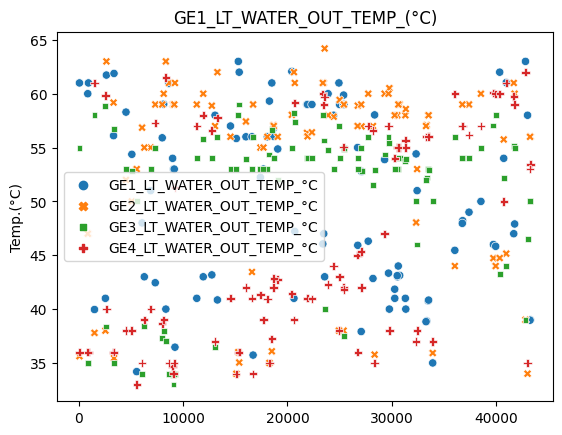

In [1481]:
sns.scatterplot(df[["GE1_LT_WATER_OUT_TEMP_°C","GE2_LT_WATER_OUT_TEMP_°C","GE3_LT_WATER_OUT_TEMP_°C","GE4_LT_WATER_OUT_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("GE1_LT_WATER_OUT_TEMP_(°C)")
plt.show()

## 22.GE1_HT_WATER_OUT_TEMP(°C)

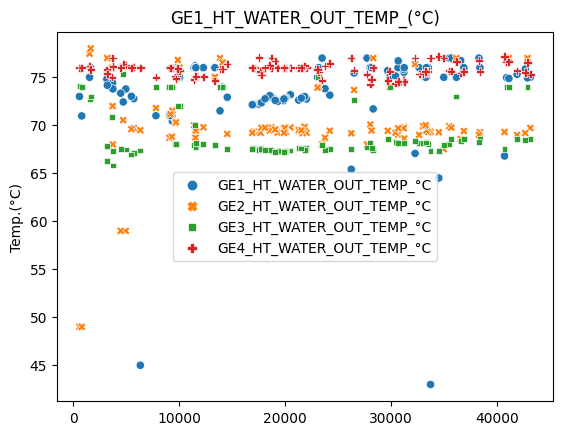

In [1482]:
sns.scatterplot(df[["GE1_HT_WATER_OUT_TEMP_°C","GE2_HT_WATER_OUT_TEMP_°C","GE3_HT_WATER_OUT_TEMP_°C","GE4_HT_WATER_OUT_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("GE1_HT_WATER_OUT_TEMP_(°C)")
plt.show()

## 23 ME_CYL_EXH_GAS_DEV/OUT_TEMP_°C

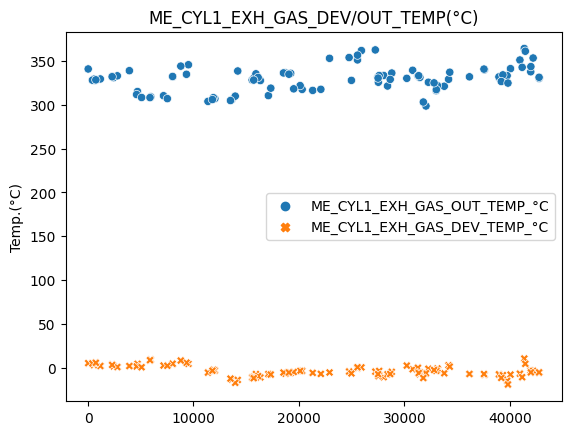

In [1449]:
sns.scatterplot(df[["ME_CYL1_EXH_GAS_OUT_TEMP_°C","ME_CYL1_EXH_GAS_DEV_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("ME_CYL1_EXH_GAS_DEV/OUT_TEMP(°C)")
plt.show()


## 24.ME_CYL2_EXH_GAS_DEV/OUT_TEMP_

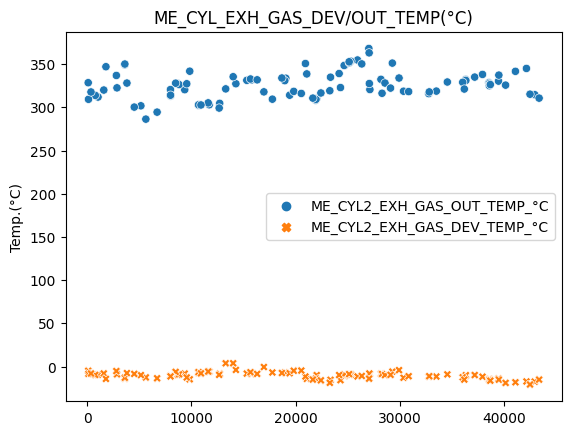

In [1448]:
sns.scatterplot(df[["ME_CYL2_EXH_GAS_OUT_TEMP_°C","ME_CYL2_EXH_GAS_DEV_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("ME_CYL_EXH_GAS_DEV/OUT_TEMP(°C)")
plt.show()


## 25.ME_CYL3_EXH_GAS_DEV/OUT_TEMP(°C)

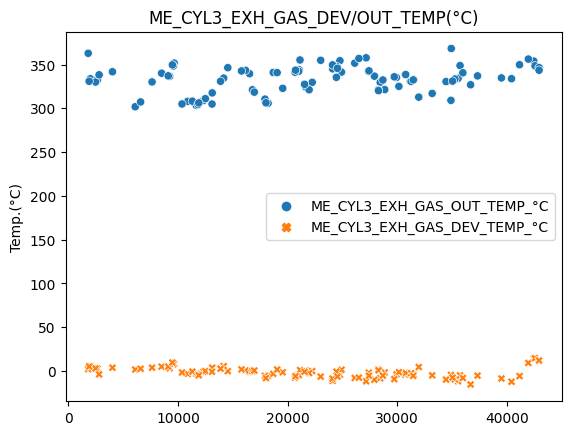

In [1450]:
sns.scatterplot(df[["ME_CYL3_EXH_GAS_OUT_TEMP_°C","ME_CYL3_EXH_GAS_DEV_TEMP_°C"]].sample(100))
plt.ylabel("Temp.(°C)")
plt.title("ME_CYL3_EXH_GAS_DEV/OUT_TEMP(°C)")
plt.show()

## 26. G/E ENGINE RUNNING

GE1_RUNNING
0    23486
1    19961
Name: count, dtype: int64


<AxesSubplot: ylabel='count'>

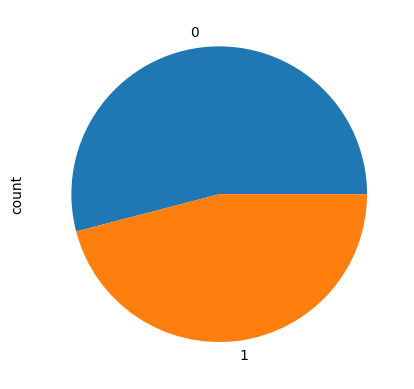

In [1459]:
print(df["GE1_RUNNING"].value_counts())
df["GE1_RUNNING"].value_counts().plot(kind="pie")

## 27. Date time column

In [ ]:
sample_time, and GPS Time Stamp gives time only and be drop.

In [1462]:
df.drop(["sample_time","GPSTimeStamp"],axis=1,inplace=True)

## Final DataFrame

In [1463]:
df

,ME_FO_IN_TEMP_°C,ME_FO_IN_FLOW_kg/h,ME_FO_VISCOSITY_cSt,SEA_WATER_TEMP_°C,DG_1_POWER,DG_2_POWER,DG_3_POWER,DG_4_POWER,GE_FO_VISCOSITY_cSt,GE_FO_IN_FLOW_kg/h,...,WindSpeedAt50MetersInKnots,WindDirectionAt50MetersInDegrees,RiskWindSpeedInKnots,WindGustInKnots,WindGustAt50MetersInKnots,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,RiskWaveHeightInMeters,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees
0,-0.809815,1315.40857,12.89500,27.65644,1.063422e+06,4.683372e+05,5.170440e+05,1.046958e+06,12.82982,218.93576,...,21.0,150,22.0,25.0,27.0,1.8,157,2.22,-0.695774,20
1,-0.811034,1314.99536,12.92052,27.65626,1.063422e+06,4.683612e+05,5.170433e+05,1.046990e+06,12.99468,215.25349,...,21.0,150,22.0,25.0,27.0,1.8,156,2.22,-0.793916,20
2,-0.814278,1325.07103,12.89342,27.64197,1.063421e+06,4.683850e+05,5.170430e+05,1.047023e+06,12.81114,213.81529,...,21.0,150,22.0,25.0,27.0,1.8,156,2.22,-0.793916,20
3,-0.816712,1325.93678,12.91568,27.61560,1.063419e+06,4.684321e+05,5.170420e+05,1.047087e+06,12.97803,213.96498,...,21.0,150,22.0,25.0,27.0,1.8,156,2.22,-0.793916,20
4,-0.823647,1314.96950,12.92037,27.65493,1.063419e+06,4.684561e+05,5.170410e+05,1.047120e+06,12.98981,213.98917,...,21.0,150,22.0,25.0,27.0,1.8,155,2.22,-0.793916,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43442,-0.271154,1301.99963,12.95229,19.20000,3.414721e+06,1.253305e+06,1.534106e+06,3.939402e+06,12.85600,193.79670,...,16.0,219,18.0,17.0,18.0,2.6,230,3.95,-2.067105,180
43443,-0.262803,1291.55445,12.93251,19.16502,3.414773e+06,1.253305e+06,1.534106e+06,3.939401e+06,12.62553,178.01967,...,16.0,219,18.0,17.0,18.0,2.6,230,3.95,-2.067105,180
43444,-0.292165,1286.92965,13.00653,19.08863,3.414827e+06,1.253304e+06,1.534105e+06,3.939401e+06,13.72080,184.18432,...,16.0,220,18.0,17.0,18.0,2.6,230,3.96,-2.148436,180
43445,-0.300425,1297.31212,13.06549,19.04889,3.414881e+06,1.253304e+06,1.534105e+06,3.939400e+06,12.52497,196.40157,...,16.0,220,18.0,16.0,18.0,2.6,230,3.96,-2.148436,180


## Feature Scaling

In [1468]:
std_scalar=StandardScaler()
sacled_array=std_scalar.fit_transform(df)
scaled_df=pd.DataFrame(sacled_array,columns=df.columns)
scaled_df

,ME_FO_IN_TEMP_°C,ME_FO_IN_FLOW_kg/h,ME_FO_VISCOSITY_cSt,SEA_WATER_TEMP_°C,DG_1_POWER,DG_2_POWER,DG_3_POWER,DG_4_POWER,GE_FO_VISCOSITY_cSt,GE_FO_IN_FLOW_kg/h,...,WindSpeedAt50MetersInKnots,WindDirectionAt50MetersInDegrees,RiskWindSpeedInKnots,WindGustInKnots,WindGustAt50MetersInKnots,TotalWaveHeightInMeters,TotalWaveDirectionInDegrees,RiskWaveHeightInMeters,SeaCurrentSpeedInKnots,SeaCurrentDirectionInDegrees
0,-0.809815,0.406780,0.193010,-0.379392,-1.486284,-1.751552,-1.703943,-1.753608,0.177947,1.031018,...,1.939814,-0.459950,1.793791,2.188991,2.120536,1.064297,-0.516320,1.104484,-0.695774,-1.570882
1,-0.811034,0.404424,0.204994,-0.379461,-1.486285,-1.751422,-1.703946,-1.753573,0.248408,0.871068,...,1.939814,-0.459950,1.793791,2.188991,2.120536,1.064297,-0.528181,1.104484,-0.793916,-1.570882
2,-0.814278,0.461872,0.192268,-0.384908,-1.486286,-1.751292,-1.703947,-1.753538,0.169963,0.808596,...,1.939814,-0.459950,1.793791,2.188991,2.120536,1.064297,-0.528181,1.104484,-0.793916,-1.570882
3,-0.816712,0.466808,0.202721,-0.394959,-1.486288,-1.751036,-1.703951,-1.753468,0.241292,0.815098,...,1.939814,-0.459950,1.793791,2.188991,2.120536,1.064297,-0.528181,1.104484,-0.793916,-1.570882
4,-0.823647,0.404276,0.204923,-0.379968,-1.486289,-1.750906,-1.703955,-1.753433,0.246327,0.816149,...,1.939814,-0.459950,1.793791,2.188991,2.120536,1.064297,-0.540042,1.104484,-0.793916,-1.570882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43442,-0.271154,0.330326,0.219912,-3.602719,1.748362,2.515341,2.227237,1.370810,0.189137,-0.060969,...,0.957321,0.208998,0.968014,0.774642,0.691272,2.287421,0.349524,3.151351,-2.067105,0.004078
43443,-0.262803,0.270771,0.210624,-3.616052,1.748434,2.515340,2.227235,1.370809,0.090634,-0.746289,...,0.957321,0.208998,0.968014,0.774642,0.691272,2.287421,0.349524,3.151351,-2.067105,0.004078
43444,-0.292165,0.244402,0.245383,-3.645169,1.748508,2.515335,2.227232,1.370808,0.558751,-0.478510,...,0.957321,0.218693,0.968014,0.774642,0.691272,2.287421,0.349524,3.163183,-2.148436,0.004078
43445,-0.300425,0.303600,0.273070,-3.660317,1.748583,2.515335,2.227231,1.370807,0.047655,0.052181,...,0.957321,0.218693,0.968014,0.597848,0.691272,2.287421,0.349524,3.163183,-2.148436,0.004078
